# India's Critical Minerals: Import-Export Analysis & Forecasting

## Objective
This study analyzes India's import-export dependency and domestic production
patterns for critical minerals - Lithium (Electrodes), Graphite, and Copper -
to identify strategic vulnerabilities and value-chain gaps using historical
trade and production data.

## Problem Statement

India has identified several critical minerals essential for economic growth, clean energy transition, and national security. However, the country remains highly dependent on imports for many of these minerals, exposing it to supply chain disruptions and global price volatility.

This project analyzes India's Export-Import (EXIM) and production data for three key critical minerals - **Copper, Graphite, and Lithium (Electrodes)** - to identify trade dependencies, production gaps, and future trends. Time-series forecasting is applied to estimate future demand and assess sustainability risks.


## Data Sources
- DGCI&S Import-Export datasets (CSV/XLS)
- Indian Bureau Of Mines
- Historical production and trade records (2017-2024)
- Ministry of Commerce and Industry

The data was cleaned, aggregated monthly, and analyzed using Python
(Pandas, Matplotlib, Seaborn).


### OVERALL ORES & MINERALS TRADE ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

try:
    df = pd.read_excel("ORES_AND_MINERALS_EXIM.xlsx")
except:
    print("Error reading file")
df.head()

df.rename(columns={"YEAR-MONTH":"Year-Month","Export In Crores":"export_in_crores","Import In Crores":"import_in_crores"},inplace=True)
df.info()

df["Year-Month"] = pd.to_datetime(df["Year-Month"]).dt.normalize()
df.info()

# Detecting null values
df.isnull().sum()

df[df.isnull().any(axis=1)]

# Dropping missing value rows so as to not disrupt time-series analysis
df.dropna(inplace=True)
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year-Month        108 non-null    object 
 1   export_in_crores  106 non-null    float64
 2   import_in_crores  106 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year-Month        108 non-null    datetime64[ns]
 1   export_in_crores  106 non-null    float64       
 2   import_in_crores  106 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


Year-Month  export_in_crores  import_in_crores
101 2025-06-01          10874.43          92713.67
102 2025-07-01          14138.39         123964.77
103 2025-08-01          17423.65         151557.19
104 2025-09-01          20970.65         178798.20
105 2025-10-01          24515.68         210103.24

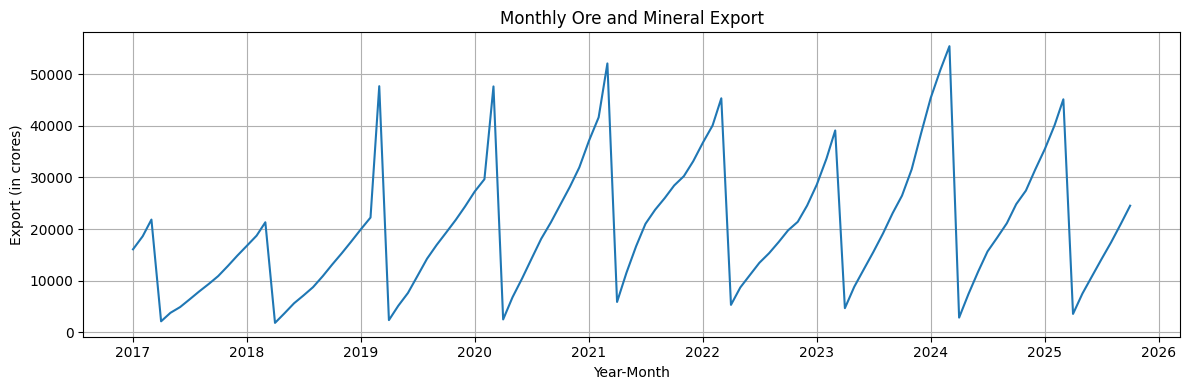

In [3]:
#LinePlot (Export Value)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["export_in_crores"])
plt.title("Monthly Ore and Mineral Export")
plt.xlabel("Year-Month")
plt.ylabel("Export (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

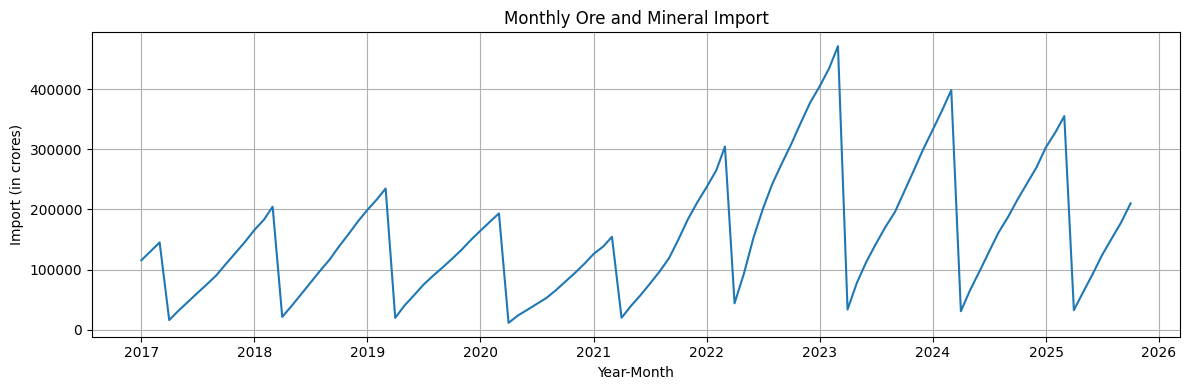

In [4]:
#LinePlot (Import Value)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["import_in_crores"])
plt.title("Monthly Ore and Mineral Import")
plt.xlabel("Year-Month")
plt.ylabel("Import (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

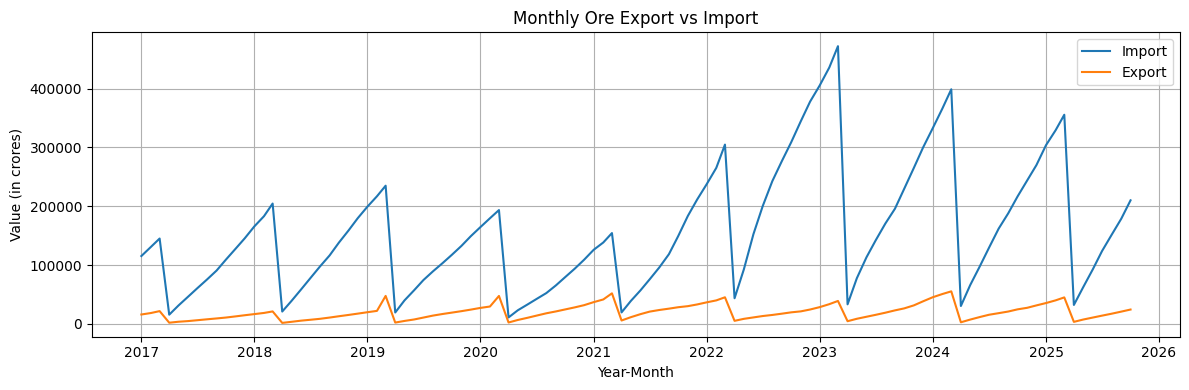

In [5]:
#LinePlot (Export vs Import)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["import_in_crores"],label="Import")
plt.plot(df["Year-Month"],df["export_in_crores"],label="Export")
plt.title("Monthly Ore Export vs Import")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

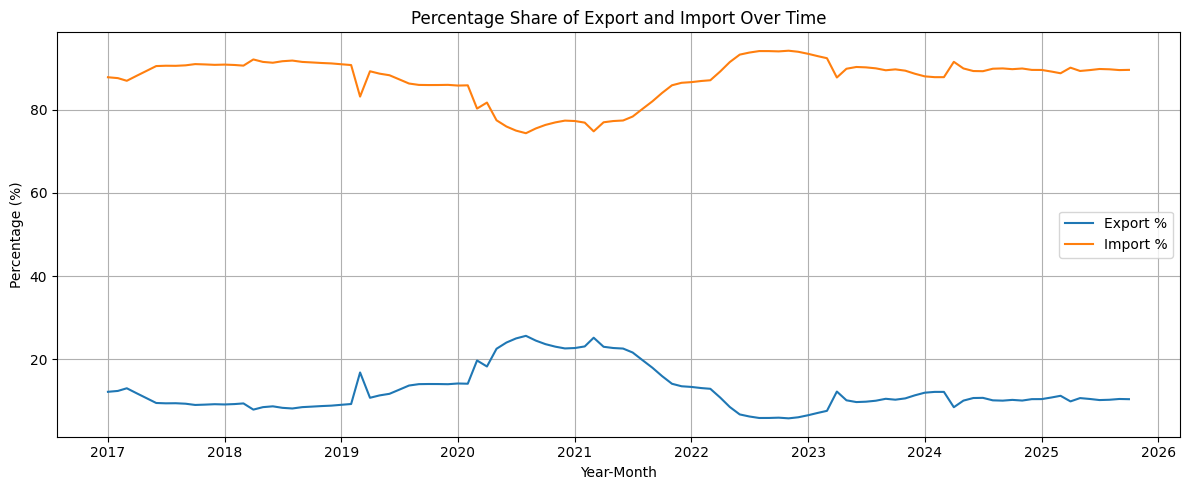

In [6]:
# Percentage of Export and Import per month

df["total_trade"] = df["export_in_crores"] + df["import_in_crores"]

df["export_pct"] = (df["export_in_crores"] / df["total_trade"]) * 100
df["import_pct"] = (df["import_in_crores"] / df["total_trade"]) * 100

#LinePlot (Export vs Import)

plt.figure(figsize=(12,5))
plt.plot(df["Year-Month"], df["export_pct"], label="Export %")
plt.plot(df["Year-Month"], df["import_pct"], label="Import %")

plt.title("Percentage Share of Export and Import Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
#Overall Percentage of EXIM

total_export = df["export_in_crores"].sum()
total_import = df["import_in_crores"].sum()

export_pct = (total_export / (total_export + total_import)) * 100
import_pct = (total_import / (total_export + total_import)) * 100

print(f"Export: {export_pct:.2f} %\nImport : {import_pct:.2f} %")

Export: 11.56 %
Import : 88.44 %


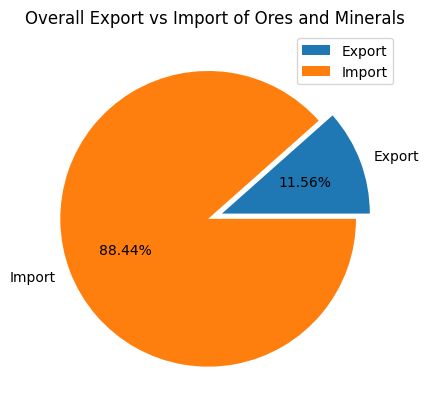

In [8]:
#Pie Chart (EXIM)

plt.pie([export_pct,import_pct],labels=["Export","Import"], autopct="%1.2f%%", explode=(0.05,0.05))
plt.title("Overall Export vs Import of Ores and Minerals")
plt.legend()
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("ORES AND MINERALS EXPORT IMPORT DATASET.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["export"] = df["export"].str.replace(",", "", regex=True).astype(float)

# Preparing export data
export_df = df[["ds", "export"]].rename(columns={"export": "y"})
print(export_df)

            ds         y
0   2017-01-01  16069.47
1   2017-02-01  18596.42
2   2017-03-01  21828.45
3   2017-04-01   2123.64
4   2017-05-01   3775.46
..         ...       ...
103 2025-08-01  17423.65
104 2025-09-01  20970.65
105 2025-10-01  24515.68
106 2025-11-01       NaN
107 2025-12-01       NaN

[108 rows x 2 columns]


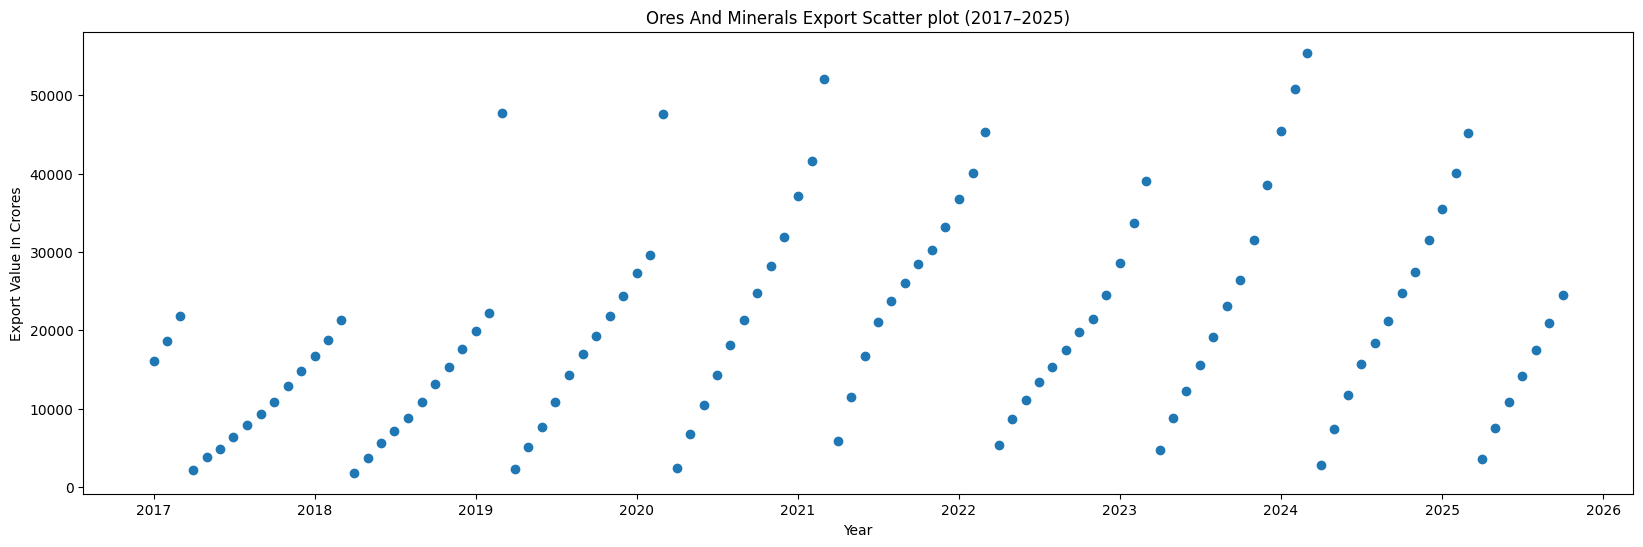

In [10]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(export_df["ds"],export_df["y"])
plt.title("Ores And Minerals Export Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.show()

In [11]:
# Prophet model
from prophet import Prophet

export_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

export_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)


export_model.fit(export_df) # Fit model

future_export = export_model.make_future_dataframe(periods=122, freq="ME") #dataframe from jan 2026 - dec 2031

export_forecast = export_model.predict(future_export) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
export_forecast_2026_2035 = export_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for export_data in export_forecast_2026_2035.to_dict("records"):
    print(export_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 27966.53830252494, 'yhat_lower': 22023.529510817898, 'yhat_upper': 33387.080907662465}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 31313.136480260382, 'yhat_lower': 26058.162492357013, 'yhat_upper': 36828.99421953449}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 35455.15876861258, 'yhat_lower': 30142.34131677926, 'yhat_upper': 41362.73884385053}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 39469.427424625406, 'yhat_lower': 33918.571901755975, 'yhat_upper': 44827.19383296657}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 42245.50888291902, 'yhat_lower': 36567.492343942205, 'yhat_upper': 47931.650558295856}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 6990.96302095112, 'yhat_lower': 1123.8148958458196, 'yhat_upper': 12267.21606500685}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 10663.584856851867, 'yhat_lower': 4757.9062393685535, 'yhat_upper': 16318.677624154532}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 13

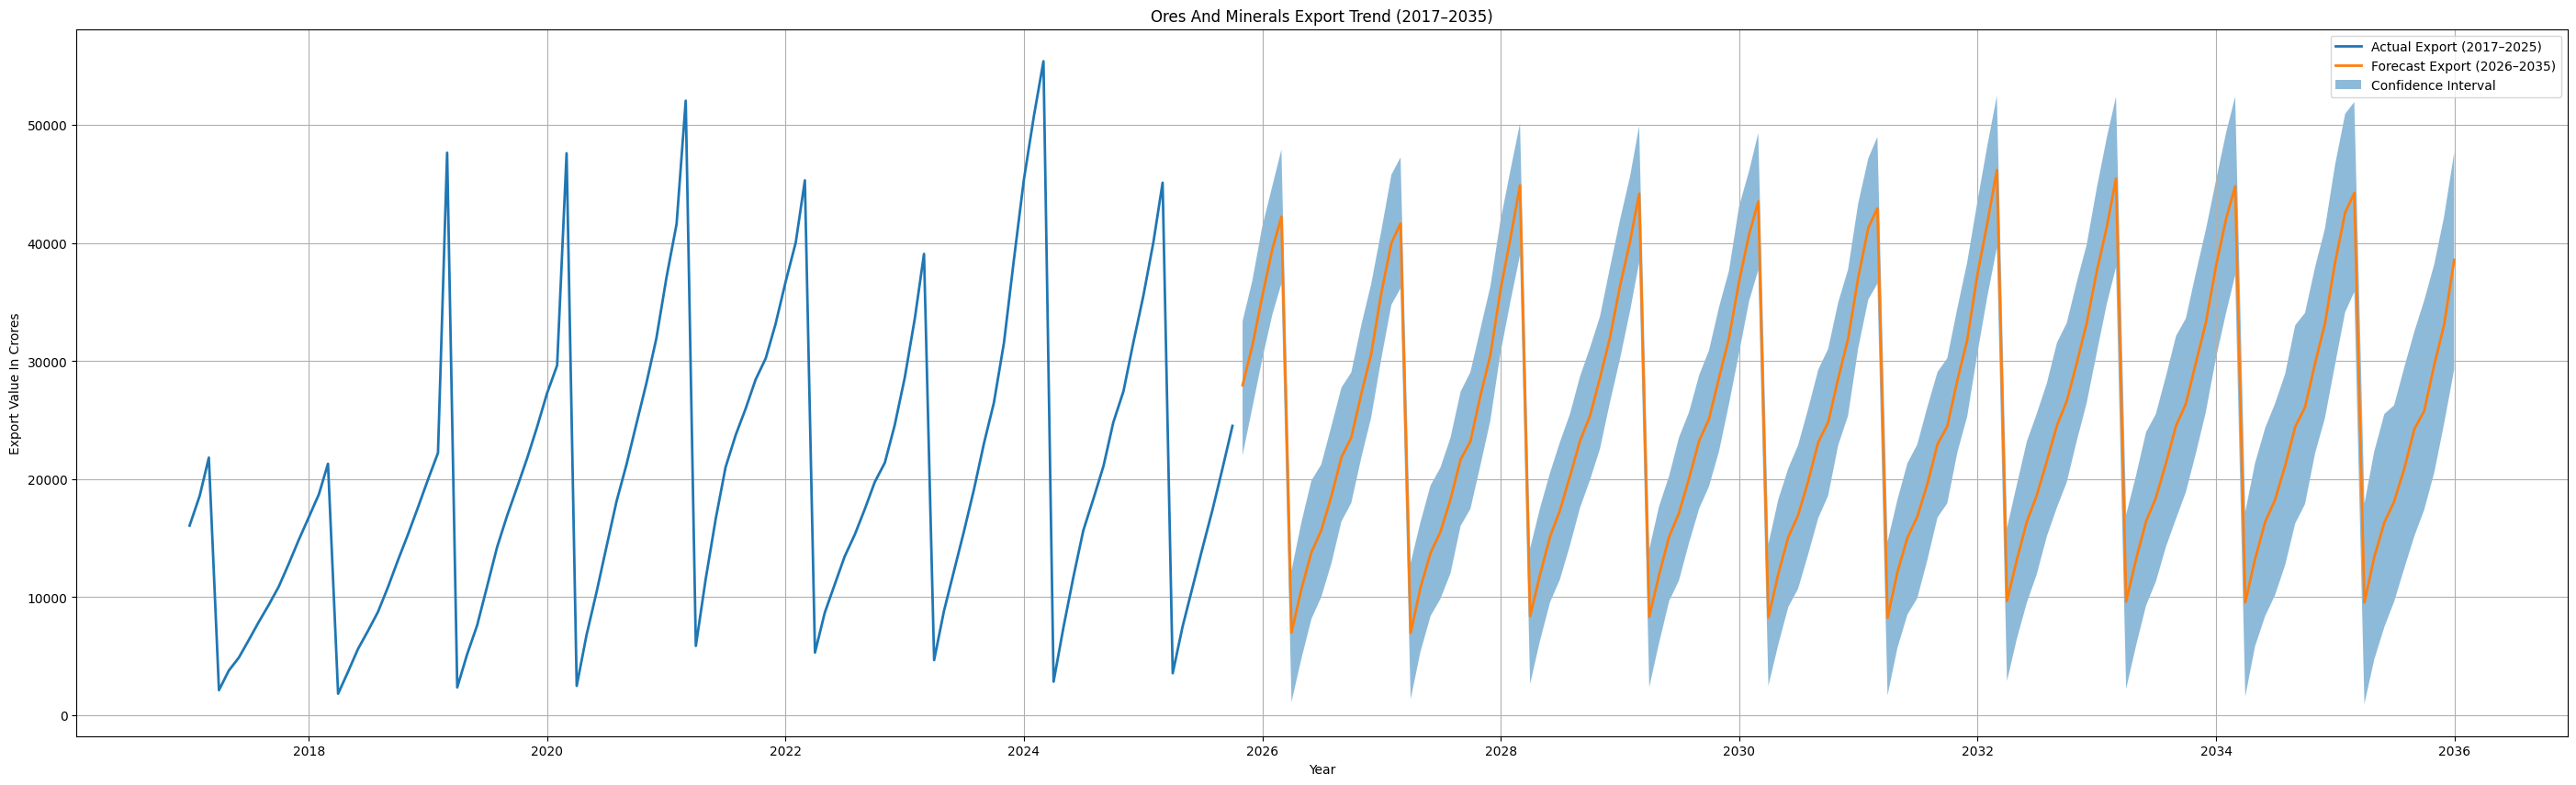

In [12]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat_lower"],
    export_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Ores And Minerals Export Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

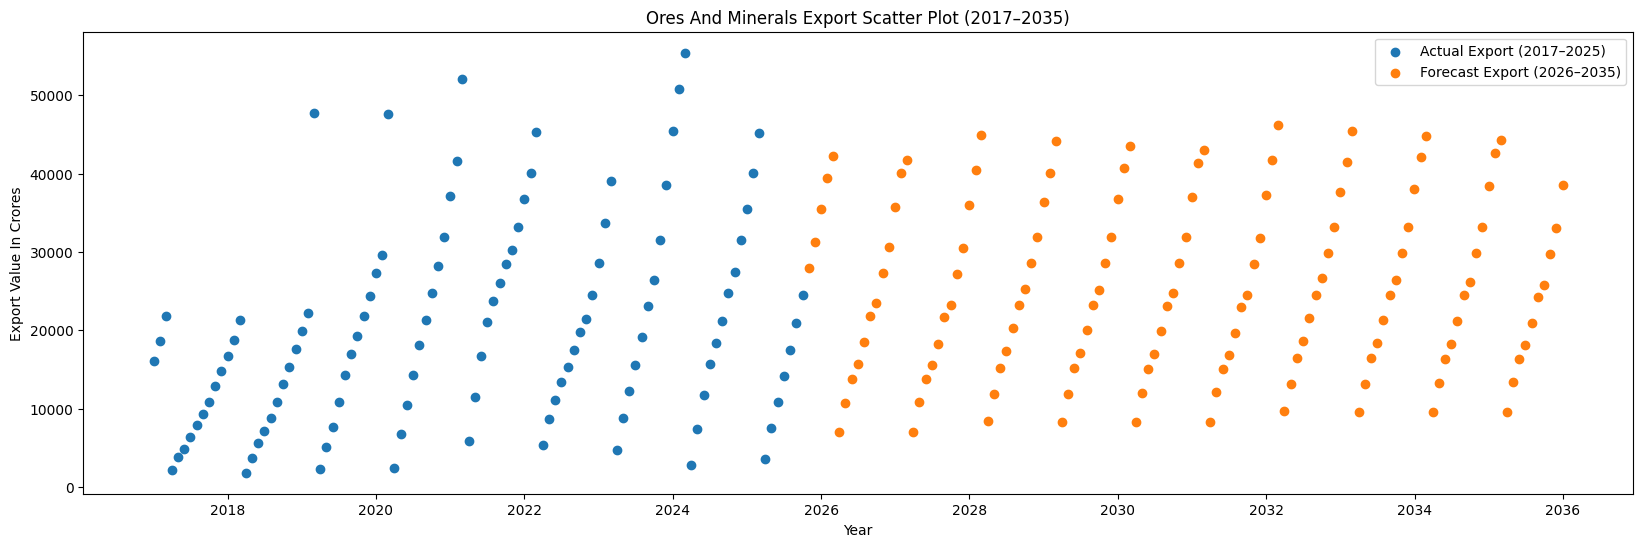

In [13]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)"
)

#future prediction graph
plt.scatter(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)"
)


# Meta Data
plt.title("Ores And Minerals Export Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()

plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("ORES AND MINERALS EXPORT IMPORT DATASET.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["import"] = df["import"].str.replace(",", "", regex=True).astype(float)

# Preparing export data
import_df = df[["ds", "import"]].rename(columns={"import": "y"})
print(import_df)

            ds          y
0   2017-01-01  115417.67
1   2017-02-01  131017.91
2   2017-03-01  145177.67
3   2017-04-01   15777.95
4   2017-05-01   31443.90
..         ...        ...
103 2025-08-01  151557.19
104 2025-09-01  178798.20
105 2025-10-01  210103.24
106 2025-11-01        NaN
107 2025-12-01        NaN

[108 rows x 2 columns]


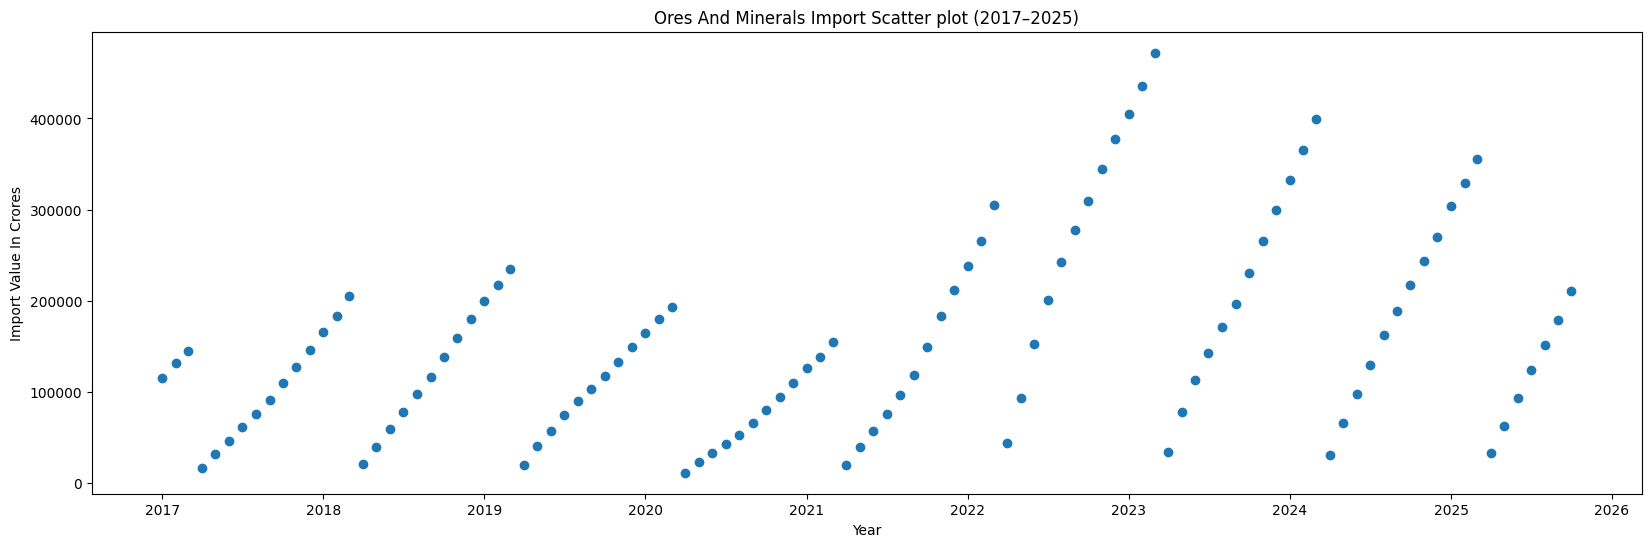

In [15]:
# Graph on import Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(import_df["ds"],import_df["y"])
plt.title("Ores And Minerals Import Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.show()

In [16]:
# Prophet model
from prophet import Prophet

import_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=30
)

import_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)
 #adding curves in future data

import_model.fit(import_df) # Fit model

future_import = import_model.make_future_dataframe(periods=122, freq="ME") #dataframe from jan 2026 - dec 2031

import_forecast = import_model.predict(future_import) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
import_forecast_2026_2035 = import_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for import_data in import_forecast_2026_2035.to_dict("records"):
    print(import_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 268234.34203470673, 'yhat_lower': 210013.8888443288, 'yhat_upper': 330375.7670591546}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 293277.7547739934, 'yhat_lower': 235623.8934055681, 'yhat_upper': 351893.00781788584}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 417639.58781618776, 'yhat_lower': 359092.4583247034, 'yhat_upper': 472600.2579303454}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 435139.09899970575, 'yhat_lower': 370898.49718239333, 'yhat_upper': 494775.04801481264}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 381494.3552652856, 'yhat_lower': 323950.2794325243, 'yhat_upper': 441825.83535859943}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 167771.0704922988, 'yhat_lower': 105180.81544387888, 'yhat_upper': 226782.6232597901}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 173967.4449613933, 'yhat_lower': 109355.31432466807, 'yhat_upper': 232817.09278541457}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 237

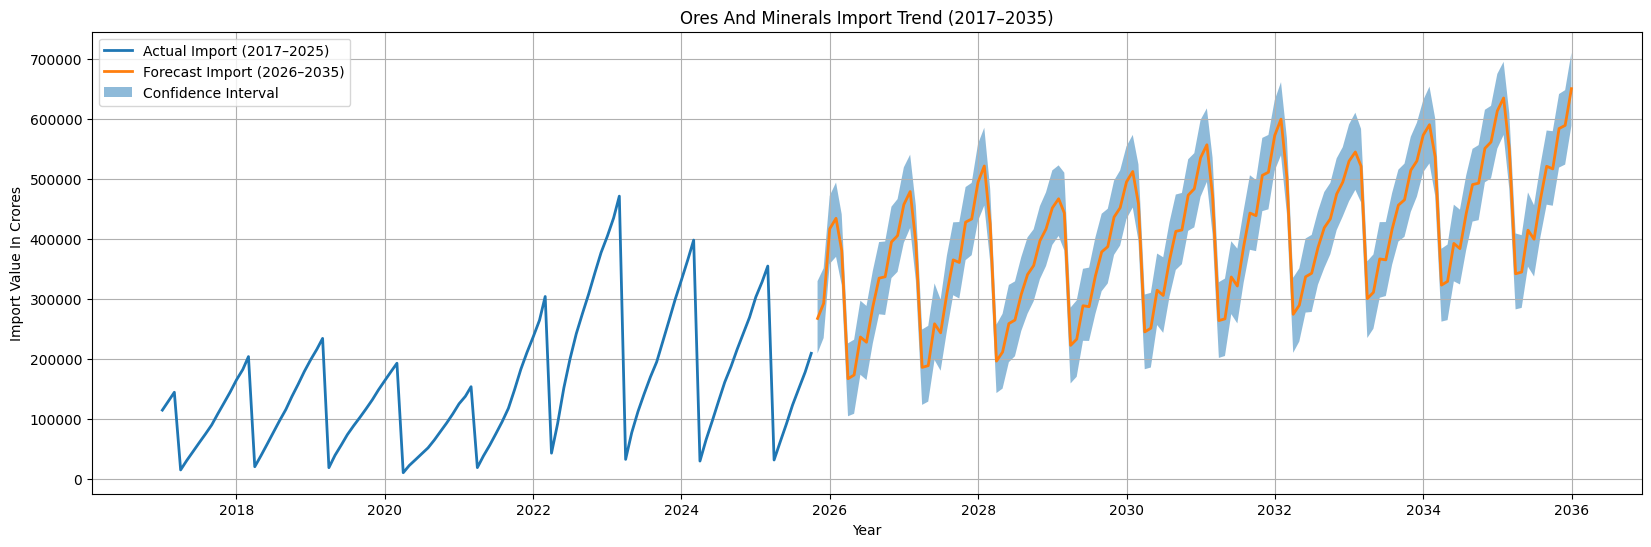

In [17]:
# Trend Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.plot(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    # linestyle="--",
    label="Forecast Import (2026–2035)",
    linewidth=2,
)
plt.fill_between(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat_lower"],
    import_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Ores And Minerals Import Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

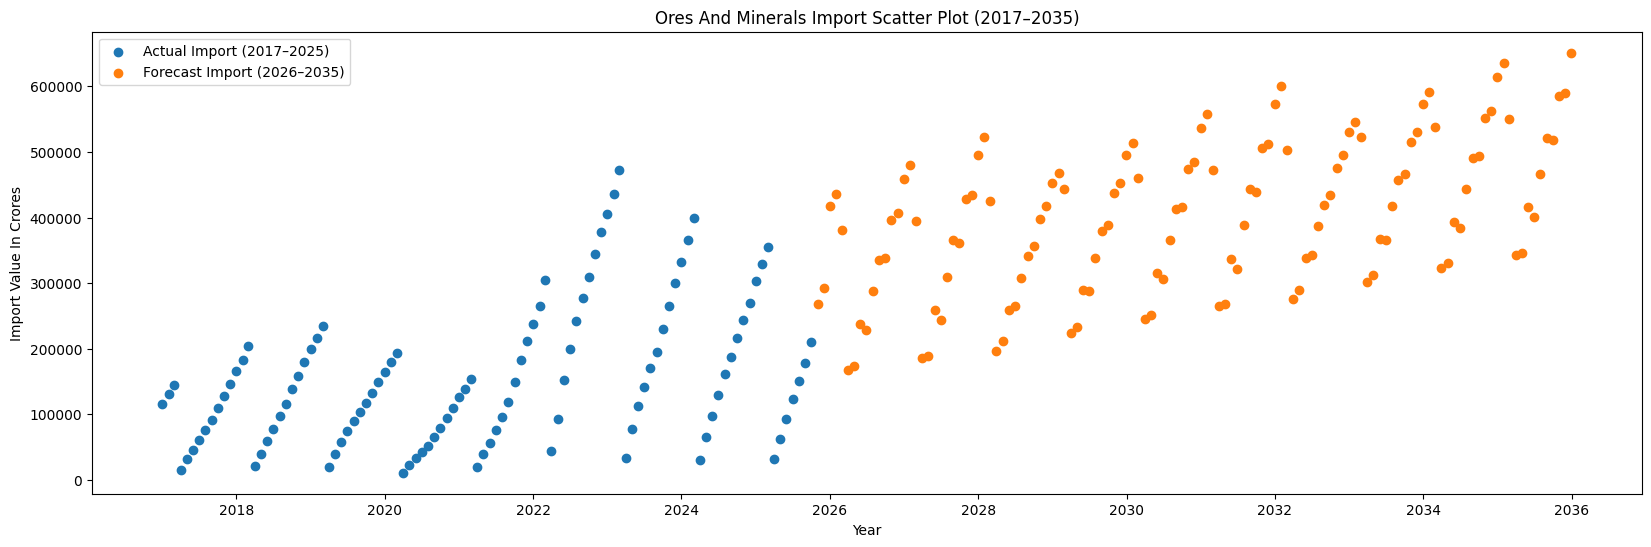

In [18]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)"
)

#future prediction graph
plt.scatter(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    label="Forecast Import (2026–2035)"
)

# Meta Data
plt.title("Ores And Minerals Import Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()

plt.show()

### Key Observations

- Imports dominate India's ores and minerals trade, consistently accounting for nearly **85-90%** of total trade.
- Export share remains limited, indicating structural dependency rather than short-term imbalance.
- The percentage share of imports increases over time, highlighting growing domestic demand.

This establishes a strong foundation for mineral-wise dependency analysis.


### MINERAL-WISE ANALYSIS

#### COPPER ANALYSIS

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

try:
    df = pd.read_excel("COPPER_PRODUCTION.xlsx")
except:
    print("Error Reading File")
df.head()
df.info()

df["Year-Month"] = pd.to_datetime(df["Year-Month"]).dt.normalize()
df.info()
df.rename(columns = {"Ore Prod (tons)":"ore_prod_ton","Concrete Prod (ton)":"concrete_prod_ton","Con Value * 1000":"concrete_value"}, inplace=True)
df.head()
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year-Month           96 non-null     object 
 1   Ore Prod (tons)      96 non-null     float64
 2   Concrete Prod (ton)  96 non-null     float64
 3   Con Value * 1000     96 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year-Month           96 non-null     datetime64[ns]
 1   Ore Prod (tons)      96 non-null     float64       
 2   Concrete Prod (ton)  96 non-null     float64       
 3   Con Value * 1000     96 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.3 KB


Year-Month           0
ore_prod_ton         0
concrete_prod_ton    0
concrete_value       0
dtype: int64

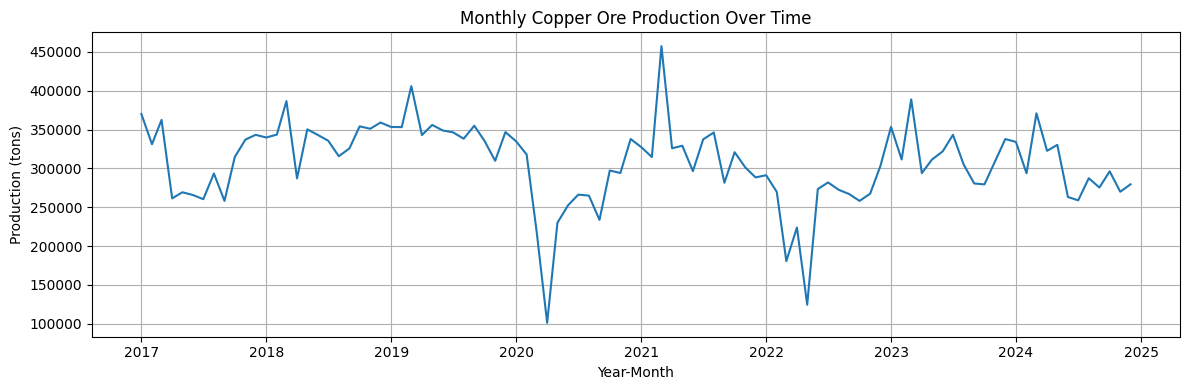

In [20]:
#LinePlot (Ore Production)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["ore_prod_ton"])
plt.title("Monthly Copper Ore Production Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Production (tons)")
plt.grid(True)
plt.tight_layout()
plt.show()

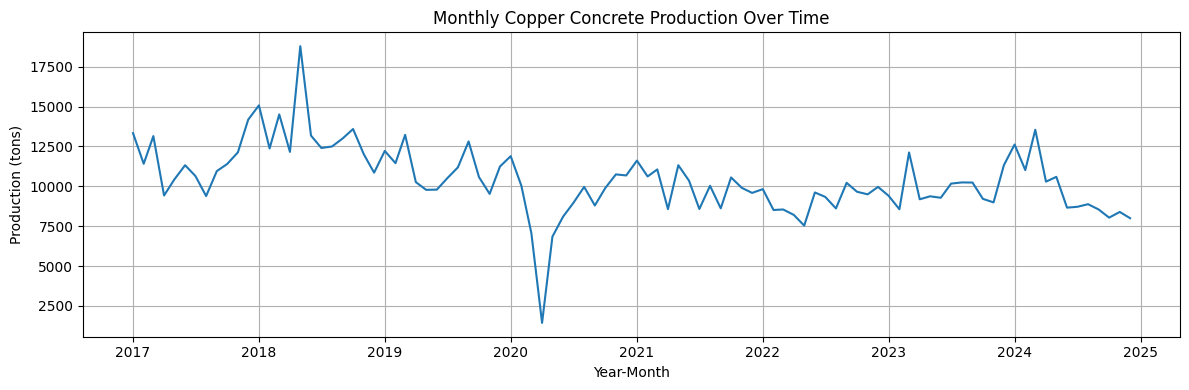

In [21]:
#LinePlot (Concrete Production)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["concrete_prod_ton"])
plt.title("Monthly Copper Concrete Production Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Production (tons)")
plt.grid(True)
plt.tight_layout()
plt.show()

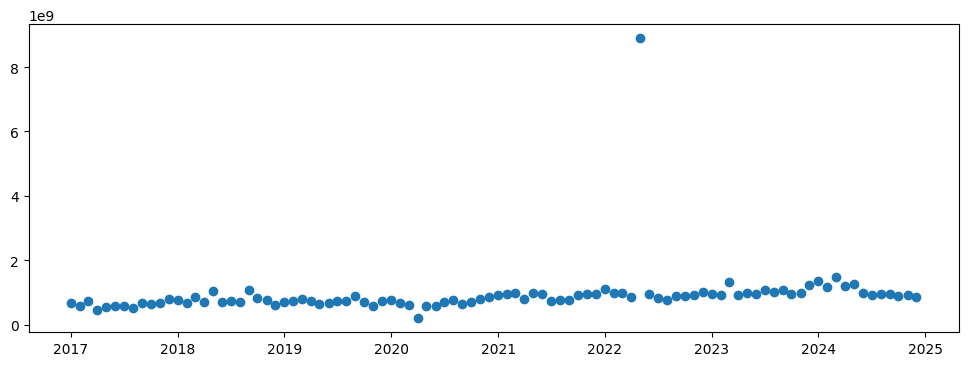

Outlier:  8896300000.0


In [22]:
# Converting given value to real value
df["concrete_value"] = df["concrete_value"]*1000
df["concrete_value"].head()

#Finding Outlier

plt.figure(figsize=(12,4))
plt.scatter(df["Year-Month"],df['concrete_value'])
plt.show()

data = df["concrete_value"]
mean = np.mean(data)
std = np.std(data)
outlier = [x for x in data if x>mean+2*std or x<mean-2*std]
print("Outlier: ", outlier[0])

df["concrete_value_crore"] = df["concrete_value"] / 10000000  # 10^7

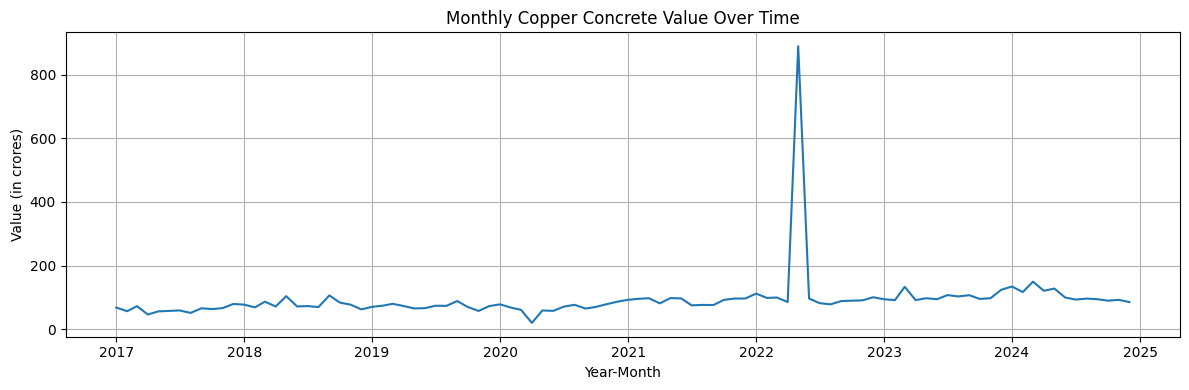

Year-Month  ore_prod_ton  concrete_prod_ton  concrete_value  \
0 2017-01-01      370142.0            13338.0     677973000.0   
1 2017-02-01      331192.0            11415.0     563372000.0   
2 2017-03-01      362532.0            13152.0     722886000.0   
3 2017-04-01      261478.0             9425.0     458581000.0   
4 2017-05-01      269342.0            10437.0     558438000.0   

   concrete_value_crore  
0               67.7973  
1               56.3372  
2               72.2886  
3               45.8581  
4               55.8438

In [23]:
#LinePlot (Concrete Value in crores)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["concrete_value_crore"])
plt.title("Monthly Copper Concrete Value Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()
df.head()

In [24]:
# Overall Percentage of ore_prod and concrete_prod

total_ore_prod = df["ore_prod_ton"].sum()
total_concrete_prod = df["concrete_prod_ton"].sum()

ore_prod_pct = (total_ore_prod / (total_ore_prod + total_concrete_prod)) * 100
concrete_prod_pct = (total_concrete_prod / (total_ore_prod + total_concrete_prod)) * 100

print(f"Ore Production: {ore_prod_pct:.2f} %\nConcrete Production : {concrete_prod_pct:.2f} %")

Ore Production: 96.71 %
Concrete Production : 3.29 %


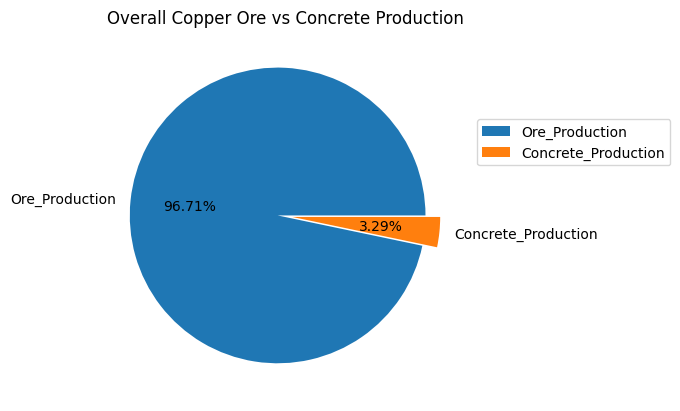

In [25]:
# Pie Chart (ore_prod vs concrete_prod)

plt.pie([ore_prod_pct,concrete_prod_pct],labels=["Ore_Production","Concrete_Production"], autopct="%1.2f%%", explode=(0.05,0.05))
plt.title("Overall Copper Ore vs Concrete Production")
plt.legend(loc="center left",bbox_to_anchor=(1, 0.7))
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("COPPER AND PRODUCTS MADE OF COPPER IMPORT EXPORT DATA.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])


df["export"] = df["export"].str.replace(",", "", regex=True).astype(float)

# Preparing export data
export_df = df[["ds", "export"]].rename(columns={"export": "y"})
print(export_df)

            ds        y
0   2017-01-01  1759.98
1   2017-02-01  1773.61
2   2017-03-01  2163.01
3   2017-04-01  1346.60
4   2017-05-01  1554.53
..         ...      ...
103 2025-08-01  1985.21
104 2025-09-01  2395.85
105 2025-10-01  2875.59
106 2025-11-01      NaN
107 2025-12-01      NaN

[108 rows x 2 columns]


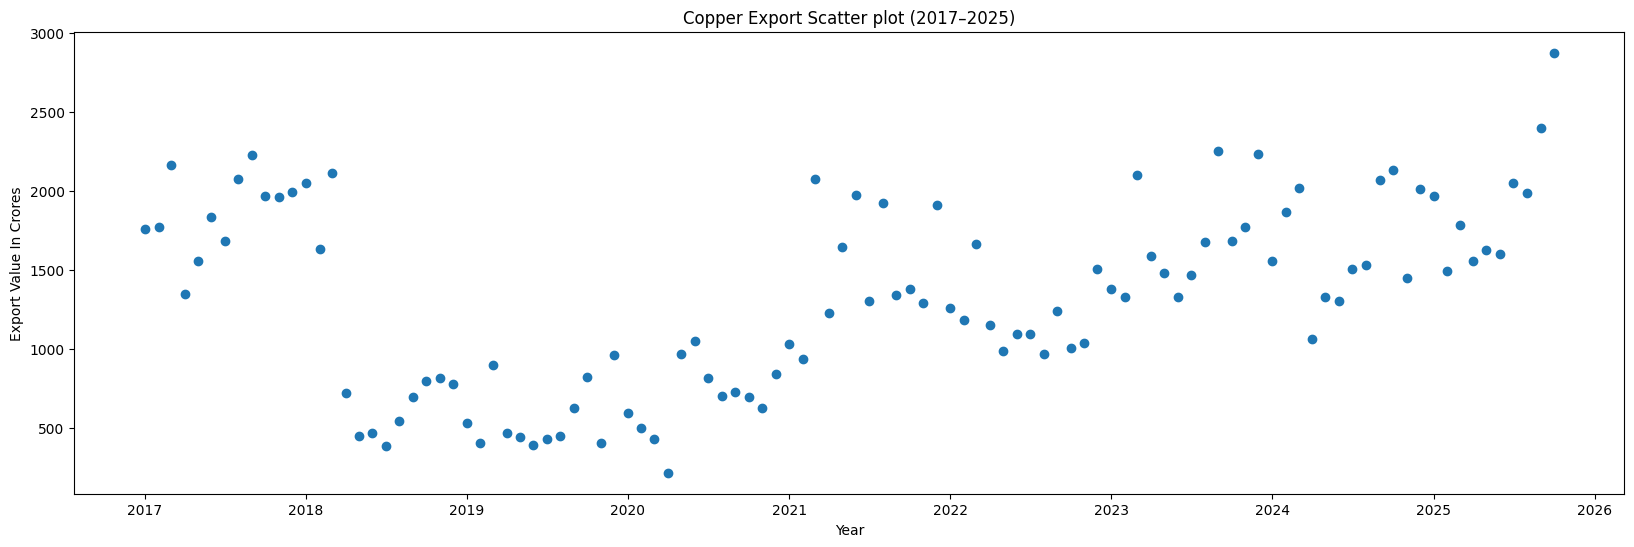

In [27]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(export_df["ds"],export_df["y"])
plt.title("Copper Export Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.show()

In [28]:
# Prophet model

from prophet import Prophet

export_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

export_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)

export_model.fit(export_df) # Fit model

future_export = export_model.make_future_dataframe(periods=122, freq="ME") #dataframe from jan 2026 - dec 2031

export_forecast = export_model.predict(future_export) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
export_forecast_2026_2035 = export_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for export_data in export_forecast_2026_2035.to_dict("records"):
    print(export_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 1647.3434094241238, 'yhat_lower': 946.6859295578168, 'yhat_upper': 2274.3960211646076}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 2010.259006489266, 'yhat_lower': 1338.6293260222026, 'yhat_upper': 2687.277421350211}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 1307.4555913653694, 'yhat_lower': 652.1968297694514, 'yhat_upper': 1941.9627183726407}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 1276.4961977350958, 'yhat_lower': 644.5599062806541, 'yhat_upper': 1920.3324116618833}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 2140.211275398427, 'yhat_lower': 1512.4412635189017, 'yhat_upper': 2785.633675187742}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 1222.235459505072, 'yhat_lower': 567.3284893709151, 'yhat_upper': 1853.995655126791}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 1524.8887863112036, 'yhat_lower': 881.4679631390255, 'yhat_upper': 2172.9928716268587}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 135

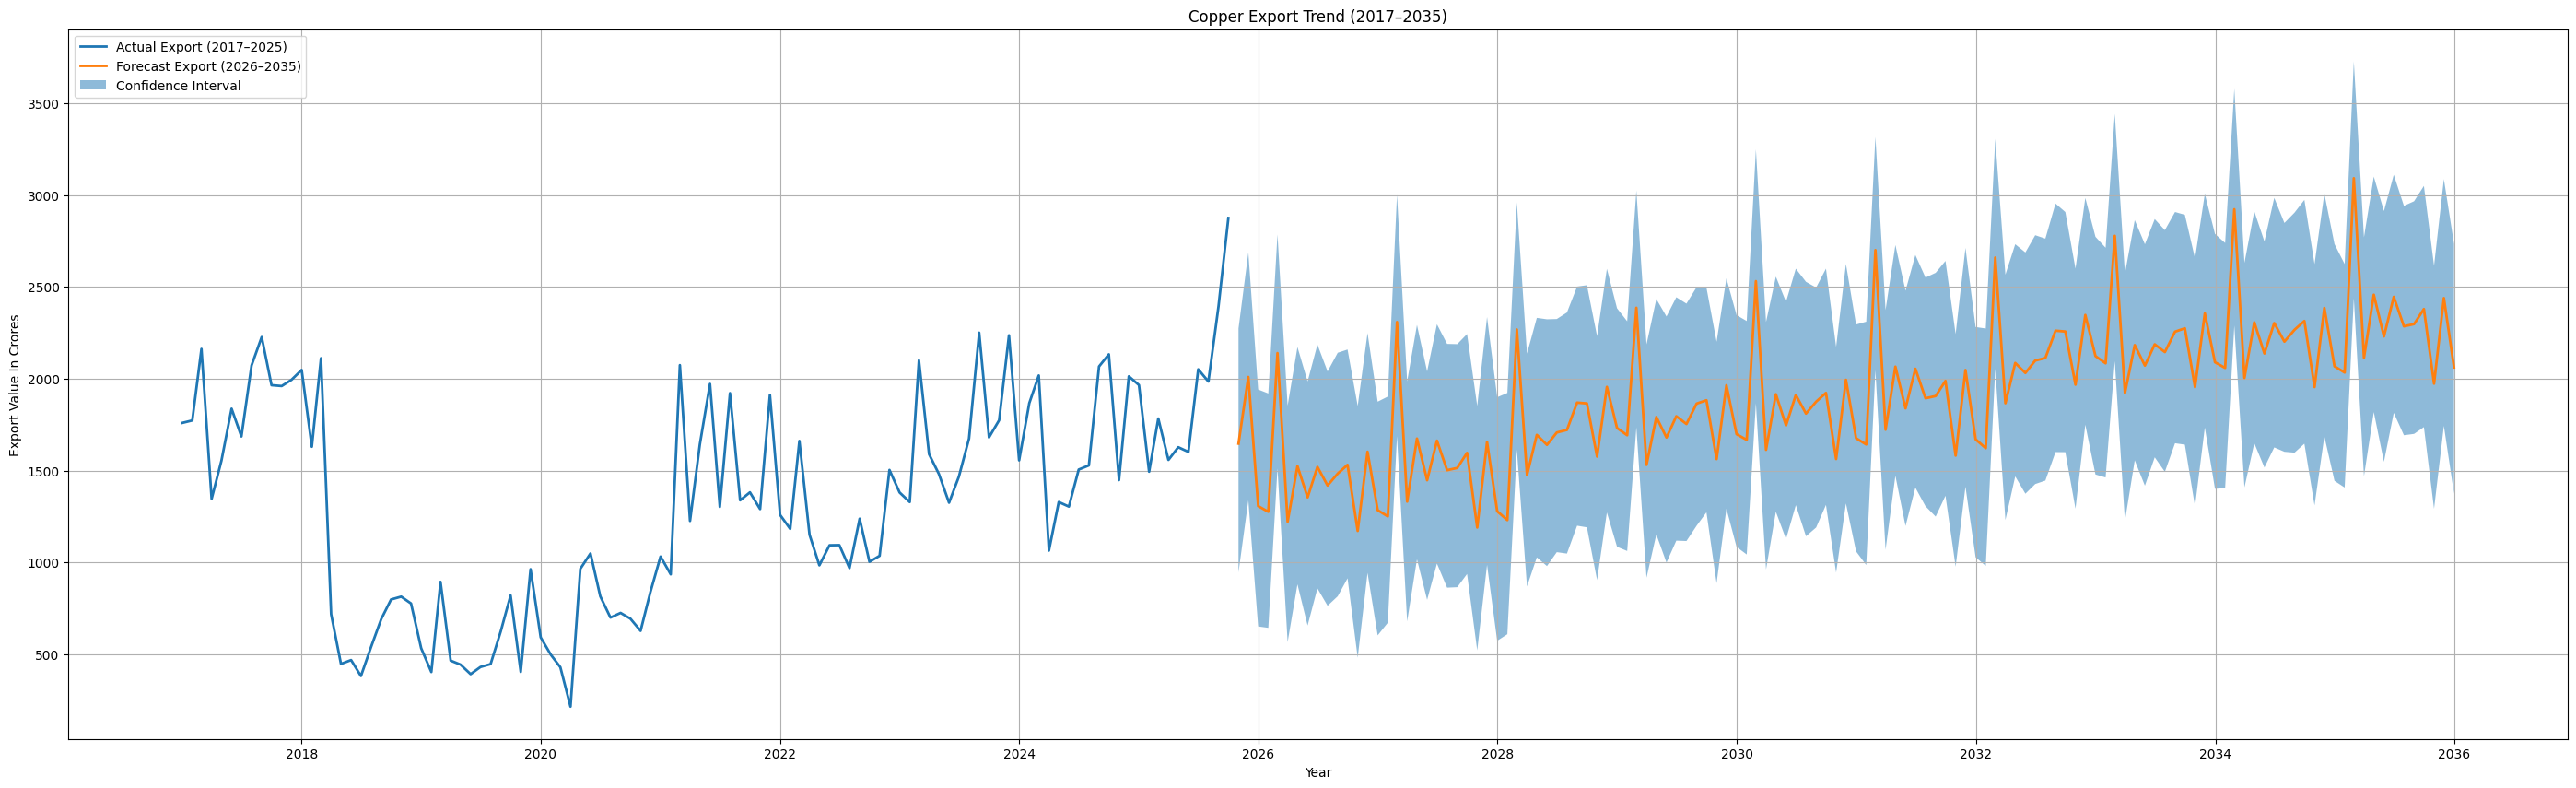

In [29]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat_lower"],
    export_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Copper Export Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

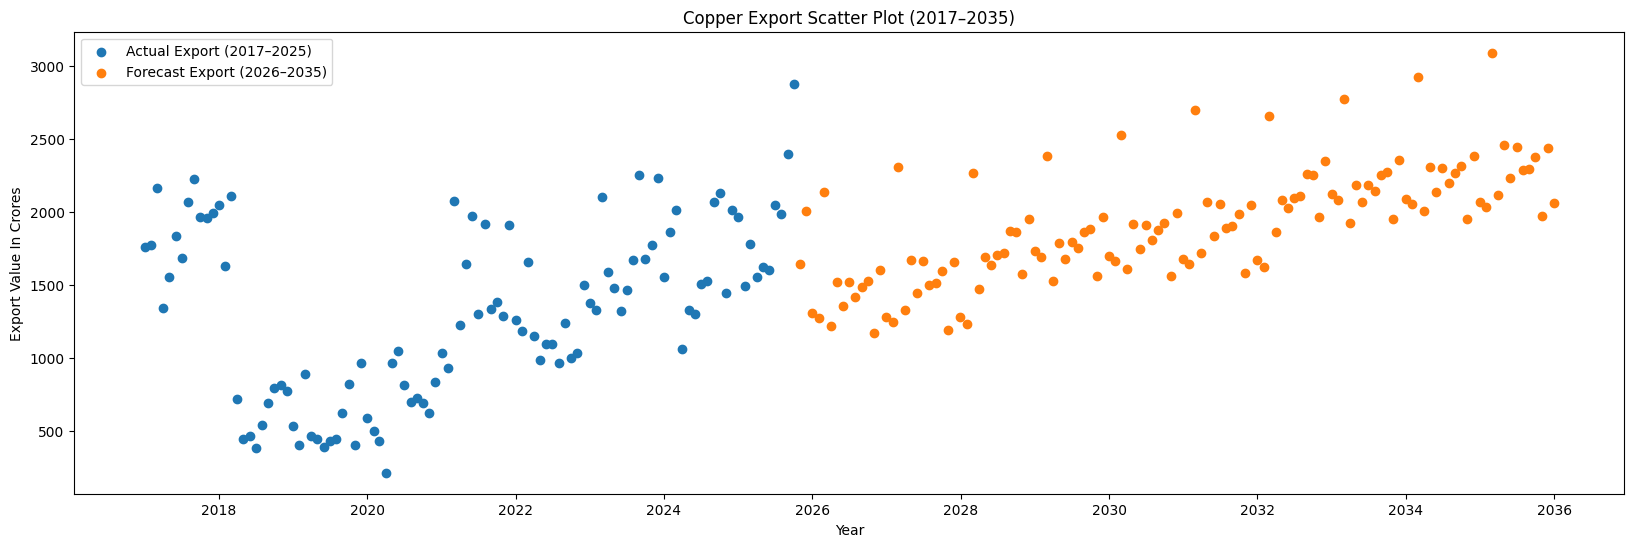

In [30]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)"
)

#future prediction graph
plt.scatter(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)"
)


# Meta Data
plt.title("Copper Export Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()

plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("COPPER AND PRODUCTS MADE OF COPPER IMPORT EXPORT DATA.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])


df["import"] = df["import"].str.replace(",", "", regex=True).astype(float)

# Preparing import data
import_df = df[["ds", "import"]].rename(columns={"import": "y"})
print(import_df)

            ds         y
0   2017-01-01   1975.61
1   2017-02-01   1917.63
2   2017-03-01   2149.94
3   2017-04-01   2434.73
4   2017-05-01   2526.40
..         ...       ...
103 2025-08-01   8985.93
104 2025-09-01   9112.84
105 2025-10-01  10143.52
106 2025-11-01       NaN
107 2025-12-01       NaN

[108 rows x 2 columns]


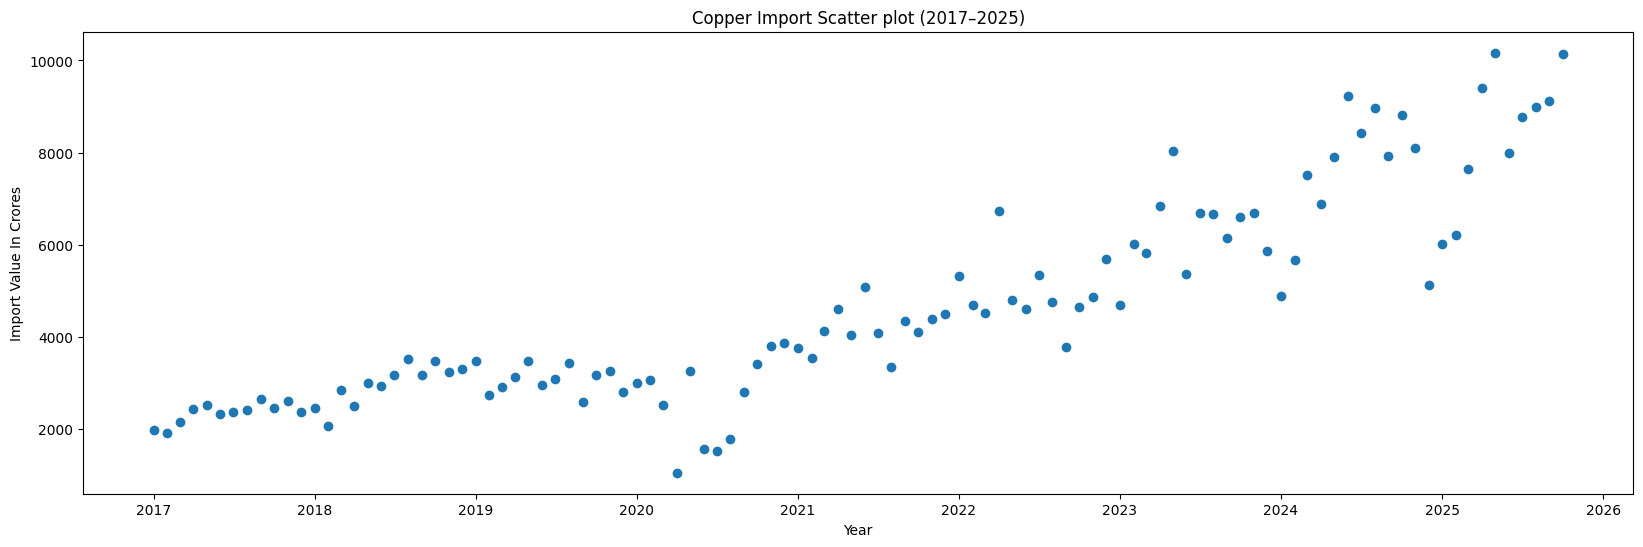

In [32]:
# Graph on import Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(import_df["ds"],import_df["y"])
plt.title("Copper Import Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.show()

In [33]:
# Prophet model

from prophet import Prophet

import_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=30
)

import_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)
#adding curves in future data

import_model.fit(import_df) # Fit model

future_import = import_model.make_future_dataframe(periods=122, freq="ME") #dataframe from jan 2026 - dec 2031

import_forecast = import_model.predict(future_import) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
import_forecast_2026_2035 = import_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for import_data in import_forecast_2026_2035.to_dict("records"):
    print(import_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 8895.240273088399, 'yhat_lower': 7912.948015055921, 'yhat_upper': 9935.407619626934}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 8430.448775933533, 'yhat_lower': 7508.671484135527, 'yhat_upper': 9396.277788904468}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 8401.549698934403, 'yhat_lower': 7452.7972110366745, 'yhat_upper': 9320.846779096379}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 8680.257320008595, 'yhat_lower': 7732.433922912762, 'yhat_upper': 9661.338846059463}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 9567.306390704787, 'yhat_lower': 8579.466940524646, 'yhat_upper': 10448.817888312578}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 10766.623022019612, 'yhat_lower': 9880.404641294448, 'yhat_upper': 11782.171509500871}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 10673.997827931164, 'yhat_lower': 9674.526635449345, 'yhat_upper': 11668.704844551306}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 9428.81

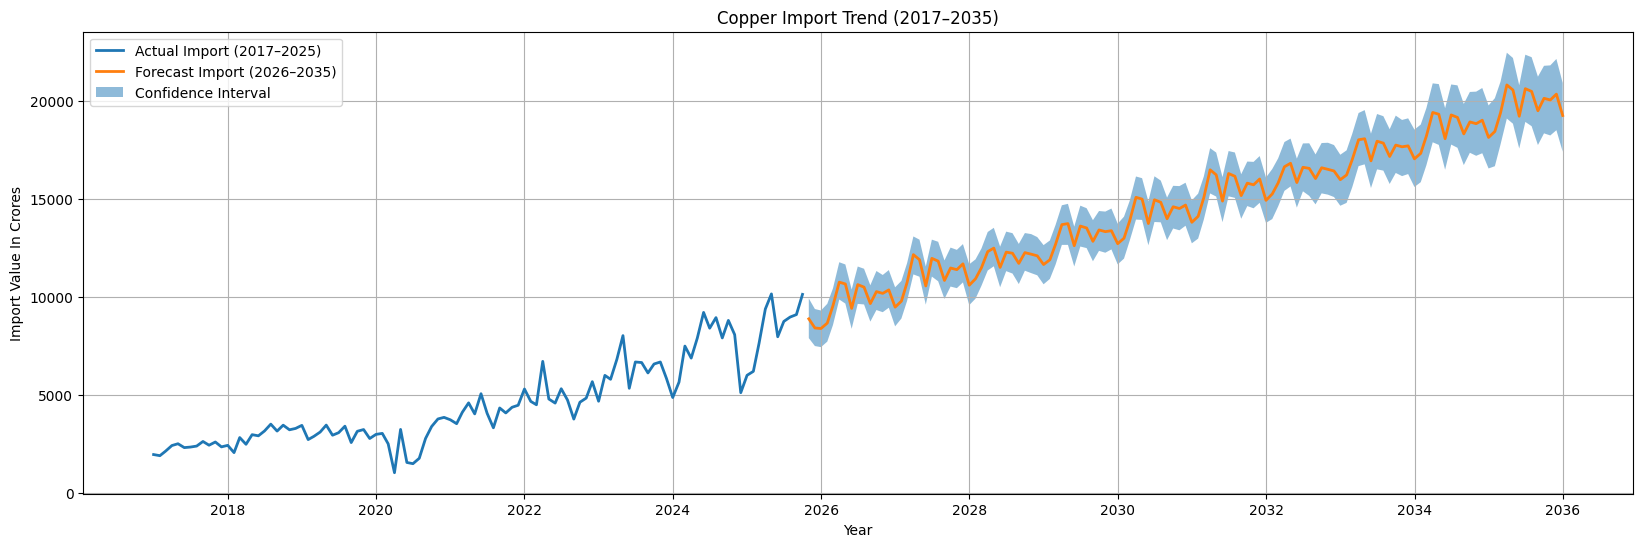

In [34]:
# Trend Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.plot(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    # linestyle="--",
    label="Forecast Import (2026–2035)",
    linewidth=2,
)
plt.fill_between(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat_lower"],
    import_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Copper Import Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

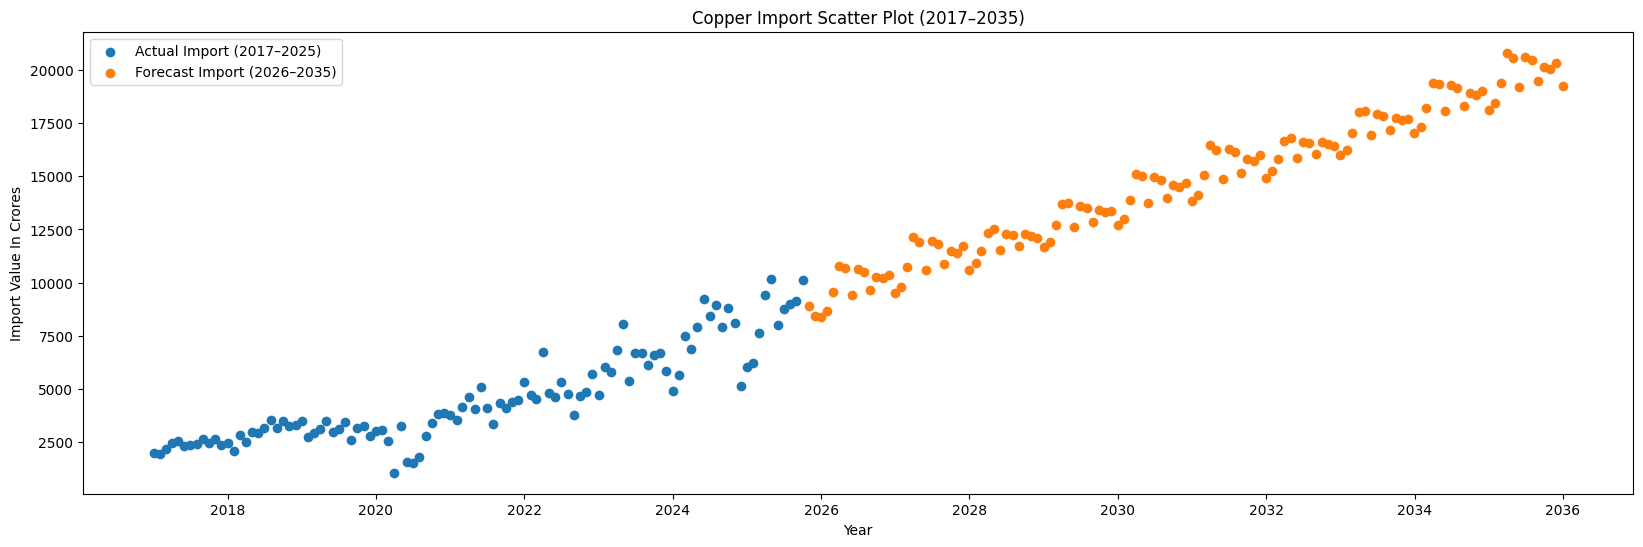

In [35]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)"
)

#future prediction graph
plt.scatter(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    label="Forecast Import (2026–2035)"
)

# Meta Data
plt.title("Copper Import Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()

plt.show()

In [36]:
#Calculating And Plotting Trade Balance Graph On Export-import Data From 2017 - 2035
trade_balance_forecast = []

for i in range(len(export_forecast)):
    date = export_forecast.loc[i, 'ds']
    export_val = export_forecast.loc[i, 'yhat']
    import_val = import_forecast.loc[i, 'yhat']

    trade_balance_forecast.append(
        [date, export_val - import_val]
    )

trade_balance_forecast_df = pd.DataFrame(
    trade_balance_forecast,
    columns=['ds', 'trade_balance']
)

print(trade_balance_forecast_df)


            ds  trade_balance
0   2017-01-01    -560.870226
1   2017-02-01    -632.773296
2   2017-03-01    -659.804077
3   2017-04-01   -1588.141583
4   2017-05-01   -1891.983940
..         ...            ...
225 2035-09-30  -17760.269315
226 2035-10-31  -18083.404706
227 2035-11-30  -17913.828644
228 2035-12-31  -17202.045222
229 2036-01-31  -17577.705908

[230 rows x 2 columns]


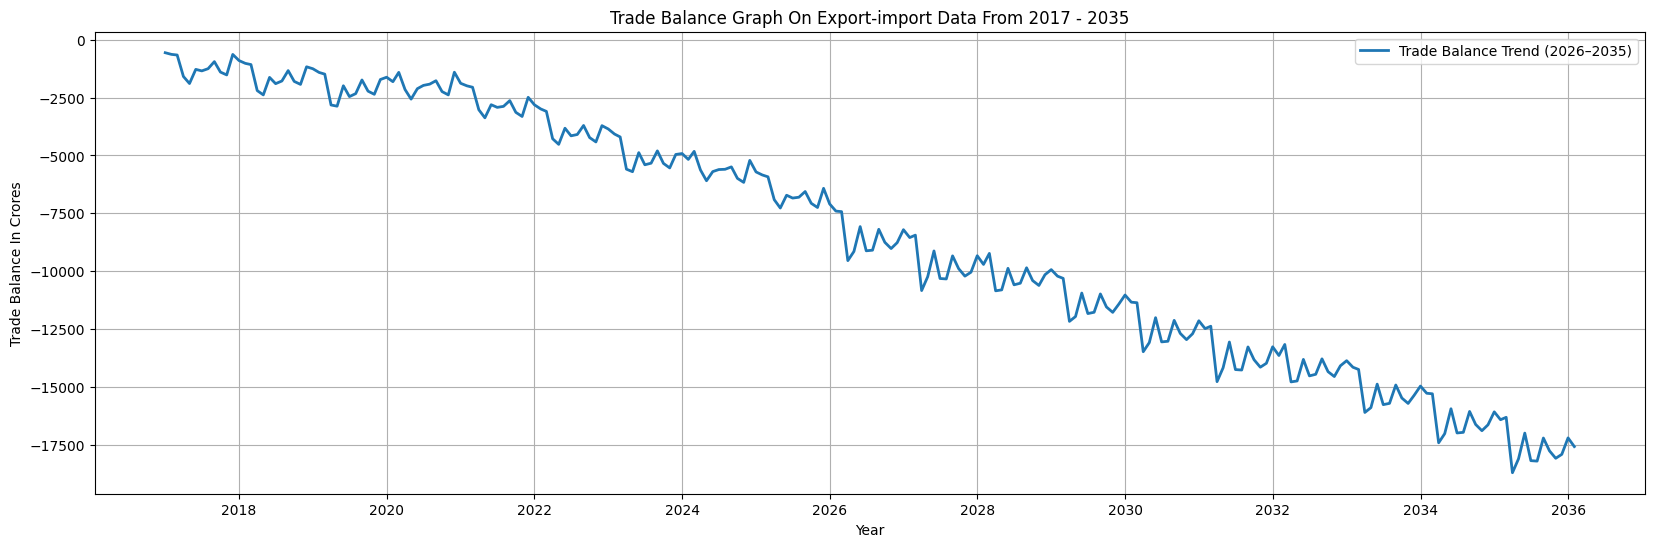

In [37]:
plt.figure(figsize=(20, 6))

plt.plot(trade_balance_forecast_df["ds"],trade_balance_forecast_df["trade_balance"] ,label="Trade Balance Trend (2026–2035)",
        linewidth=2)
plt.title("Trade Balance Graph On Export-import Data From 2017 - 2035")
plt.xlabel("Year")
plt.ylabel("Trade Balance In Crores")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
import pandas as pd;
import matplotlib.pyplot as plt

df = pd.read_csv("COPPER PRODUCTION DATA.csv")


df.columns = ["ds", "Ore_prod", "concrete_prod" , "concrete_value"] # seperatting columns
df = df.dropna(subset=["ds"])

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["Ore_prod"] = df["Ore_prod"].str.replace(",", "", regex=True).astype(float)

# Prepare export data
ore_prod = df[["ds", "Ore_prod"]].rename(columns={"Ore_prod": "y"})
print(ore_prod)

            ds         y
0   2017-01-01  370142.0
1   2017-02-01  331192.0
2   2017-03-01  362532.0
3   2017-04-01  261478.0
4   2017-05-01  269342.0
..         ...       ...
98  2024-08-01  287415.0
99  2024-09-01  275446.0
100 2024-10-01  296306.0
101 2024-11-01  269998.0
102 2024-12-01  279611.0

[96 rows x 2 columns]


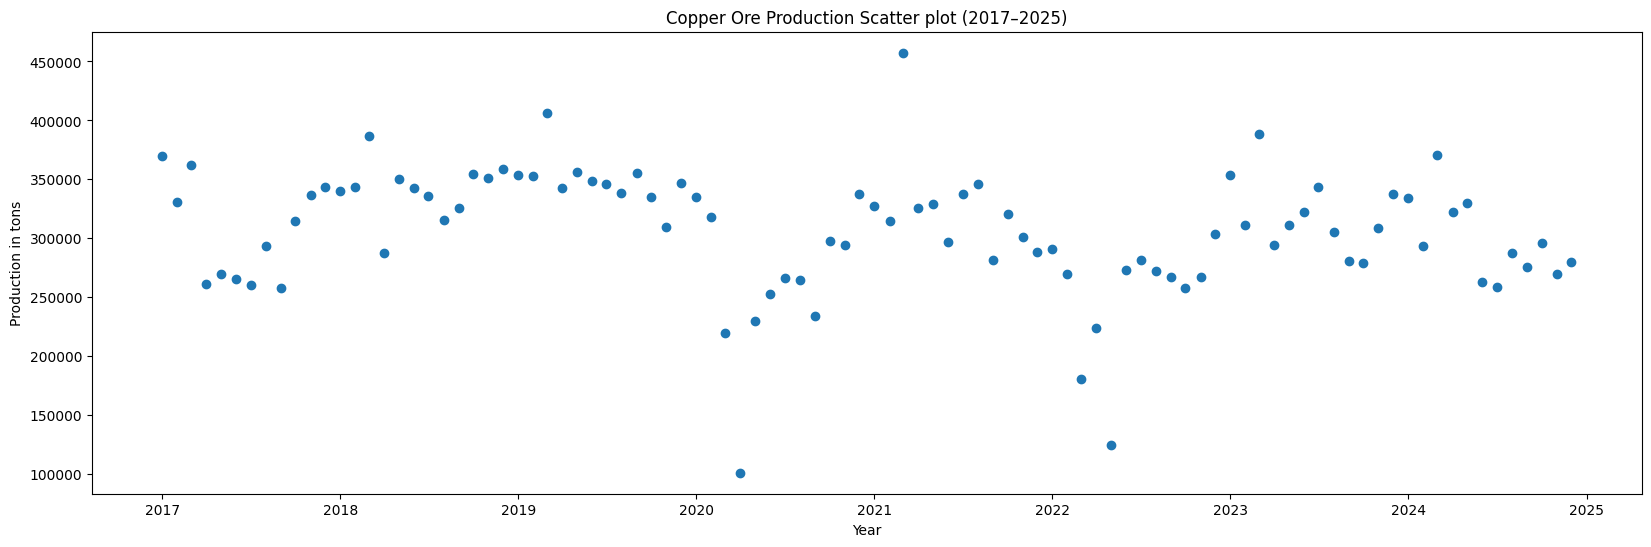

In [39]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(ore_prod["ds"],ore_prod["y"])
plt.title("Copper Ore Production Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Production in tons")
plt.show()

In [40]:
# Prophet Model
from prophet import Prophet

ore_prod_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.2
)

ore_prod_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)

ore_prod_model.fit(ore_prod)

future_ore_prod = ore_prod_model.make_future_dataframe(
    periods=132,
    freq="MS"
)

ore_prod_forecast = ore_prod_model.predict(future_ore_prod)

#filltering data
ore_prod_forecast_2026_2035 = ore_prod_forecast[
    ore_prod_forecast["ds"] >= "2025-01-01"
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

#printing the future data
for data in ore_prod_forecast_2026_2035.to_dict("records"): print(data)

{'ds': Timestamp('2025-01-01 00:00:00'), 'yhat': 336469.6872975815, 'yhat_lower': 287054.3758041, 'yhat_upper': 390803.5325798151}
{'ds': Timestamp('2025-02-01 00:00:00'), 'yhat': 323674.6071205507, 'yhat_lower': 273773.8542565993, 'yhat_upper': 376950.0743001669}
{'ds': Timestamp('2025-03-01 00:00:00'), 'yhat': 333888.4771038171, 'yhat_lower': 280747.09762737295, 'yhat_upper': 387255.33001433016}
{'ds': Timestamp('2025-04-01 00:00:00'), 'yhat': 258971.20019703504, 'yhat_lower': 208469.85082205143, 'yhat_upper': 309538.16304962576}
{'ds': Timestamp('2025-05-01 00:00:00'), 'yhat': 283606.65402579785, 'yhat_lower': 233053.94771274002, 'yhat_upper': 333781.0586843228}
{'ds': Timestamp('2025-06-01 00:00:00'), 'yhat': 289406.11950372957, 'yhat_lower': 236955.26636246845, 'yhat_upper': 340405.7412939396}
{'ds': Timestamp('2025-07-01 00:00:00'), 'yhat': 296208.0357292086, 'yhat_lower': 246732.65539080577, 'yhat_upper': 352090.98197734857}
{'ds': Timestamp('2025-08-01 00:00:00'), 'yhat': 30716

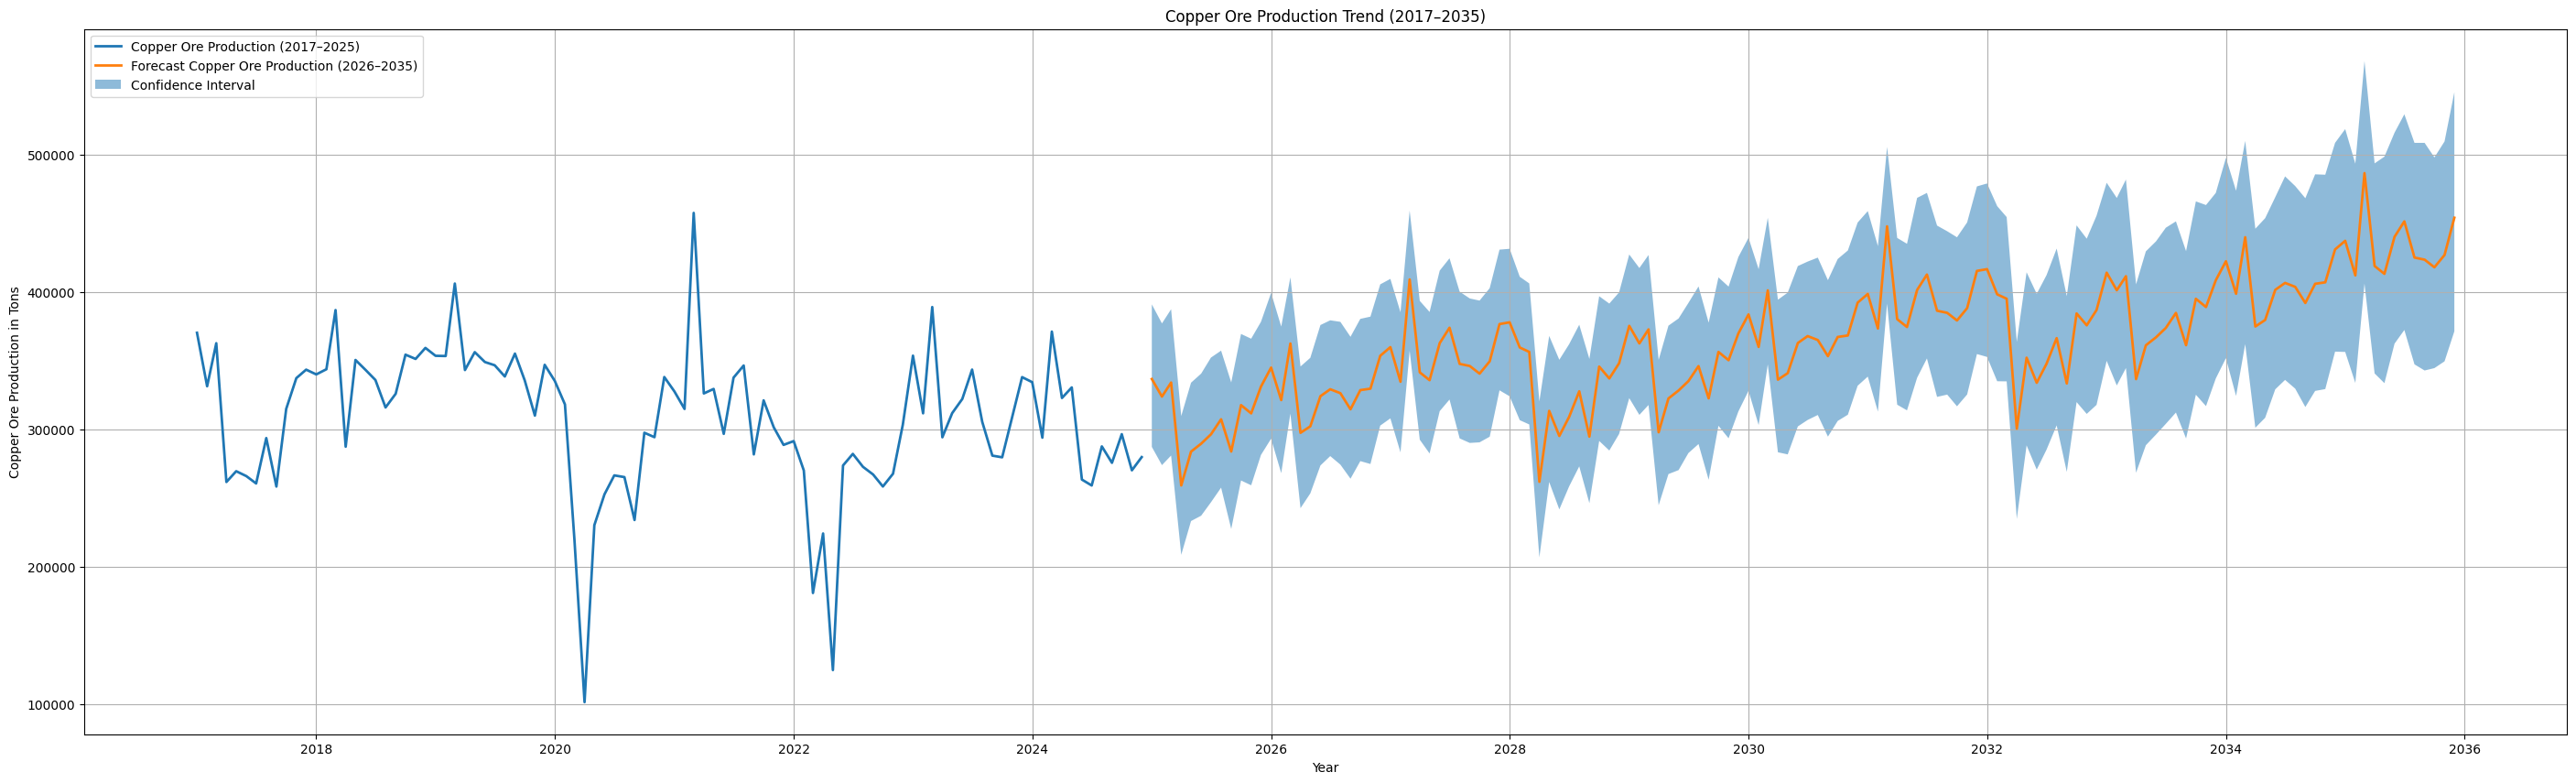

In [41]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    ore_prod["ds"],
    ore_prod["y"],
    label="Copper Ore Production (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    ore_prod_forecast_2026_2035["ds"],
    ore_prod_forecast_2026_2035["yhat"],
    label="Forecast Copper Ore Production (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    ore_prod_forecast_2026_2035["ds"],
    ore_prod_forecast_2026_2035["yhat_lower"],
    ore_prod_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Copper Ore Production Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Copper Ore Production in Tons")
plt.legend()
plt.grid(True)

plt.show()

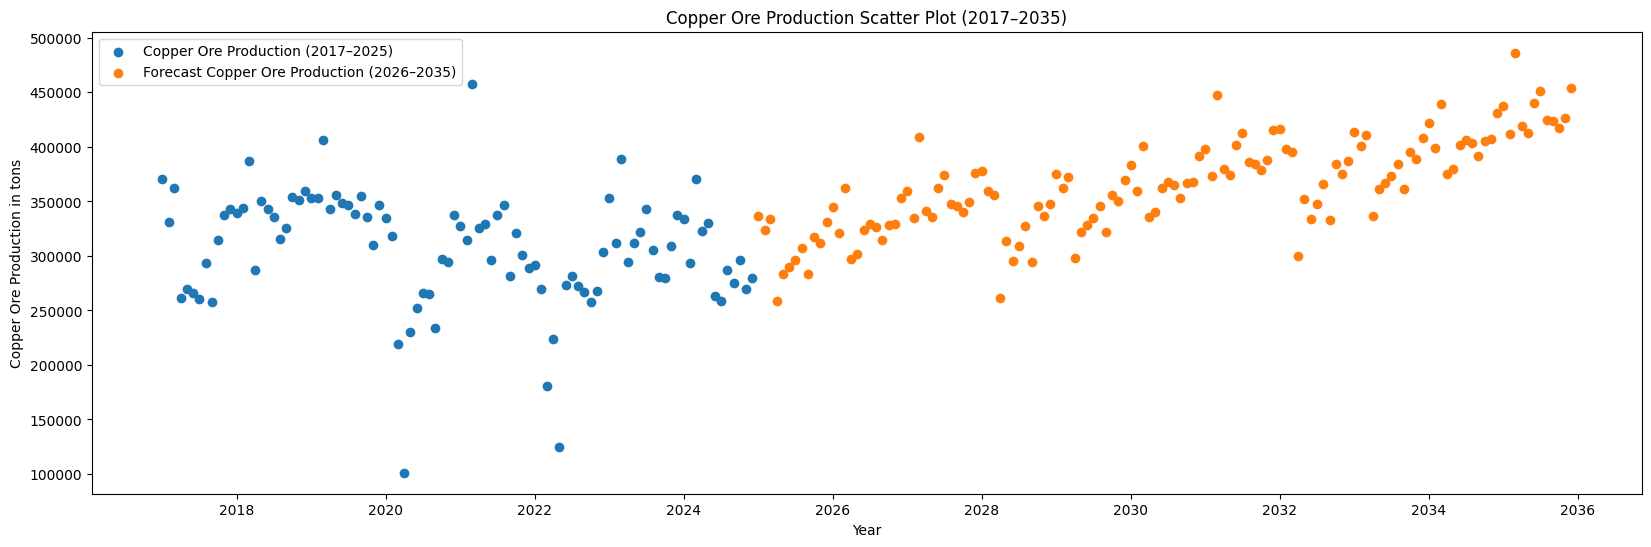

In [42]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    ore_prod["ds"],
    ore_prod["y"],
    label="Copper Ore Production (2017–2025)"
)

#future prediction graph
plt.scatter(
    ore_prod_forecast_2026_2035["ds"],
    ore_prod_forecast_2026_2035["yhat"],
    label="Forecast Copper Ore Production (2026–2035)"
)


# Meta Data
plt.title("Copper Ore Production Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Copper Ore Production in tons")
plt.legend()

plt.show()

In [43]:
import pandas as pd;
import matplotlib.pyplot as plt

df = pd.read_csv("COPPER PRODUCTION DATA.csv")


df.columns = ["ds", "Ore_prod", "concrete_prod" , "concrete_value"] # seperatting columns
df = df.dropna(subset=["ds"])

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["concrete_prod"] = df["concrete_prod"].str.replace(",", "", regex=True).astype(float)

# Prepare export data
conc_prod = df[["ds", "concrete_prod"]].rename(columns={"concrete_prod": "y"})
print(conc_prod)

            ds        y
0   2017-01-01  13338.0
1   2017-02-01  11415.0
2   2017-03-01  13152.0
3   2017-04-01   9425.0
4   2017-05-01  10437.0
..         ...      ...
98  2024-08-01   8879.0
99  2024-09-01   8544.0
100 2024-10-01   8036.0
101 2024-11-01   8393.0
102 2024-12-01   8000.0

[96 rows x 2 columns]


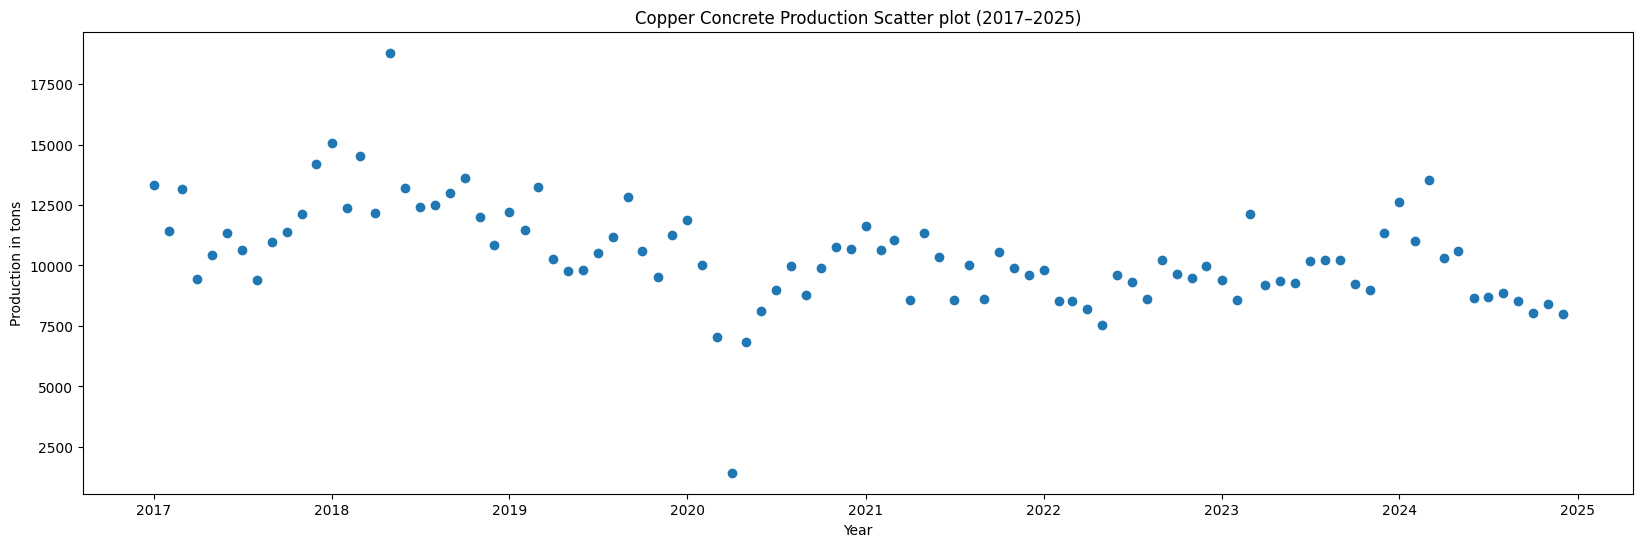

In [44]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(conc_prod["ds"],conc_prod["y"])
plt.title("Copper Concrete Production Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Production in tons")
plt.show()

In [45]:
# Prophet Model
from prophet import Prophet

conc_prod_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.2
)

conc_prod_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)

conc_prod_model.fit(conc_prod)

future_conc_prod = conc_prod_model.make_future_dataframe(
    periods=132,
    freq="MS"
)

conc_prod_forecast = conc_prod_model.predict(future_conc_prod)

#filltering data
conc_prod_forecast_2026_2035 = conc_prod_forecast[
    conc_prod_forecast["ds"] >= "2025-01-01"
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

#printing the future data
for data in conc_prod_forecast_2026_2035.to_dict("records"): print(data)

{'ds': Timestamp('2025-01-01 00:00:00'), 'yhat': 11378.91097033625, 'yhat_lower': 9520.864425881187, 'yhat_upper': 13149.029129913291}
{'ds': Timestamp('2025-02-01 00:00:00'), 'yhat': 9943.515518795195, 'yhat_lower': 8243.382110396731, 'yhat_upper': 11817.821450245488}
{'ds': Timestamp('2025-03-01 00:00:00'), 'yhat': 10838.91485051941, 'yhat_lower': 9165.326530059225, 'yhat_upper': 12430.092589971306}
{'ds': Timestamp('2025-04-01 00:00:00'), 'yhat': 7567.668620146016, 'yhat_lower': 5842.122185093821, 'yhat_upper': 9216.901676842255}
{'ds': Timestamp('2025-05-01 00:00:00'), 'yhat': 9852.969564249539, 'yhat_lower': 8157.2084920721945, 'yhat_upper': 11736.82156576267}
{'ds': Timestamp('2025-06-01 00:00:00'), 'yhat': 9319.058671123354, 'yhat_lower': 7649.61838927979, 'yhat_upper': 11013.93404465824}
{'ds': Timestamp('2025-07-01 00:00:00'), 'yhat': 9098.291575336147, 'yhat_lower': 7270.5206088192745, 'yhat_upper': 10926.750005992493}
{'ds': Timestamp('2025-08-01 00:00:00'), 'yhat': 9304.806

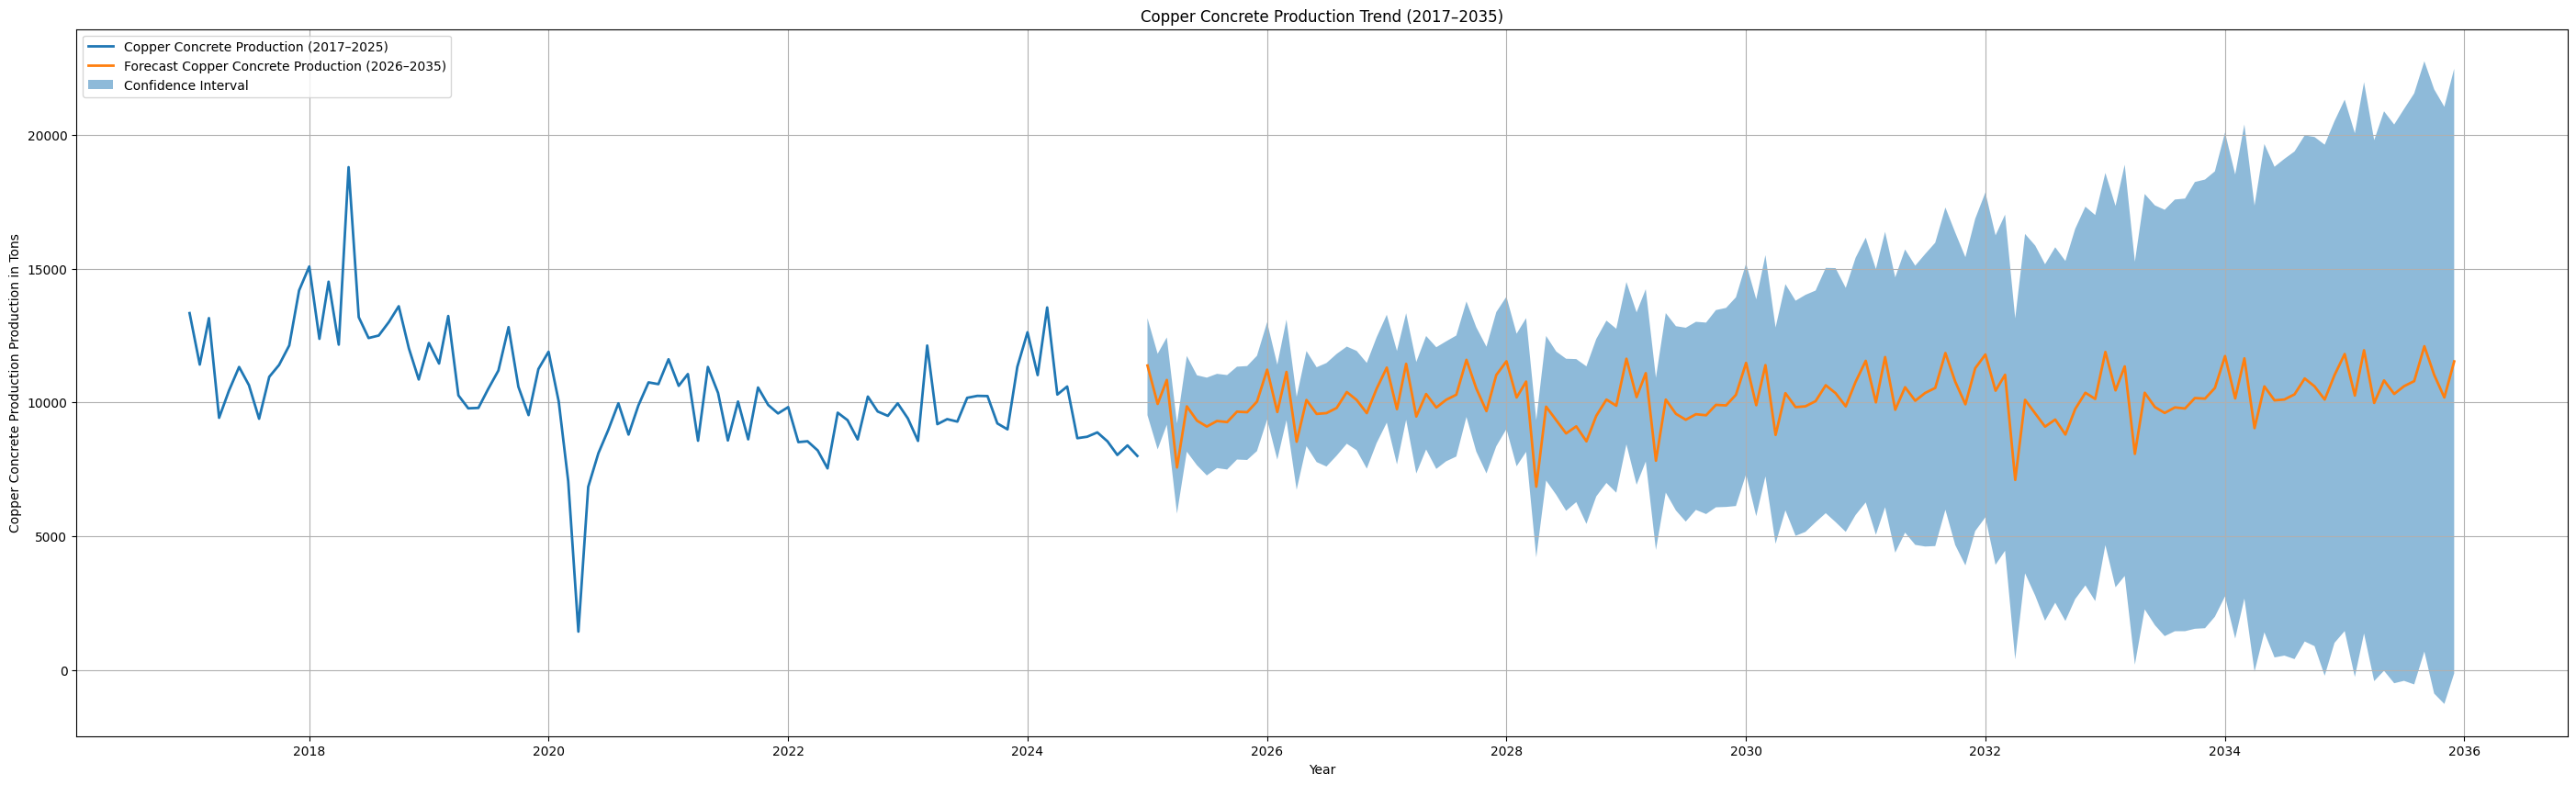

In [46]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    conc_prod["ds"],
    conc_prod["y"],
    label="Copper Concrete Production (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    conc_prod_forecast_2026_2035["ds"],
    conc_prod_forecast_2026_2035["yhat"],
    label="Forecast Copper Concrete Production (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    conc_prod_forecast_2026_2035["ds"],
    conc_prod_forecast_2026_2035["yhat_lower"],
    conc_prod_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Copper Concrete Production Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Copper Concrete Production Production in Tons")
plt.legend()
plt.grid(True)

plt.show()

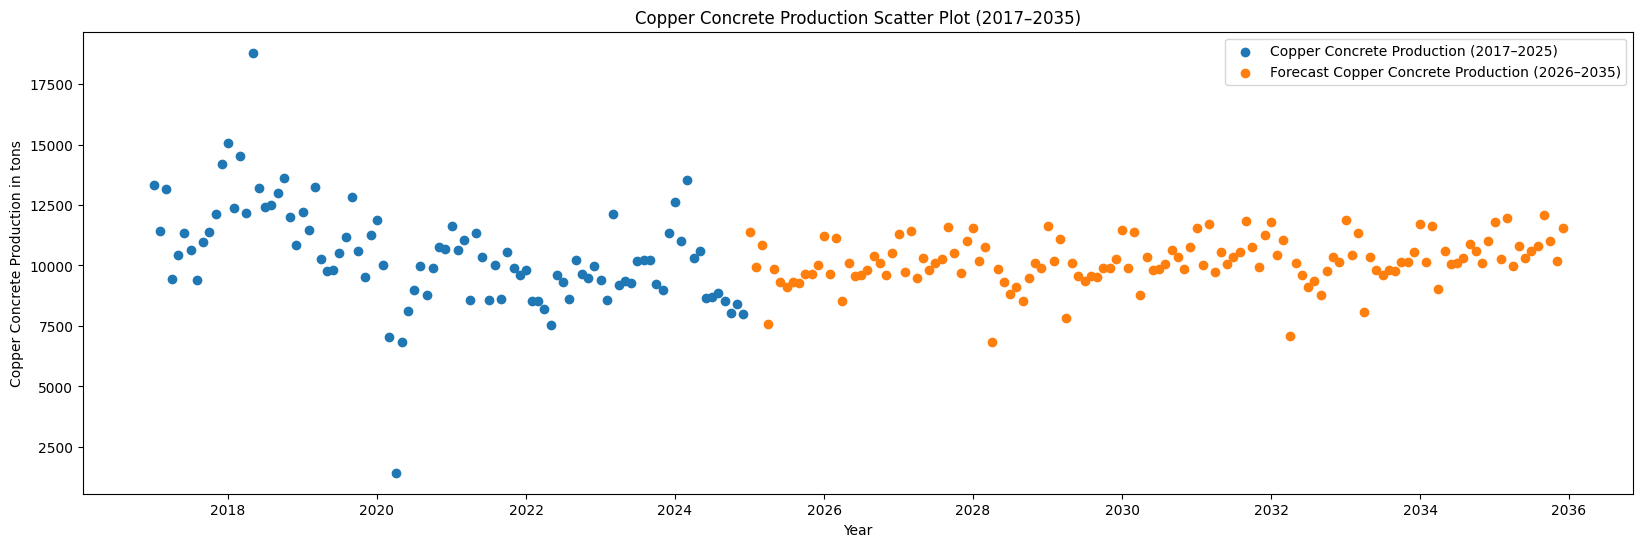

In [47]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    conc_prod["ds"],
    conc_prod["y"],
    label="Copper Concrete Production (2017–2025)"
)

#future prediction graph
plt.scatter(
    conc_prod_forecast_2026_2035["ds"],
    conc_prod_forecast_2026_2035["yhat"],
    label="Forecast Copper Concrete Production (2026–2035)"
)


# Meta Data
plt.title("Copper Concrete Production Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Copper Concrete Production in tons")
plt.legend()

plt.show()

In [48]:
import pandas as pd;
import matplotlib.pyplot as plt

df = pd.read_csv("COPPER PRODUCTION DATA.csv")


df.columns = ["ds", "Ore_prod", "concrete_prod" , "concrete_value"] # seperatting columns
df = df.dropna(subset=["ds"])

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["concrete_value"] = df["concrete_value"].str.replace(",", "", regex=True).astype(float)

# Prepare export data
conc_value = df[["ds", "concrete_value"]].rename(columns={"concrete_value": "y"})
print(conc_value)

            ds         y
0   2017-01-01  677973.0
1   2017-02-01  563372.0
2   2017-03-01  722886.0
3   2017-04-01  458581.0
4   2017-05-01  558438.0
..         ...       ...
98  2024-08-01  959453.0
99  2024-09-01  940536.0
100 2024-10-01  894340.0
101 2024-11-01  921361.0
102 2024-12-01  850208.0

[96 rows x 2 columns]


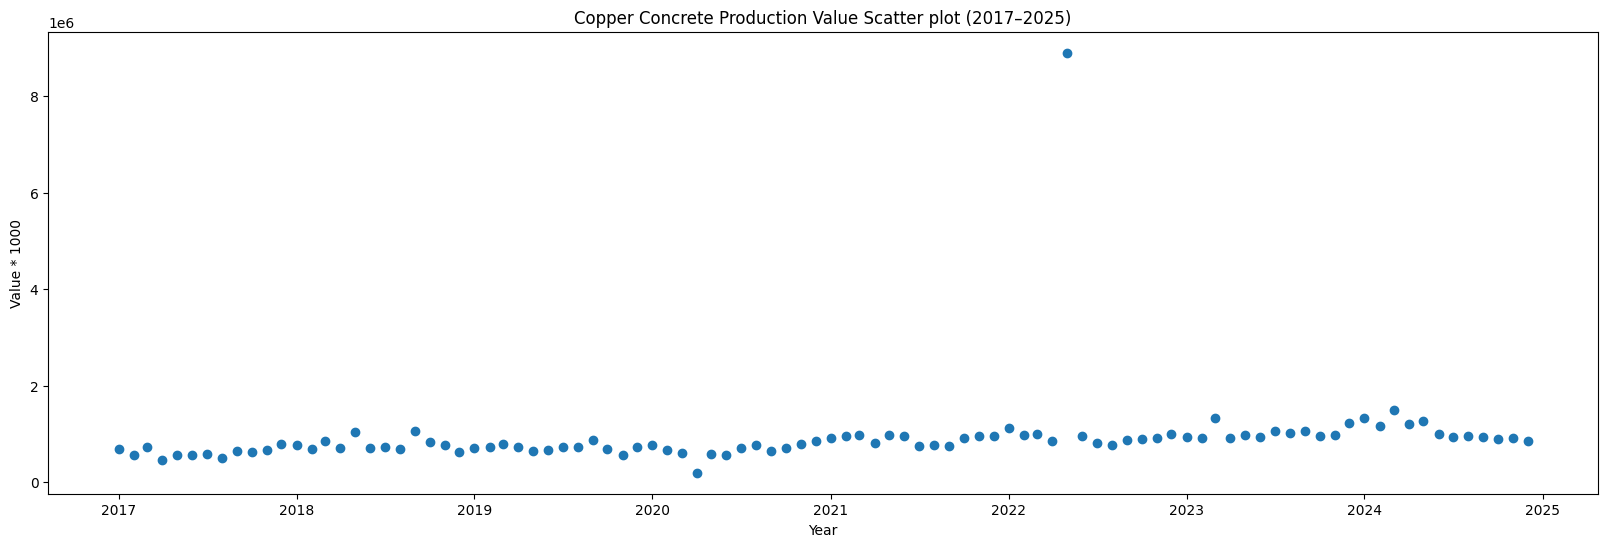

In [49]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(conc_value["ds"],conc_value["y"])
plt.title("Copper Concrete Production Value Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Value * 1000")
plt.show()

In [50]:
# Prophet Model
from prophet import Prophet

conc_value_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.2
)

conc_value_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)

conc_value_model.fit(conc_value)

future_conc_value = conc_value_model.make_future_dataframe(
    periods=132,
    freq="MS"
)

conc_value_forecast = conc_value_model.predict(future_conc_value)

#filltering data
conc_value_forecast_2026_2035 = conc_value_forecast[
    conc_value_forecast["ds"] >= "2025-01-01"
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

#printing the future data
for data in conc_value_forecast_2026_2035.to_dict("records"): print(data)

{'ds': Timestamp('2025-01-01 00:00:00'), 'yhat': 1335996.5516473558, 'yhat_lower': 342230.80998427875, 'yhat_upper': 2272171.73197371}
{'ds': Timestamp('2025-02-01 00:00:00'), 'yhat': 1133462.593655385, 'yhat_lower': 183055.24233892187, 'yhat_upper': 2115407.1760751936}
{'ds': Timestamp('2025-03-01 00:00:00'), 'yhat': 1582060.1492467094, 'yhat_lower': 614616.1557958446, 'yhat_upper': 2448572.6205923315}
{'ds': Timestamp('2025-04-01 00:00:00'), 'yhat': 1084822.7143689971, 'yhat_lower': 101636.48682620787, 'yhat_upper': 2060484.3941337892}
{'ds': Timestamp('2025-05-01 00:00:00'), 'yhat': 2222427.9225125685, 'yhat_lower': 1244540.1503504193, 'yhat_upper': 3188964.8846109174}
{'ds': Timestamp('2025-06-01 00:00:00'), 'yhat': 1124752.121143097, 'yhat_lower': 224996.5002657147, 'yhat_upper': 2089688.9747523814}
{'ds': Timestamp('2025-07-01 00:00:00'), 'yhat': 1229728.1649133172, 'yhat_lower': 325006.456417043, 'yhat_upper': 2174031.5229096753}
{'ds': Timestamp('2025-08-01 00:00:00'), 'yhat': 

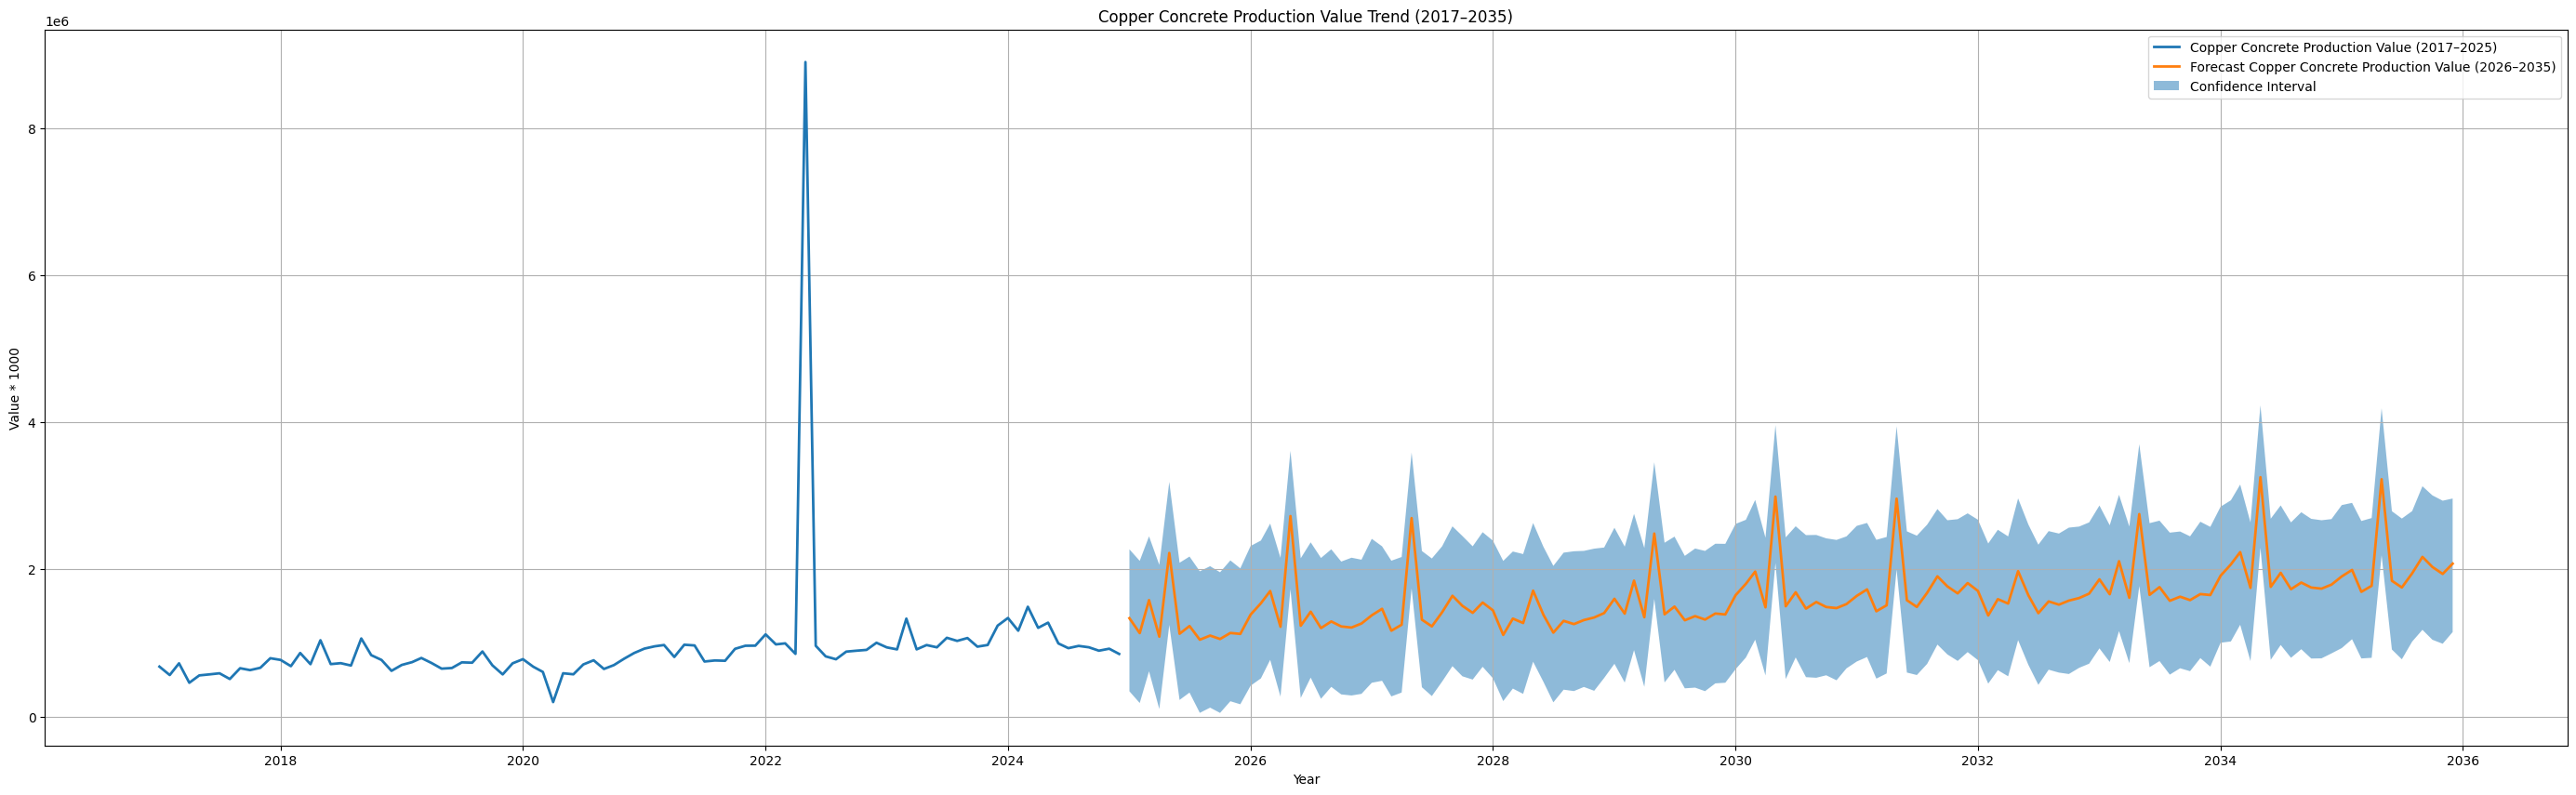

In [51]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    conc_value["ds"],
    conc_value["y"],
    label="Copper Concrete Production Value (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    conc_value_forecast_2026_2035["ds"],
    conc_value_forecast_2026_2035["yhat"],
    label="Forecast Copper Concrete Production Value (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    conc_value_forecast_2026_2035["ds"],
    conc_value_forecast_2026_2035["yhat_lower"],
    conc_value_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Copper Concrete Production Value Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Value * 1000")
plt.legend()
plt.grid(True)

plt.show()

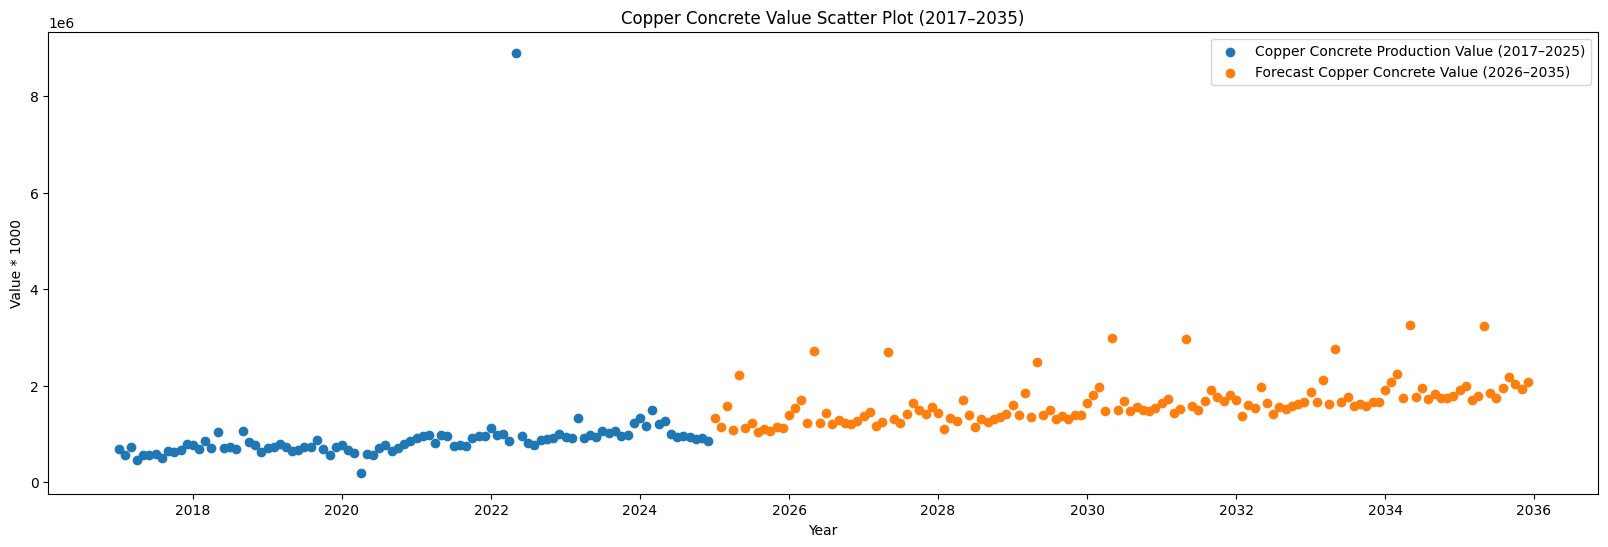

In [52]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    conc_value["ds"],
    conc_value["y"],
    label="Copper Concrete Production Value (2017–2025)"
)

#future prediction graph
plt.scatter(
    conc_value_forecast_2026_2035["ds"],
    conc_value_forecast_2026_2035["yhat"],
    label="Forecast Copper Concrete Value (2026–2035)"
)


# Meta Data
plt.title("Copper Concrete Value Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Value * 1000")
plt.legend()

plt.show()

### Copper Insights

- Copper production shows growth but remains volatile.
- Imports consistently exceed exports, indicating domestic supply constraints.
- The gap suggests insufficient beneficiation and refining infrastructure rather than resource scarcity.

Copper dependency is driven by processing bottlenecks rather than geological limitations.


#### GRAPHITE ANALYSIS

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

try:
    df_prod = pd.read_excel("graphite_production_data.xlsx")
    df_exim = pd.read_excel("graphite_exim_data.xlsx")
except:
    print("Error reading file")

df_prod.head()
df_exim.head()
df_prod[df_prod.isnull().any(axis=1)]
df_exim[df_exim.isnull().any(axis=1)]
df_prod.dropna(inplace=True)
df_exim.dropna(inplace=True)
print(df_prod.isnull().sum())
print(df_exim.isnull().sum())

# Renaming columns
df_prod.rename(columns={"Graphite Prod (ton)":"graphite_prod_ton","Graphite Value * 1000":"graphite_value"},inplace=True)
df_exim.rename(columns={"YEAR-MONTH":"Year-Month","Export In Crores":"export_in_crores","Import In Crores":"import_in_crores"},inplace=True)

# Object Datatype Conversion to datetime
df_prod["Year-Month"] = pd.to_datetime(df_prod["Year-Month"]).dt.normalize()
df_exim["Year-Month"] = pd.to_datetime(df_exim["Year-Month"]).dt.normalize()

print(df_prod.info(),df_exim.info())

df_prod.head()
# Converting given value to real value
df_prod["graphite_value"] = df_prod["graphite_value"]*1000

# Converting value to lakhs
df_prod["graphite_value_c"] = df_prod["graphite_value"] / 10000000  # 10^7

df_prod.head()

Year-Month               0
Graphite Prod (ton)      0
Graphite Value * 1000    0
dtype: int64
YEAR-MONTH          0
Export In Crores    0
Import In Crores    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 112
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year-Month         105 non-null    datetime64[ns]
 1   graphite_prod_ton  105 non-null    float64       
 2   graphite_value     105 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year-Month        106 non-null    datetime64[ns]
 1   export_in_crores  106 non-null    float64       
 2   import_in_crores  106 non-null    float64       
dtypes: datetime64[ns](1)

Year-Month  graphite_prod_ton  graphite_value  graphite_value_c
0 2017-01-01            10854.0       6739000.0            0.6739
1 2017-02-01            10186.0       8264000.0            0.8264
2 2017-03-01             4841.0       5168000.0            0.5168
3 2017-04-01             1834.0       2043000.0            0.2043
4 2017-05-01             1172.0       1942000.0            0.1942

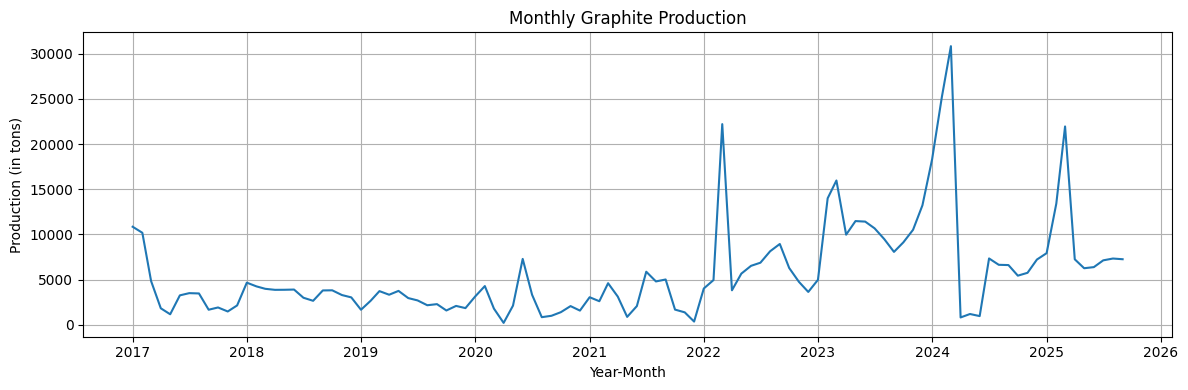

In [54]:
# Lineplot (production)

plt.figure(figsize=(12,4))
plt.plot(df_prod["Year-Month"],df_prod["graphite_prod_ton"])
plt.title("Monthly Graphite Production")
plt.xlabel("Year-Month")
plt.ylabel("Production (in tons)")
plt.grid(True)
plt.tight_layout()
plt.show()

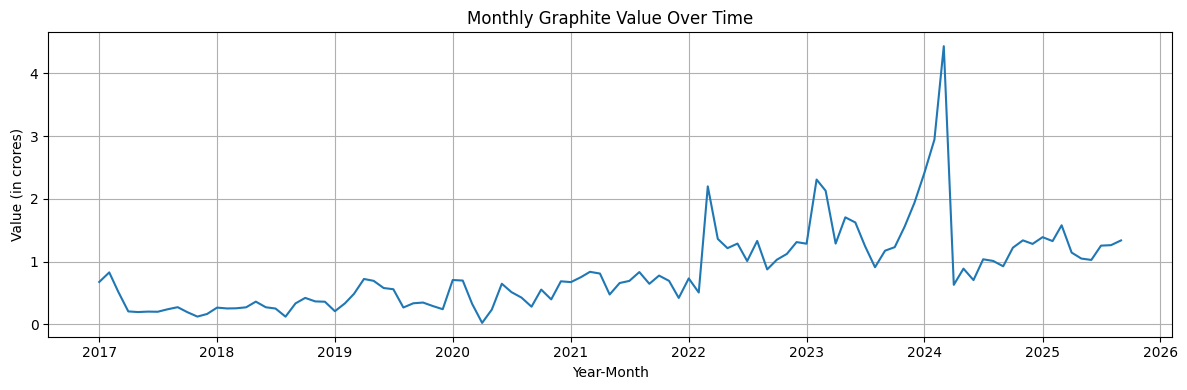

In [55]:
#LinePlot (Graphite Value in crores)

plt.figure(figsize=(12,4))
plt.plot(df_prod["Year-Month"],df_prod["graphite_value_c"])
plt.title("Monthly Graphite Value Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
df_exim.head()

Year-Month  export_in_crores  import_in_crores
0 2017-01-01             44.65             51.65
1 2017-02-01             37.54             55.56
2 2017-03-01             59.94             40.68
3 2017-04-01             51.46             74.06
4 2017-05-01             45.13             75.64

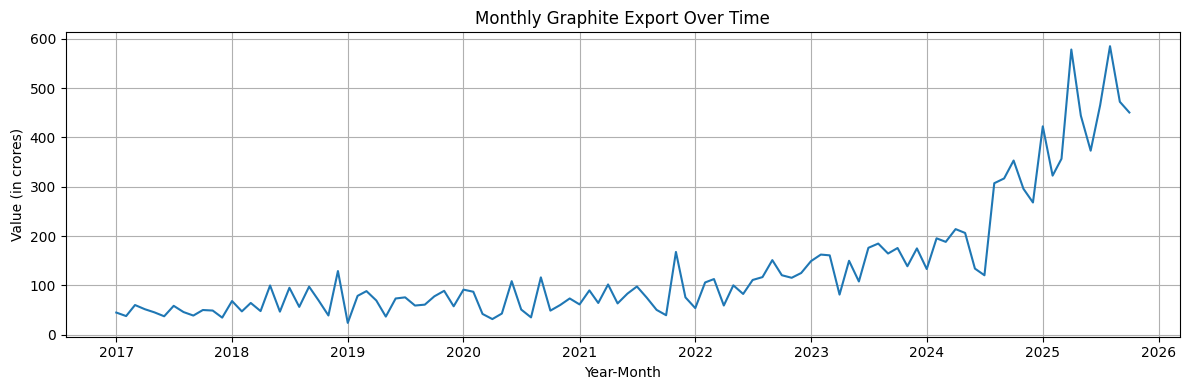

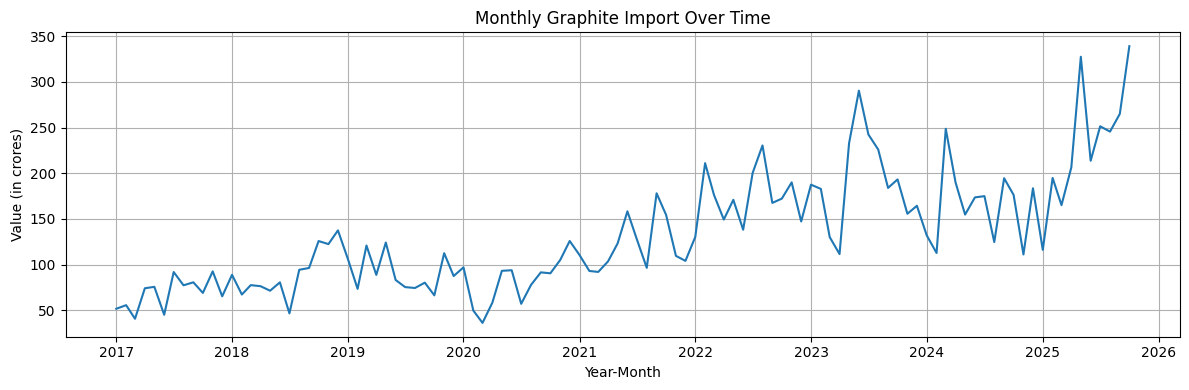

In [57]:
#LinePlot (Export)

plt.figure(figsize=(12,4))
plt.plot(df_exim["Year-Month"],df_exim["export_in_crores"])
plt.title("Monthly Graphite Export Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

#LinePlot (Import)

plt.figure(figsize=(12,4))
plt.plot(df_exim["Year-Month"],df_exim["import_in_crores"])
plt.title("Monthly Graphite Import Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

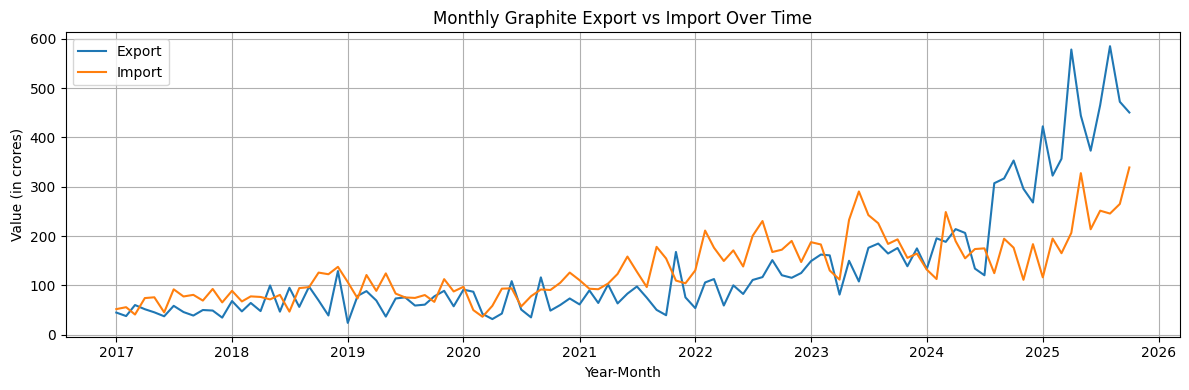

In [58]:
#LinePlot (Export vs Import)

plt.figure(figsize=(12,4))
plt.plot(df_exim["Year-Month"],df_exim["export_in_crores"],label="Export")
plt.plot(df_exim["Year-Month"],df_exim["import_in_crores"],label="Import")
plt.title("Monthly Graphite Export vs Import Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
# Overall Percentage of EXIM

total_export = df_exim["export_in_crores"].sum()
total_import = df_exim["import_in_crores"].sum()

export_pct = (total_export / (total_export + total_import)) * 100
import_pct = (total_import / (total_export + total_import)) * 100

print(f"Export: {export_pct:.2f} %\nImport : {import_pct:.2f} %")

Export: 50.22 %
Import : 49.78 %


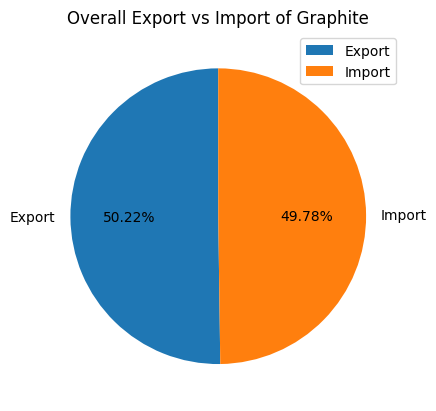

In [60]:
#Pie Chart (EXIM)

plt.pie([export_pct,import_pct],labels=["Export","Import"], autopct="%1.2f%%",startangle=90)
plt.title("Overall Export vs Import of Graphite")
plt.legend()
plt.show()

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("GRAPHITE IMPORT EXPORT DATA.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Preparing export data
export_df = df[["ds", "export"]].rename(columns={"export": "y"})
print(export_df)

            ds       y
0   2017-01-01   44.65
1   2017-02-01   37.54
2   2017-03-01   59.94
3   2017-04-01   51.46
4   2017-05-01   45.13
..         ...     ...
103 2025-08-01  585.33
104 2025-09-01  472.48
105 2025-10-01  450.72
106 2025-11-01     NaN
107 2025-12-01     NaN

[108 rows x 2 columns]


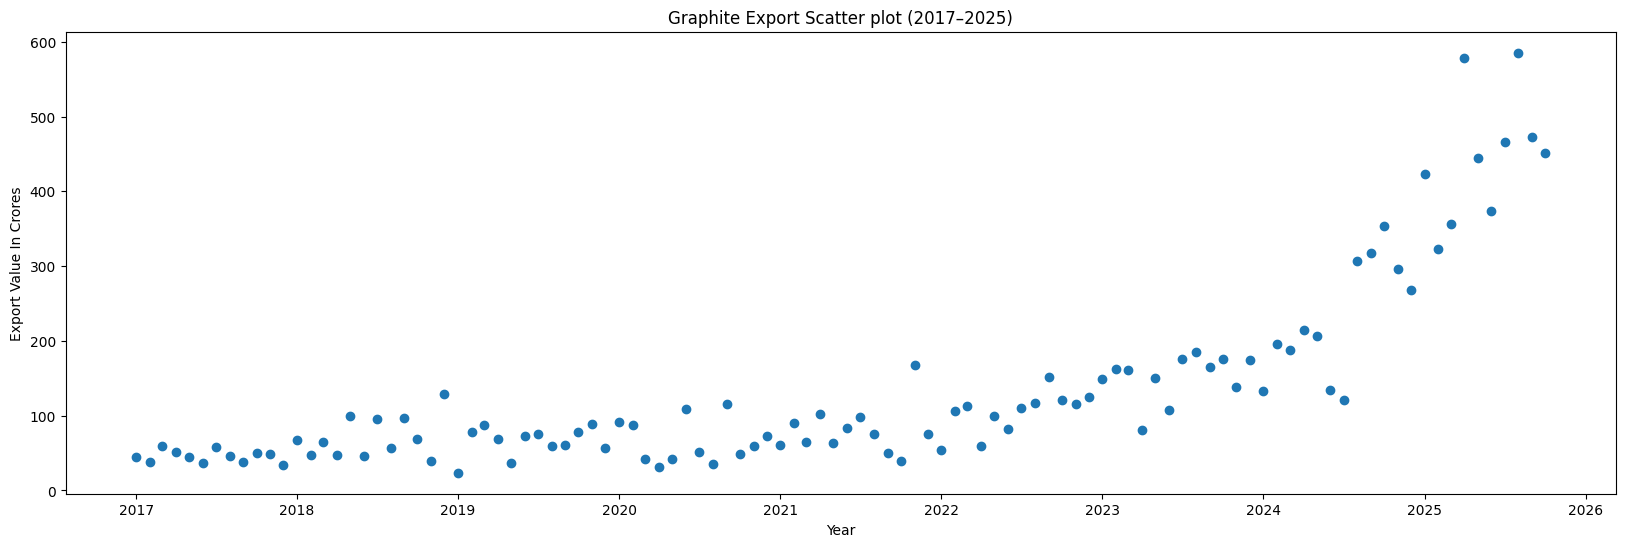

In [62]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(export_df["ds"],export_df["y"])
plt.title("Graphite Export Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.show()

In [63]:
# Prophet model

from prophet import Prophet

export_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

export_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)


export_model.fit(export_df) # Fit model

future_export = export_model.make_future_dataframe(periods=122, freq="ME") #dataframe from jan 2026 - dec 2031

export_forecast = export_model.predict(future_export) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
export_forecast_2026_2035 = export_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for export_data in export_forecast_2026_2035.to_dict("records"):
    print(export_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 446.63640534157145, 'yhat_lower': 392.3691903508606, 'yhat_upper': 504.13429472519255}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 448.04781108097876, 'yhat_lower': 393.7741958691846, 'yhat_upper': 502.786007737154}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 452.82453796004506, 'yhat_lower': 399.18727155098424, 'yhat_upper': 506.3827864389125}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 482.9504426209548, 'yhat_lower': 435.9061569051701, 'yhat_upper': 535.8445703908677}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 550.644907727458, 'yhat_lower': 497.62886102508867, 'yhat_upper': 609.8766764259422}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 521.7353444015972, 'yhat_lower': 465.066242628242, 'yhat_upper': 577.0486446519426}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 551.7576412600347, 'yhat_lower': 495.75452762398544, 'yhat_upper': 606.4655821483311}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 539.88841

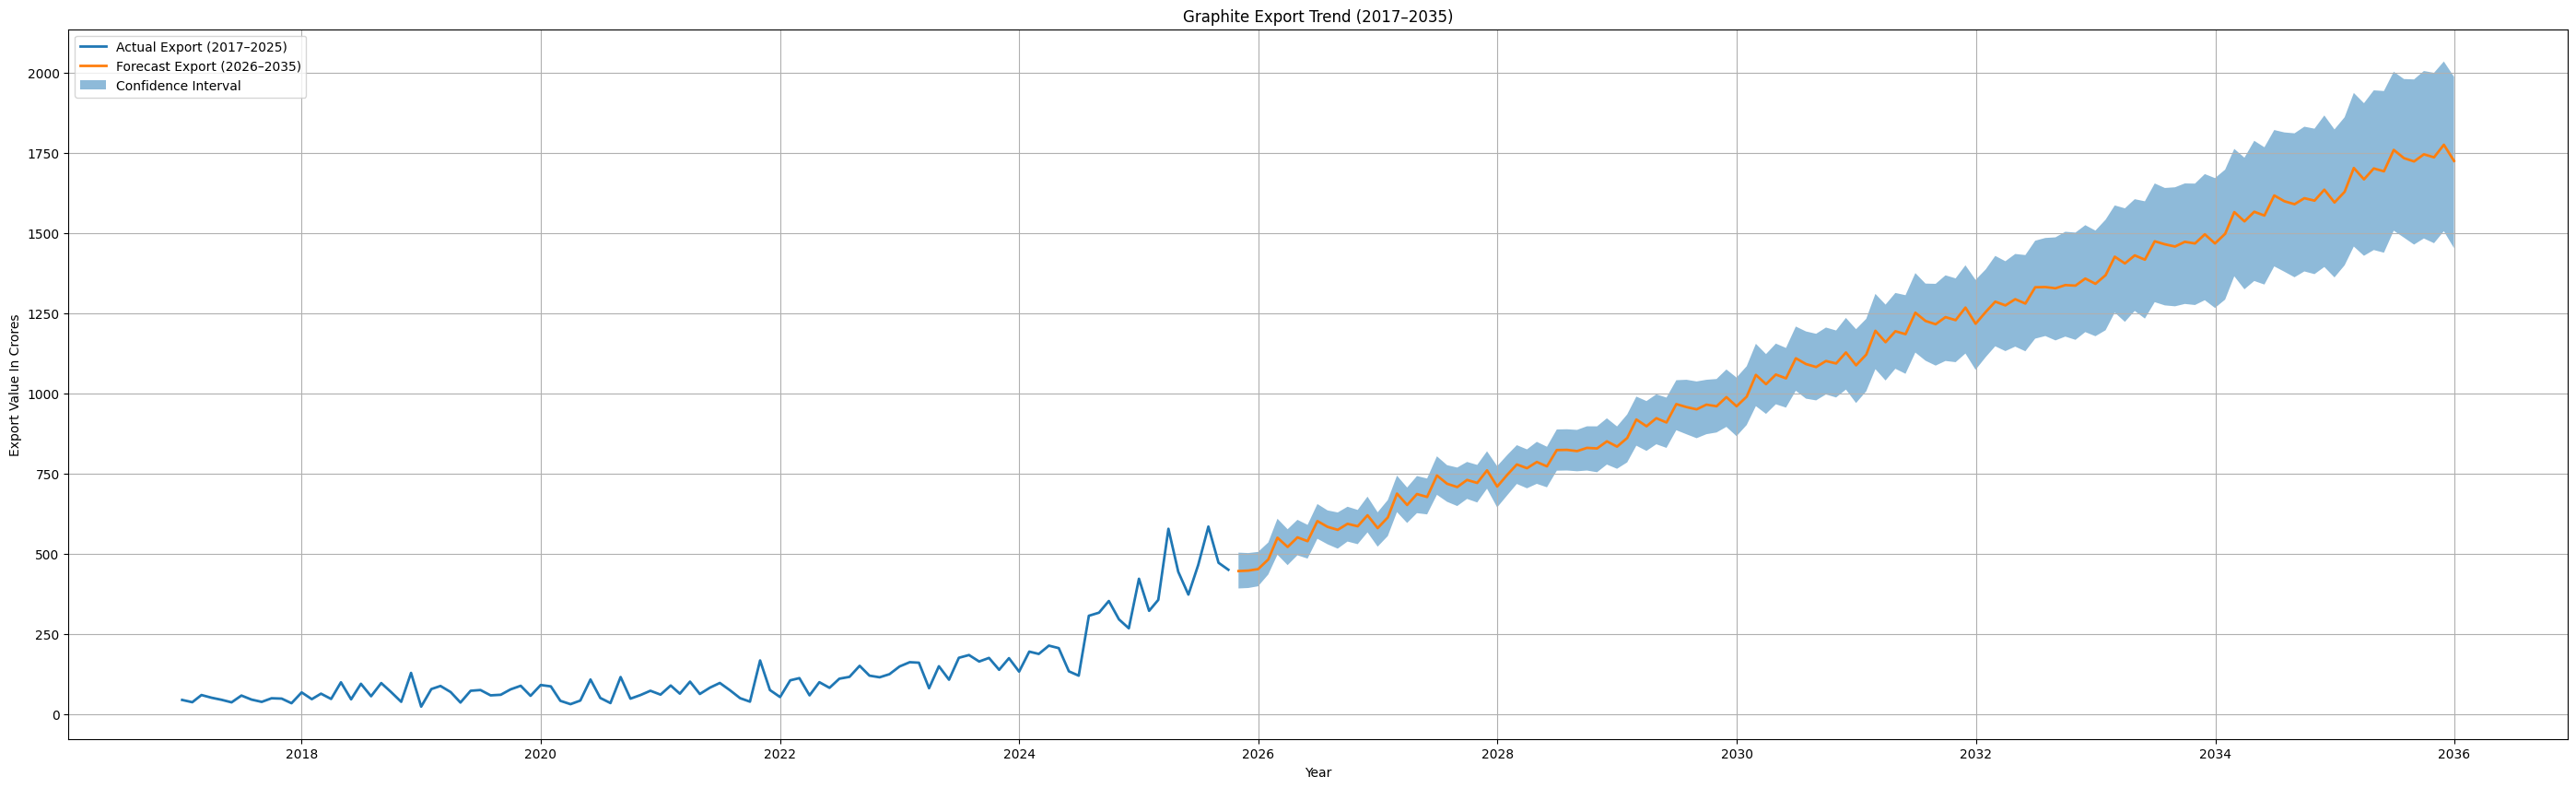

In [64]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat_lower"],
    export_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Graphite Export Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

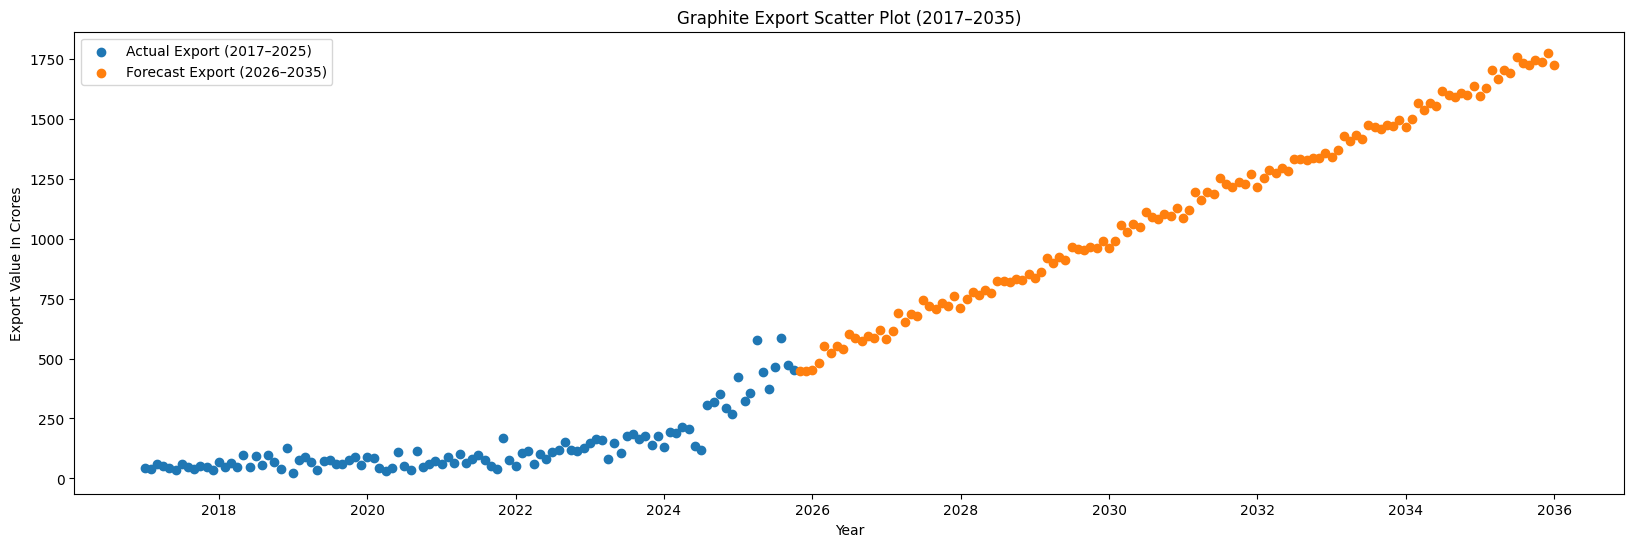

In [65]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)"
)

#future prediction graph
plt.scatter(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)"
)

# Meta Data
plt.title("Graphite Export Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()

plt.show()

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("GRAPHITE IMPORT EXPORT DATA.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Preparing import data
import_df = df[["ds", "import"]].rename(columns={"import": "y"})
print(import_df)

            ds       y
0   2017-01-01   51.65
1   2017-02-01   55.56
2   2017-03-01   40.68
3   2017-04-01   74.06
4   2017-05-01   75.64
..         ...     ...
103 2025-08-01  245.60
104 2025-09-01  265.09
105 2025-10-01  339.17
106 2025-11-01     NaN
107 2025-12-01     NaN

[108 rows x 2 columns]


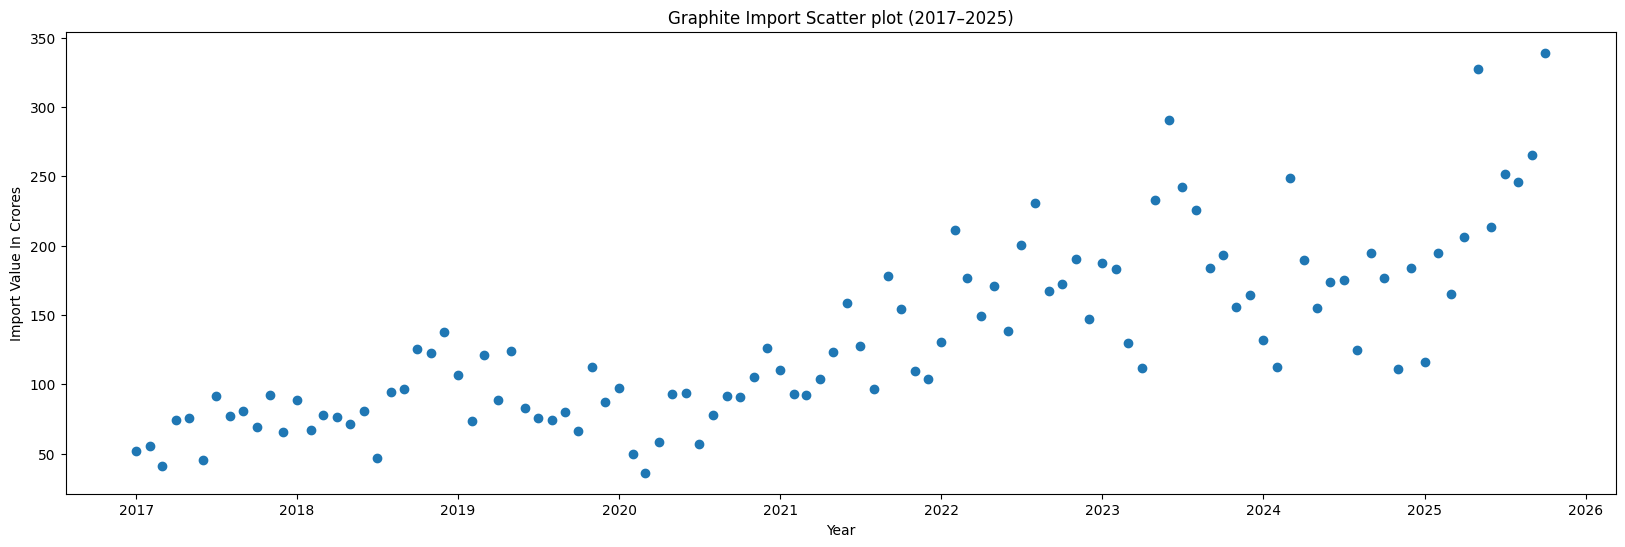

In [67]:
# Graph on import Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(import_df["ds"],import_df["y"])
plt.title("Graphite Import Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.show()

In [68]:
# Prophet model
from prophet import Prophet

import_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=30
)

import_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=7
)
 #adding curves in future data

import_model.fit(import_df) # Fit model

future_import = import_model.make_future_dataframe(periods=122, freq="ME") #dataframe from jan 2026 - dec 2031

import_forecast = import_model.predict(future_import) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
import_forecast_2026_2035 = import_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for import_data in import_forecast_2026_2035.to_dict("records"):
    print(import_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 209.6227320320718, 'yhat_lower': 165.51689245025938, 'yhat_upper': 255.73138324678743}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 210.6553253060066, 'yhat_lower': 161.40512966003482, 'yhat_upper': 254.35986967062635}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 242.40805769013934, 'yhat_lower': 193.7629271976678, 'yhat_upper': 287.44813555737466}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 216.17748313112432, 'yhat_lower': 172.37679842936316, 'yhat_upper': 265.17159743997394}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 233.27320305468533, 'yhat_lower': 189.21968365314476, 'yhat_upper': 280.69781087688284}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 250.85758355757255, 'yhat_lower': 202.20690613002313, 'yhat_upper': 297.74700480837413}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 272.5223886178979, 'yhat_lower': 223.6232320684994, 'yhat_upper': 322.2208366619001}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat'

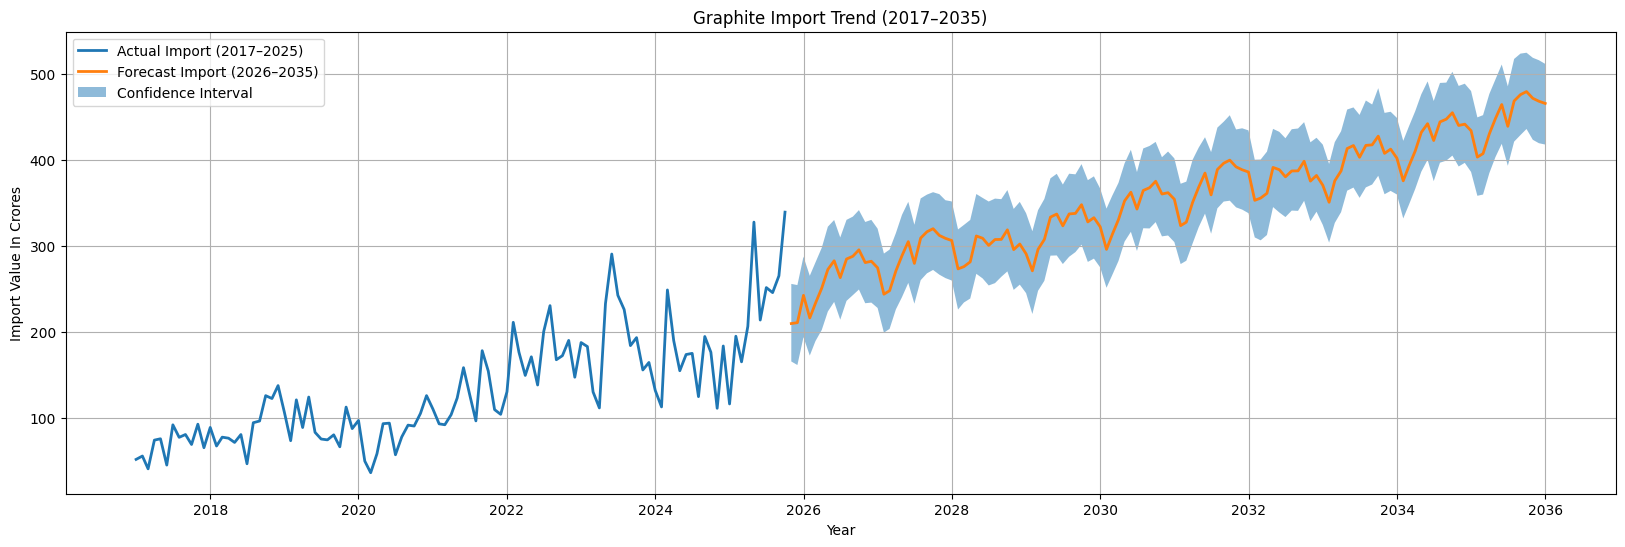

In [69]:
# Trend Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.plot(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    # linestyle="--",
    label="Forecast Import (2026–2035)",
    linewidth=2,
)
plt.fill_between(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat_lower"],
    import_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Graphite Import Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

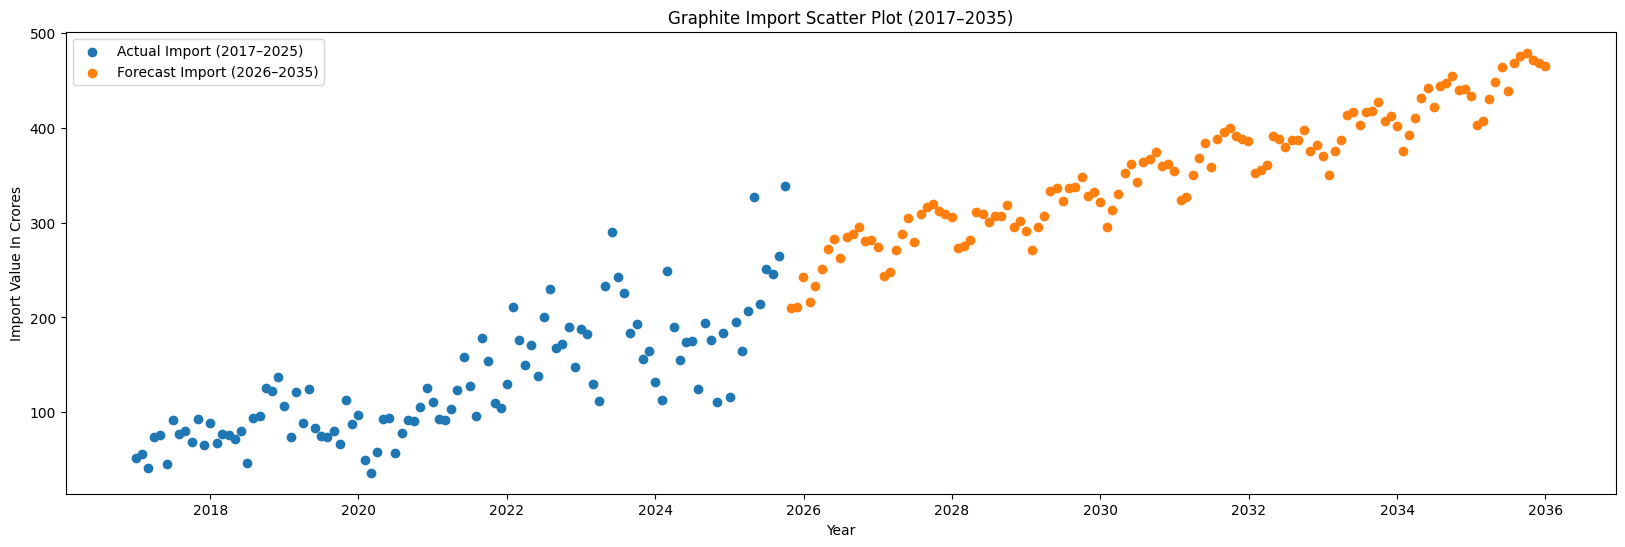

In [70]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)"
)

#future prediction graph
plt.scatter(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    label="Forecast Import (2026–2035)"
)


# Meta Data
plt.title("Graphite Import Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()

plt.show()

In [71]:
#Calculating And Plotting Trade Balance Graph On Export-import Data From 2017 - 2035
trade_balance_forecast = []

for i in range(len(export_forecast)):
    date = export_forecast.loc[i, 'ds']
    export_val = export_forecast.loc[i, 'yhat']
    import_val = import_forecast.loc[i, 'yhat']

    trade_balance_forecast.append(
        [date, export_val - import_val]
    )

trade_balance_forecast_df = pd.DataFrame(
    trade_balance_forecast,
    columns=['ds', 'trade_balance']
)

print(trade_balance_forecast_df)

            ds  trade_balance
0   2017-01-01      17.378678
1   2017-02-01       2.860884
2   2017-03-01      -2.490361
3   2017-04-01      15.915084
4   2017-05-01     -31.629235
..         ...            ...
225 2035-09-30    1267.263023
226 2035-10-31    1265.744174
227 2035-11-30    1308.316782
228 2035-12-31    1260.440612
229 2036-01-31    1330.261398

[230 rows x 2 columns]


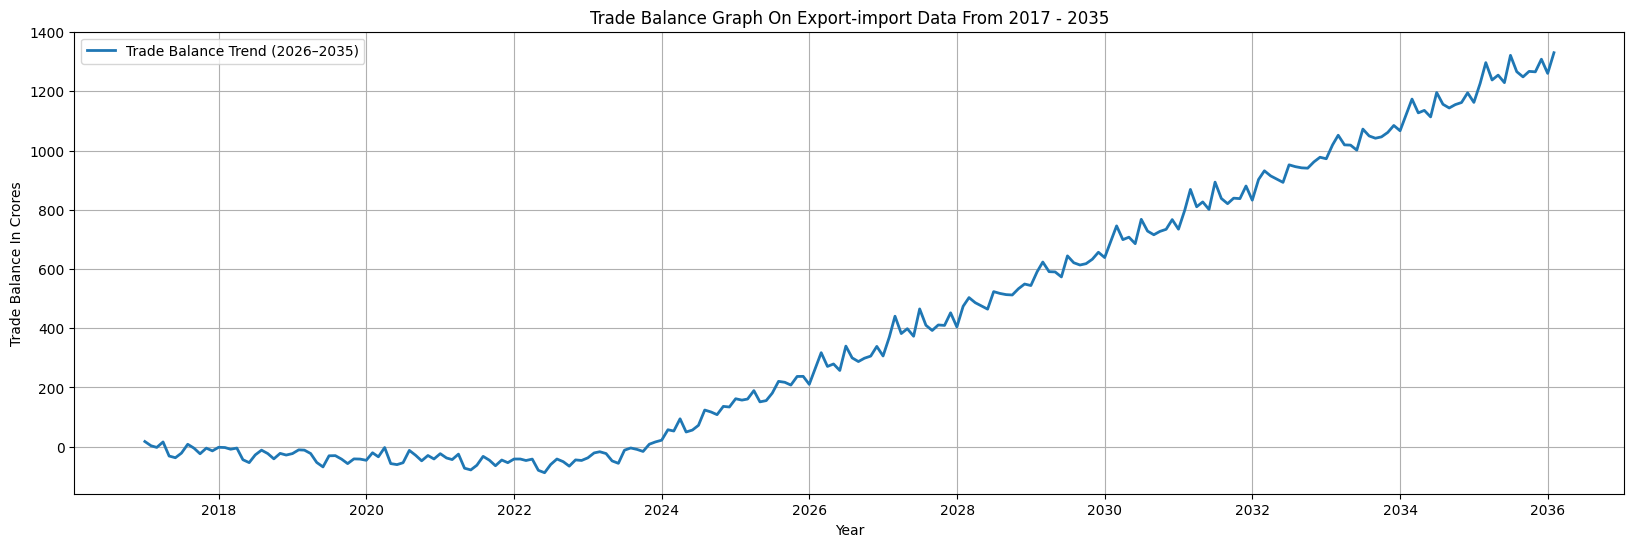

In [72]:
plt.figure(figsize=(20, 6))

plt.plot(trade_balance_forecast_df["ds"],trade_balance_forecast_df["trade_balance"] ,label="Trade Balance Trend (2026–2035)",
        linewidth=2)
plt.title("Trade Balance Graph On Export-import Data From 2017 - 2035")
plt.xlabel("Year")
plt.ylabel("Trade Balance In Crores")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
import pandas as pd;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt

df = pd.read_csv("GRAPHITE PRODUCTION AND VALUE DATA.csv")


df.columns = ["ds", "graphite_prod" , "graphite_value"] # seperatting columns
df = df.dropna(subset=["ds"])

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["graphite_prod"] = df["graphite_prod"].str.replace(",", "", regex=True).astype(float)

# Preparing data
graphite_prod = df[["ds", "graphite_prod"]].rename(columns={"graphite_prod": "y"})
print(graphite_prod)

            ds        y
0   2017-01-01  10854.0
1   2017-02-01  10186.0
2   2017-03-01   4841.0
3   2017-04-01   1834.0
4   2017-05-01   1172.0
..         ...      ...
111 2025-08-01   7338.0
112 2025-09-01   7261.0
113 2025-10-01      NaN
114 2025-11-01      NaN
115 2025-12-01      NaN

[108 rows x 2 columns]


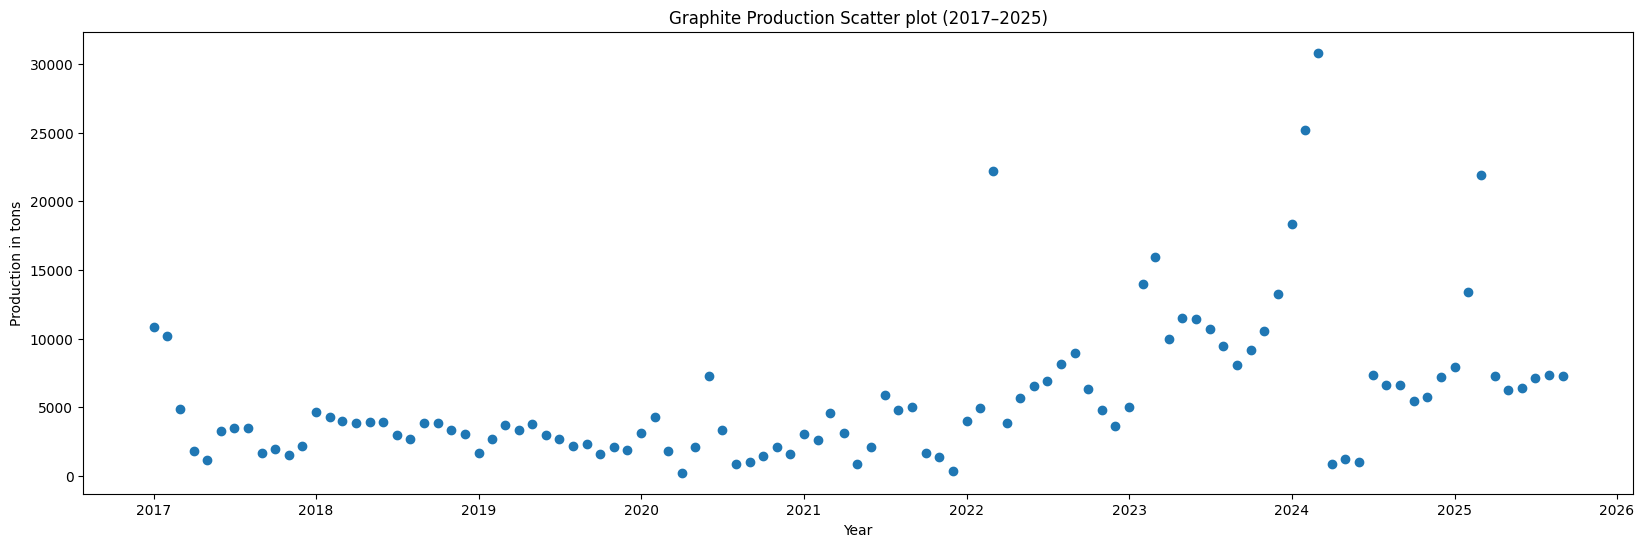

In [74]:
# Graph (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(graphite_prod["ds"],graphite_prod["y"])
plt.title("Graphite Production Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Production in tons")
plt.show()

In [75]:
# Prophet Model
from prophet import Prophet

graphite_prod_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.2
)

graphite_prod_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)

graphite_prod_model.fit(graphite_prod)

future_graphite_prod = graphite_prod_model.make_future_dataframe(
    periods=120,
    freq="MS"
)

graphite_prod_forecast = graphite_prod_model.predict(future_graphite_prod)

#filltering data
graphite_prod_forecast_2026_2035 = graphite_prod_forecast[
    graphite_prod_forecast["ds"] >= "2025-10-01"
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

#printing the future data
for data in graphite_prod_forecast_2026_2035.to_dict("records"): print(data)

{'ds': Timestamp('2025-10-01 00:00:00'), 'yhat': 8652.301952273405, 'yhat_lower': 4867.825518877409, 'yhat_upper': 12832.453532535694}
{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 8646.849507666484, 'yhat_lower': 4535.585730342635, 'yhat_upper': 12679.225955030983}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 8788.699688968052, 'yhat_lower': 4739.366659838837, 'yhat_upper': 12468.882423925807}
{'ds': Timestamp('2026-01-01 00:00:00'), 'yhat': 11778.474192634021, 'yhat_lower': 7781.690169316185, 'yhat_upper': 15950.523960507173}
{'ds': Timestamp('2026-02-01 00:00:00'), 'yhat': 13967.916924789328, 'yhat_lower': 9752.135278872624, 'yhat_upper': 18083.39678623934}
{'ds': Timestamp('2026-03-01 00:00:00'), 'yhat': 17394.070926373664, 'yhat_lower': 13354.027967793892, 'yhat_upper': 21316.339088886354}
{'ds': Timestamp('2026-04-01 00:00:00'), 'yhat': 10787.2582588653, 'yhat_lower': 6726.652276313326, 'yhat_upper': 14933.412334670944}
{'ds': Timestamp('2026-05-01 00:00:00'), 'yhat': 1133

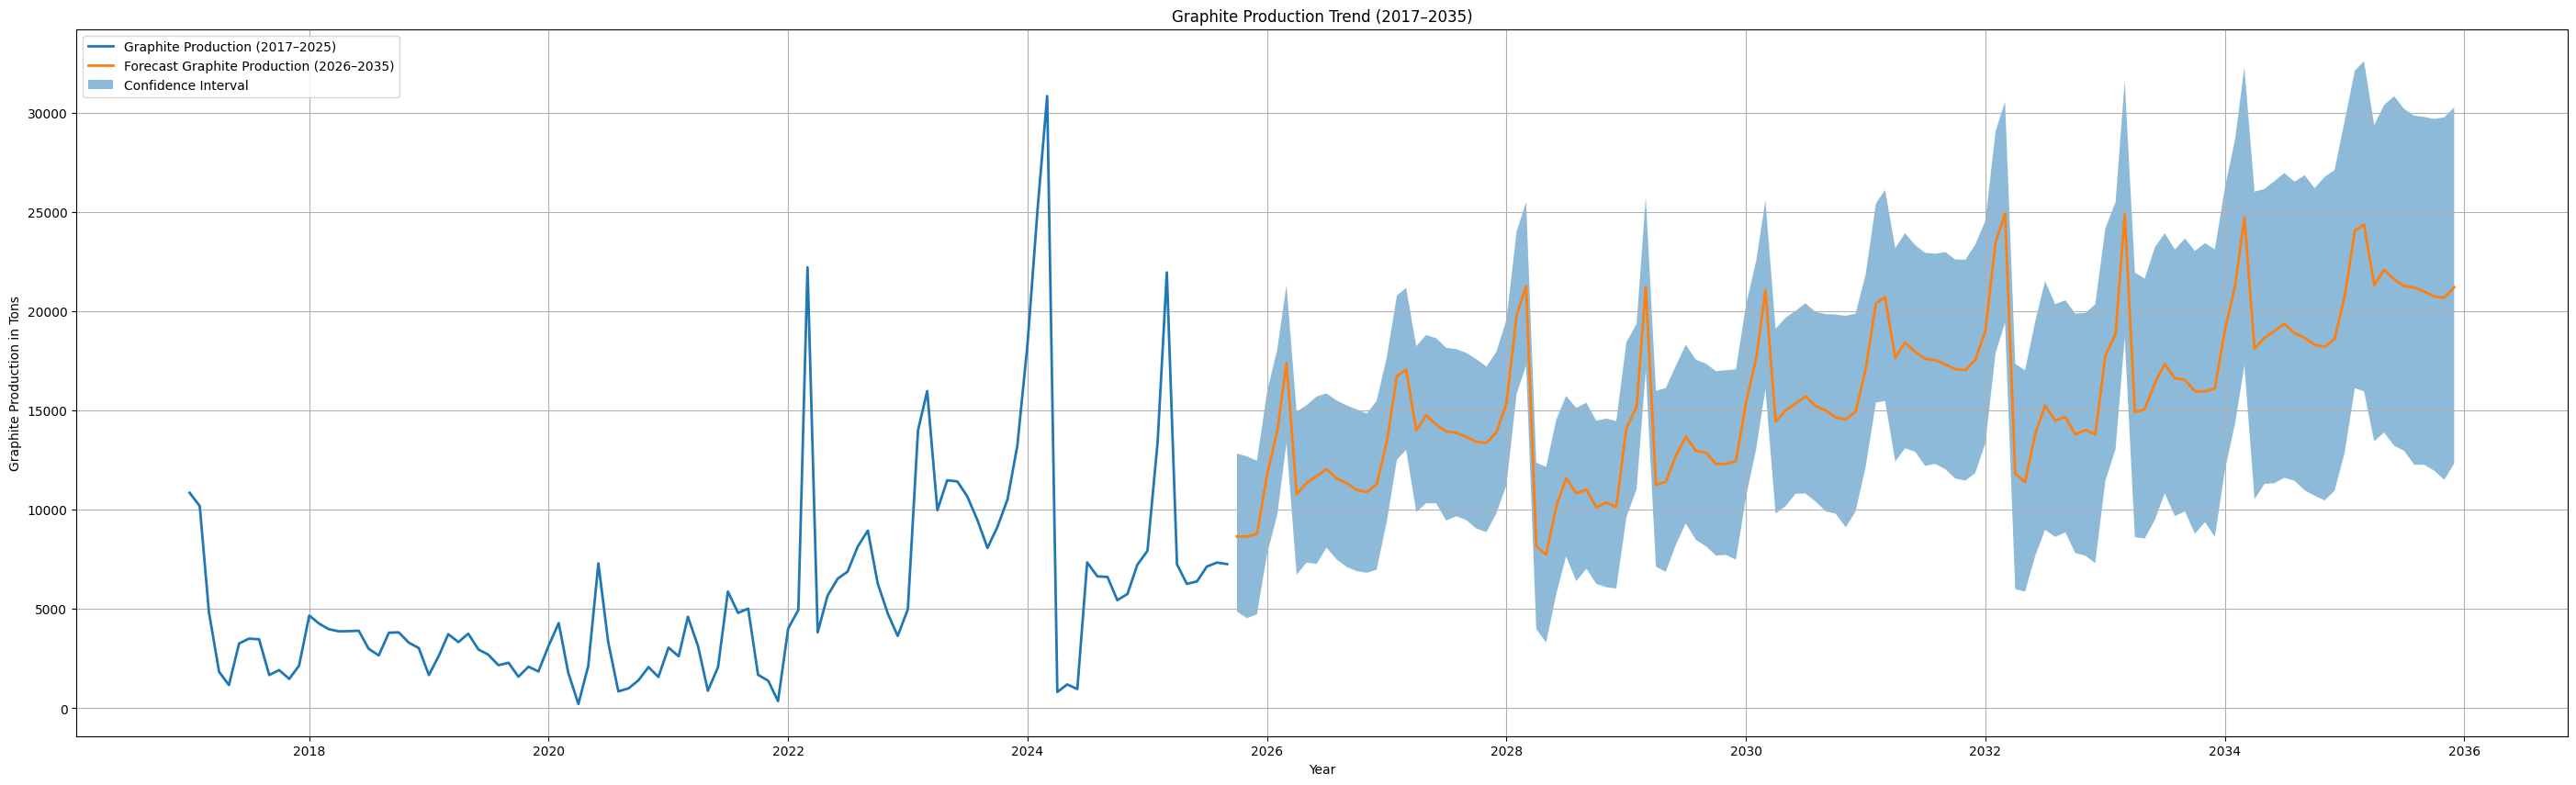

In [76]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    graphite_prod["ds"],
    graphite_prod["y"],
    label="Graphite Production (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    graphite_prod_forecast_2026_2035["ds"],
    graphite_prod_forecast_2026_2035["yhat"],
    label="Forecast Graphite Production (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    graphite_prod_forecast_2026_2035["ds"],
    graphite_prod_forecast_2026_2035["yhat_lower"],
    graphite_prod_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Graphite Production Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Graphite Production in Tons")
plt.legend()
plt.grid(True)

plt.show()

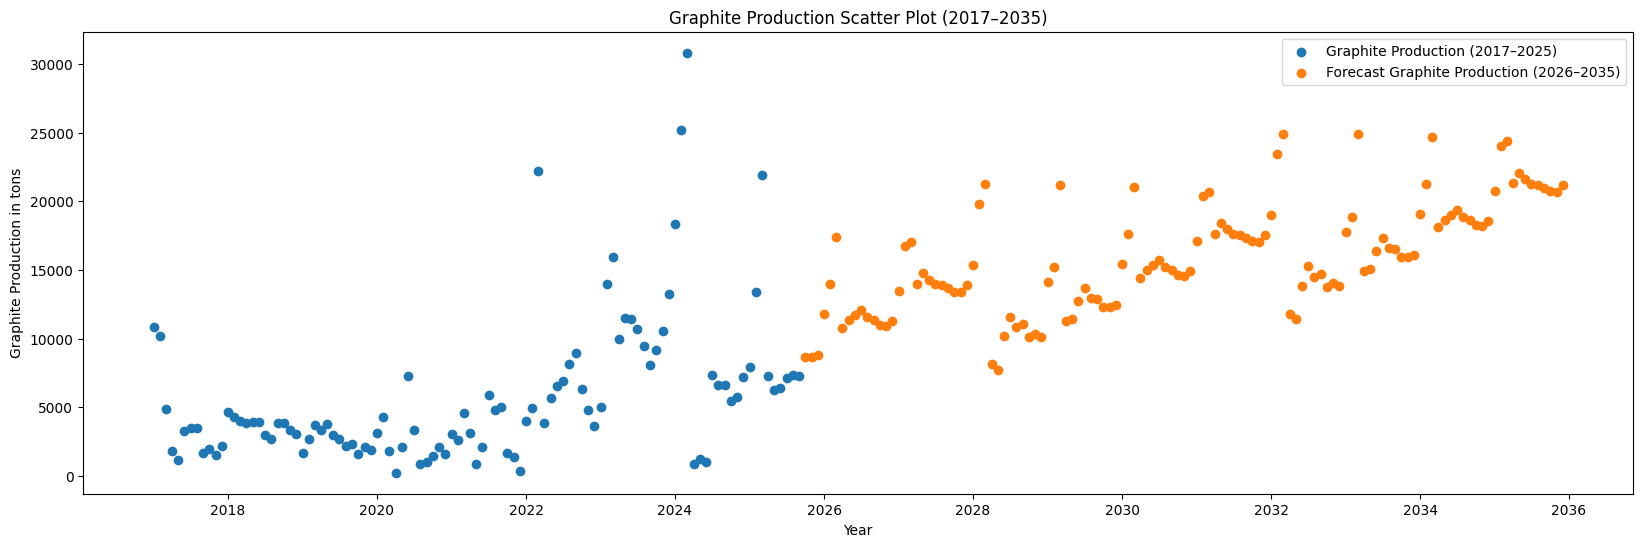

In [77]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))

#historical graph
plt.scatter(
    graphite_prod["ds"],
    graphite_prod["y"],
    label="Graphite Production (2017–2025)"
)

#future prediction graph
plt.scatter(
    graphite_prod_forecast_2026_2035["ds"],
    graphite_prod_forecast_2026_2035["yhat"],
    label="Forecast Graphite Production (2026–2035)"
)


# Meta Data
plt.title("Graphite Production Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Graphite Production in tons")
plt.legend()

plt.show()

In [78]:
import pandas as pd;
import matplotlib.pyplot as plt

df = pd.read_csv("GRAPHITE PRODUCTION AND VALUE DATA.csv")


df.columns = ["ds", "graphite_prod" , "graphite_value"] # seperatting columns
df = df.dropna(subset=["ds"])

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Removing commas and converting to float
df["graphite_value"] = df["graphite_value"].str.replace(",", "", regex=True).astype(float)

# Preparing data
graphite_value = df[["ds", "graphite_value"]].rename(columns={"graphite_value": "y"})
print(graphite_value)

            ds        y
0   2017-01-01   6739.0
1   2017-02-01   8264.0
2   2017-03-01   5168.0
3   2017-04-01   2043.0
4   2017-05-01   1942.0
..         ...      ...
111 2025-08-01  12608.0
112 2025-09-01  13364.0
113 2025-10-01      NaN
114 2025-11-01      NaN
115 2025-12-01      NaN

[108 rows x 2 columns]


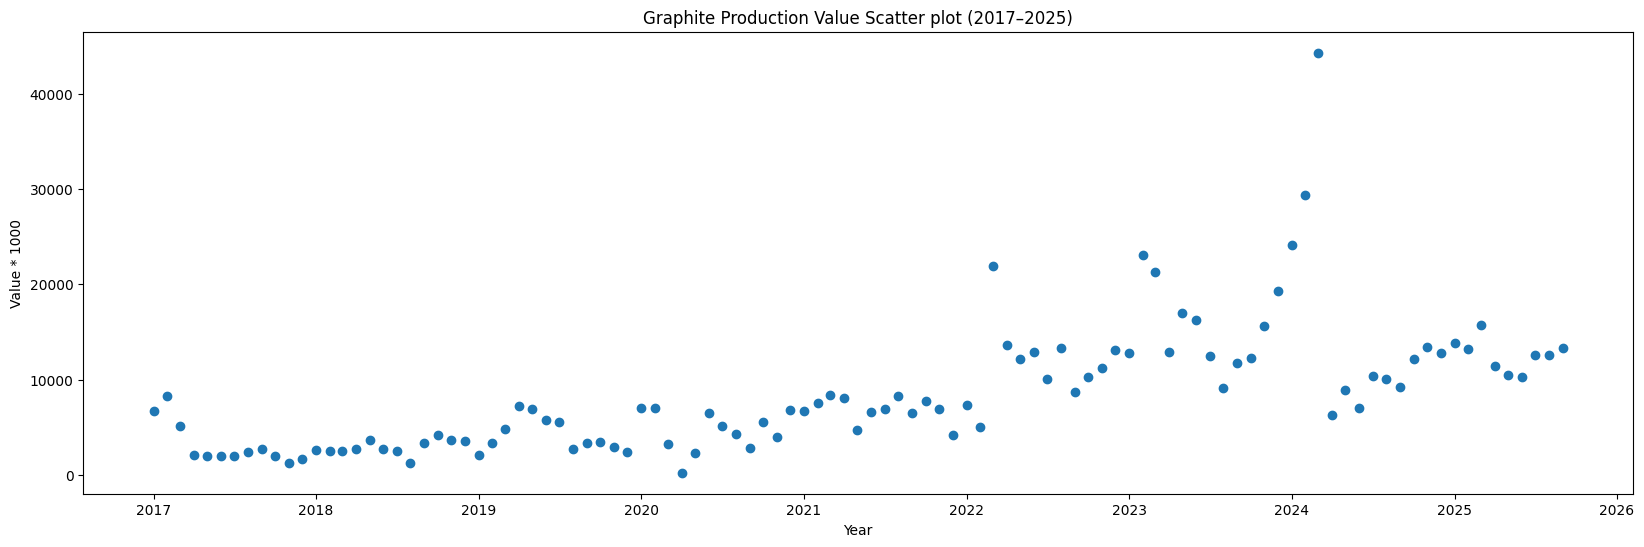

In [79]:
# Graph on Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(graphite_value["ds"],graphite_value["y"])
plt.title("Graphite Production Value Scatter plot (2017–2025)")
plt.xlabel("Year")
plt.ylabel("Value * 1000")
plt.show()

In [80]:
# Prophet Model
from prophet import Prophet

graphite_value_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.2
)

graphite_value_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=5
)

graphite_value_model.fit(graphite_value)

future_graphite_value = graphite_value_model.make_future_dataframe(
    periods=120,
    freq="MS"
)

graphite_value_forecast = graphite_value_model.predict(future_graphite_value)

#filltering data
graphite_value_forecast_2026_2035 = graphite_value_forecast[
    graphite_value_forecast["ds"] >= "2025-10-01"
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

#printing the future data
for data in graphite_value_forecast_2026_2035.to_dict("records"): print(data)

{'ds': Timestamp('2025-10-01 00:00:00'), 'yhat': 12818.808148690541, 'yhat_lower': 8703.149433041528, 'yhat_upper': 17284.424522447138}
{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 12653.491963319715, 'yhat_lower': 8274.511245391082, 'yhat_upper': 16986.05047579923}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 12927.617782665486, 'yhat_lower': 8510.065848006872, 'yhat_upper': 17095.908918303954}
{'ds': Timestamp('2026-01-01 00:00:00'), 'yhat': 14854.596844557182, 'yhat_lower': 10639.376607864015, 'yhat_upper': 19173.162198525803}
{'ds': Timestamp('2026-02-01 00:00:00'), 'yhat': 16169.63345220733, 'yhat_lower': 11865.138283036256, 'yhat_upper': 20698.173812465702}
{'ds': Timestamp('2026-03-01 00:00:00'), 'yhat': 18517.732974740786, 'yhat_lower': 14148.474086171167, 'yhat_upper': 23240.662838270364}
{'ds': Timestamp('2026-04-01 00:00:00'), 'yhat': 13996.874865901425, 'yhat_lower': 9771.073170996626, 'yhat_upper': 18631.532781019083}
{'ds': Timestamp('2026-05-01 00:00:00'), 'yhat'

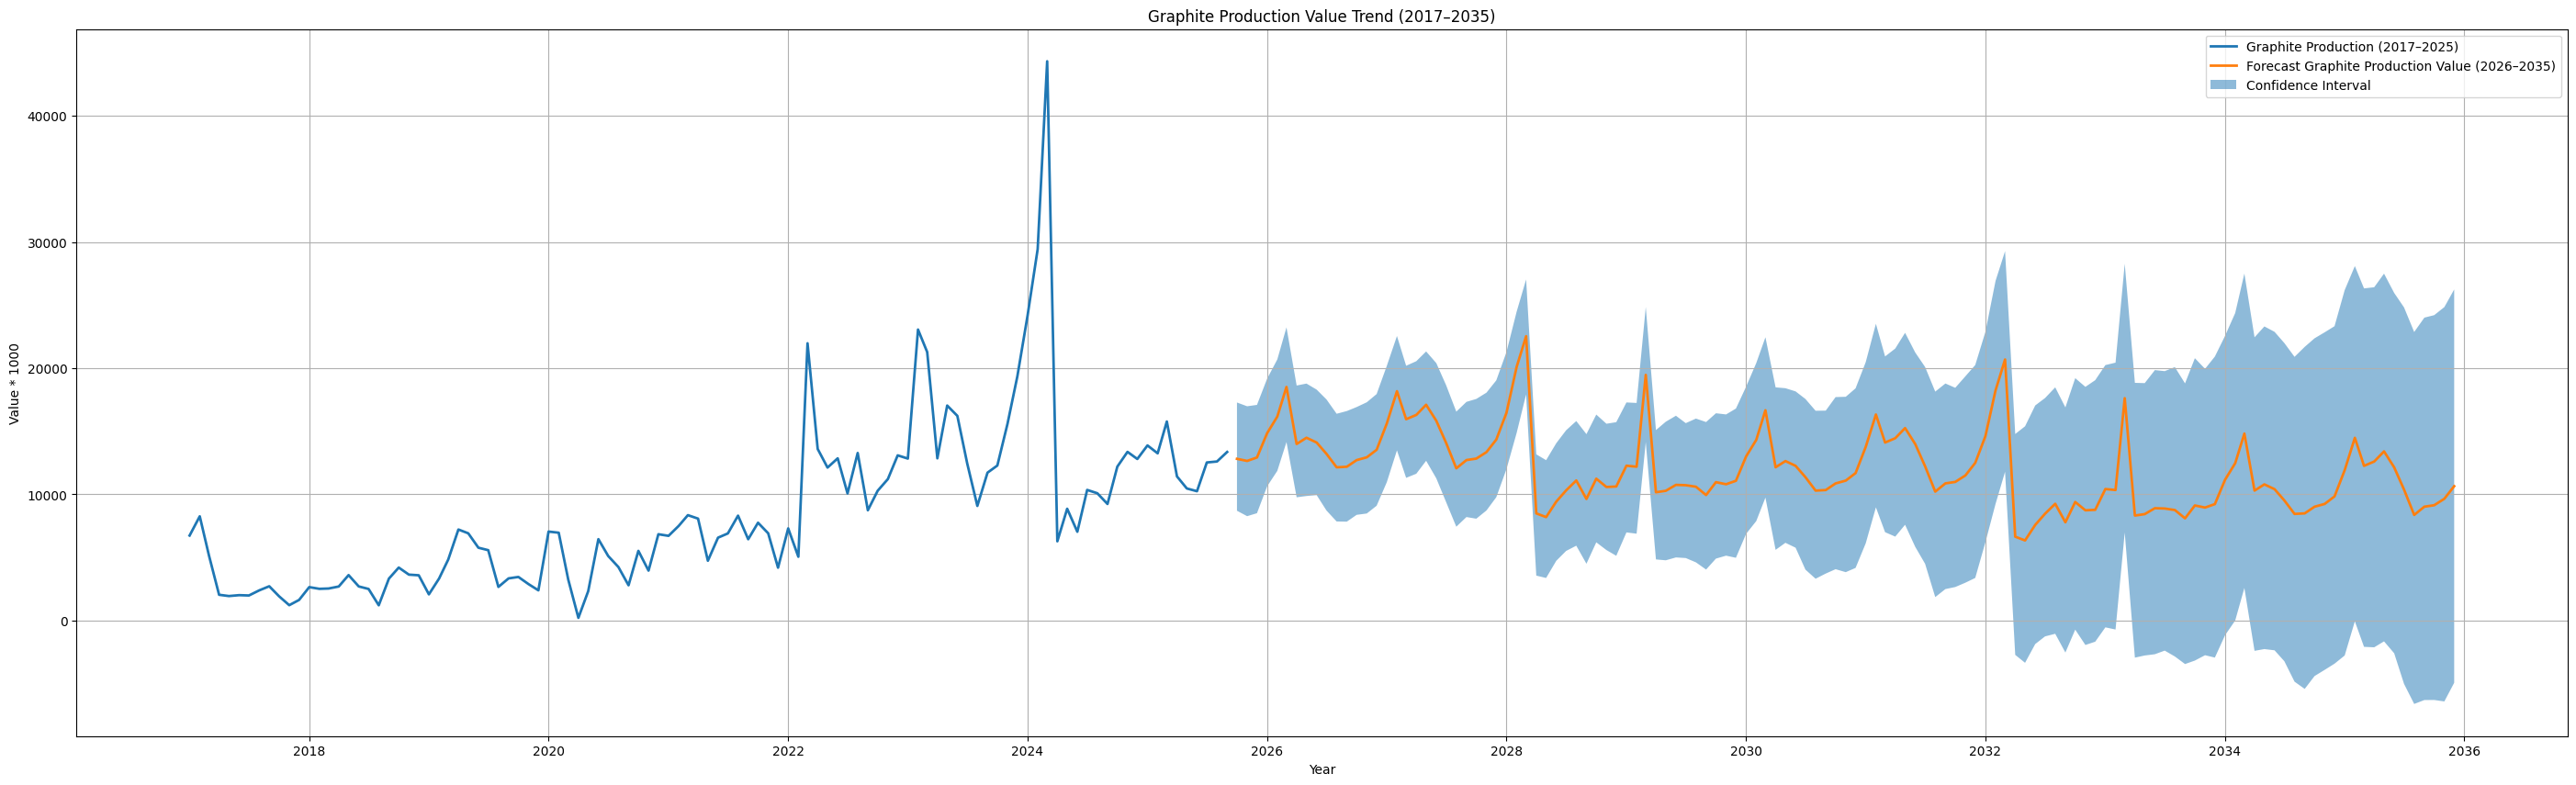

In [81]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(35, 10))

#historical graph
plt.plot(
    graphite_value["ds"],
    graphite_value["y"],
    label="Graphite Production (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    graphite_value_forecast_2026_2035["ds"],
    graphite_value_forecast_2026_2035["yhat"],
    label="Forecast Graphite Production Value (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    graphite_value_forecast_2026_2035["ds"],
    graphite_value_forecast_2026_2035["yhat_lower"],
    graphite_value_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Graphite Production Value Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Value * 1000")
plt.legend()
plt.grid(True)

plt.show()

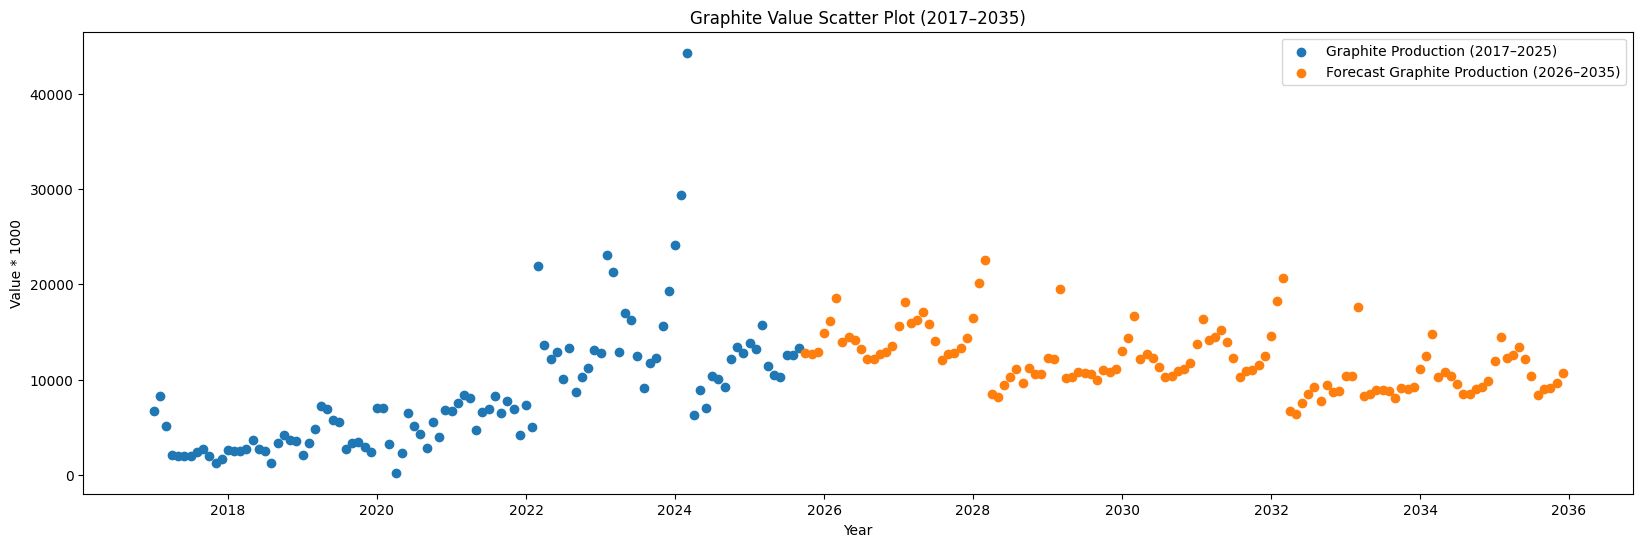

In [82]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))

#historical graph
plt.scatter(
    graphite_value["ds"],
    graphite_value["y"],
    label="Graphite Production (2017–2025)"
)

#future prediction graph
plt.scatter(
    graphite_value_forecast_2026_2035["ds"],
    graphite_value_forecast_2026_2035["yhat"],
    label="Forecast Graphite Production (2026–2035)"
)


# Meta Data
plt.title("Graphite Value Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Value * 1000")
plt.legend()

plt.show()

### Graphite Insights

- Graphite trade shows near parity between exports and imports.
- Rising imports alongside exports indicate quality differentiation.
- India likely exports lower-grade graphite while importing battery-grade material.

Graphite presents a near-term opportunity for import substitution with improved processing capacity.


### LITHIUM ELECTRODES ANALYSIS

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

try:
    df = pd.read_excel("Lithium_Electrodes_EXIM.xlsx")
except:
    print("Error reading file")

df.head()
df.info()
df.rename(columns={"YEAR-MONTH":"Year-Month","Export In Crores":"export_in_crores","Import In Crores":"import_in_crores"},inplace=True)
df["Year-Month"] = pd.to_datetime(df["Year-Month"]).dt.normalize()
df.info()

#Finding missing values

df[df.isnull().any(axis=1)]
# Dropping missing value rows so as to not disrupt time-series analysis
df.dropna(inplace=True)
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR-MONTH        108 non-null    object 
 1   Export In Crores  106 non-null    float64
 2   Import In Crores  106 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year-Month        108 non-null    datetime64[ns]
 1   export_in_crores  106 non-null    float64       
 2   import_in_crores  106 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.7 KB


Year-Month  export_in_crores  import_in_crores
101 2025-06-01             71.23            146.22
102 2025-07-01             78.14            139.32
103 2025-08-01             71.69            168.97
104 2025-09-01             80.64            137.37
105 2025-10-01             57.42            131.32

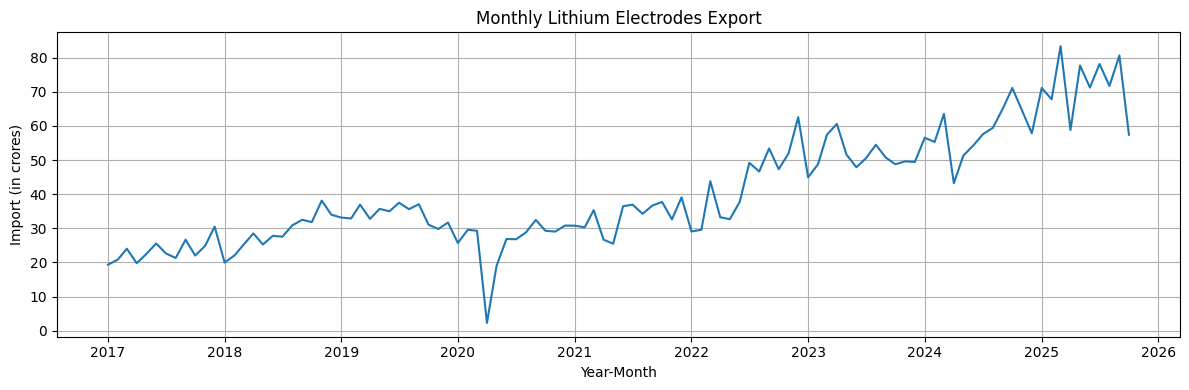

In [84]:
# LinePlot (export)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["export_in_crores"])
plt.title("Monthly Lithium Electrodes Export")
plt.xlabel("Year-Month")
plt.ylabel("Import (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

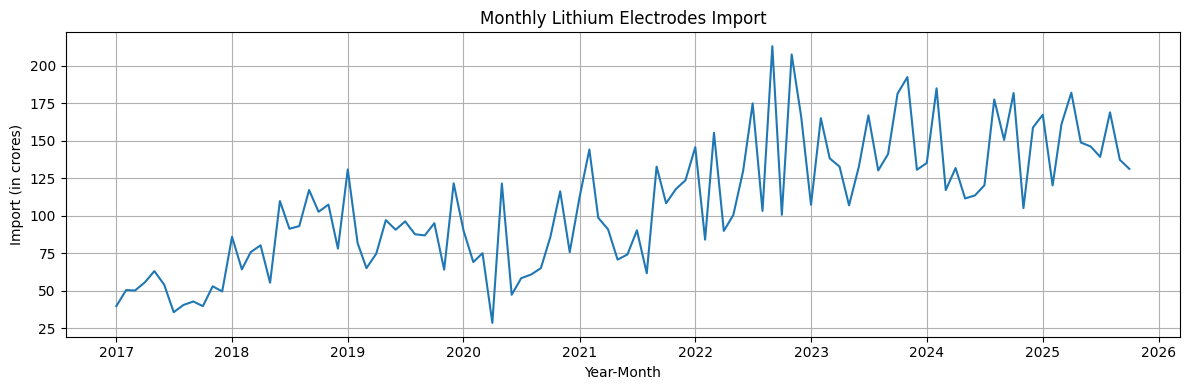

In [85]:
# LinePlot (import)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["import_in_crores"])
plt.title("Monthly Lithium Electrodes Import")
plt.xlabel("Year-Month")
plt.ylabel("Import (in crores)")
plt.grid(True)
plt.tight_layout()
plt.show()

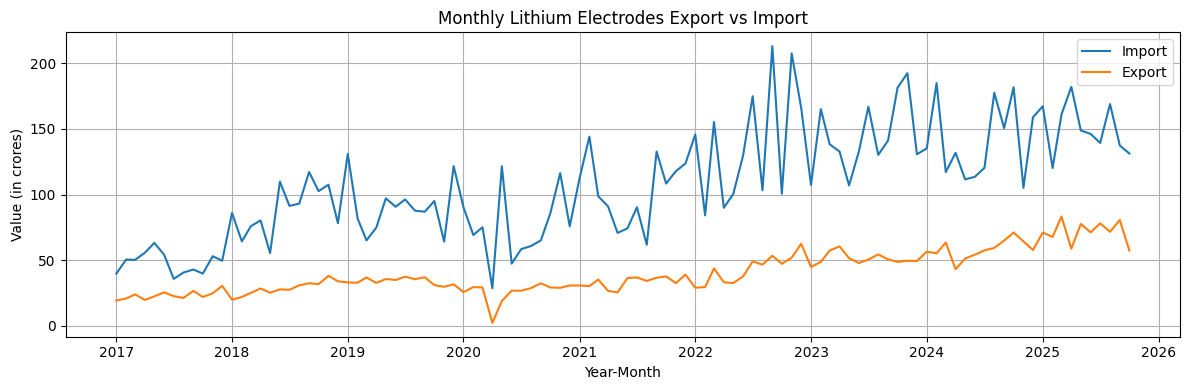

In [86]:
#LinePlot (Export vs Import)

plt.figure(figsize=(12,4))
plt.plot(df["Year-Month"],df["import_in_crores"],label="Import")
plt.plot(df["Year-Month"],df["export_in_crores"],label="Export")
plt.title("Monthly Lithium Electrodes Export vs Import")
plt.xlabel("Year-Month")
plt.ylabel("Value (in crores)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# Overall Percentage of EXIM

total_export = df["export_in_crores"].sum()
total_import = df["import_in_crores"].sum()

export_pct = (total_export / (total_export + total_import)) * 100
import_pct = (total_import / (total_export + total_import)) * 100

print(f"Export: {export_pct:.2f} %\nImport : {import_pct:.2f} %")

Export: 27.29 %
Import : 72.71 %


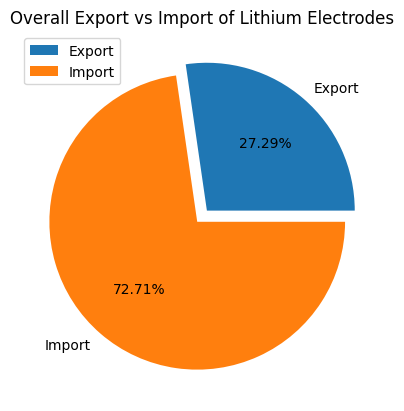

In [88]:
#Pie Chart (EXIM)

plt.pie([export_pct,import_pct],labels=["Export","Import"], autopct="%1.2f%%", explode=(0.05,0.05))
plt.title("Overall Export vs Import of Lithium Electrodes")
plt.legend()
plt.show()

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("LITHIUM-ELECTRODES-EXPORT-IMPORT-DATA.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Preparing export data
export_df = df[["ds", "export"]].rename(columns={"export": "y"})
print(export_df)


            ds      y
0   2017-01-01  19.36
1   2017-02-01  20.84
2   2017-03-01  24.04
3   2017-04-01  19.79
4   2017-05-01  22.48
..         ...    ...
103 2025-08-01  71.69
104 2025-09-01  80.64
105 2025-10-01  57.42
106 2025-11-01    NaN
107 2025-12-01    NaN

[108 rows x 2 columns]


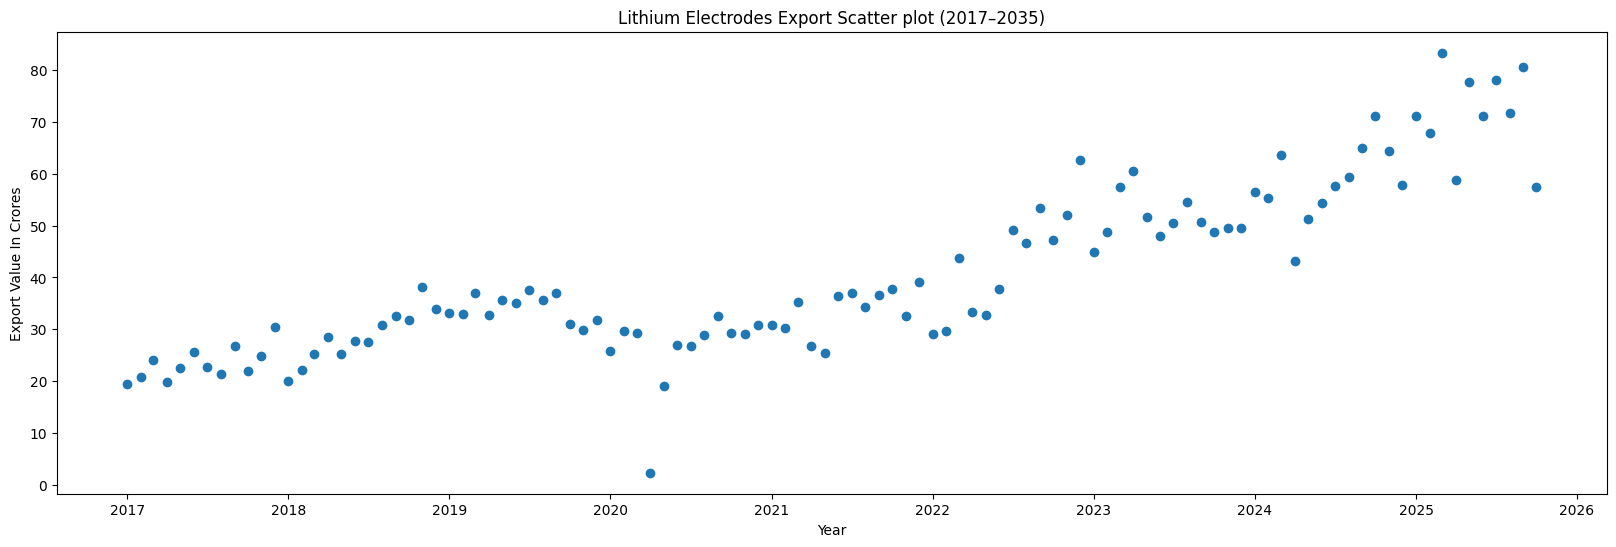

In [90]:
# Graph on Export Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(export_df["ds"],export_df["y"])
plt.title("Lithium Electrodes Export Scatter plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.show()

In [91]:
# Prophet model

from prophet import Prophet

export_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

export_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=3
)


export_model.fit(export_df) # Fit model

future_export = export_model.make_future_dataframe(periods=122, freq="M") #dataframe from jan 2026 - dec 2031

export_forecast = export_model.predict(future_export) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
export_forecast_2026_2035 = export_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for export_data in export_forecast_2026_2035.to_dict("records"):
    print(export_data)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 73.6155658871282, 'yhat_lower': 67.07648116942548, 'yhat_upper': 79.9302896973756}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 75.65291914746749, 'yhat_lower': 69.50464279258102, 'yhat_upper': 81.65691310198845}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 76.52177949184937, 'yhat_lower': 70.06838227048664, 'yhat_upper': 83.43344502795549}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 76.8037289702983, 'yhat_lower': 70.34810920378347, 'yhat_upper': 82.85434979697821}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 89.59006009780467, 'yhat_lower': 83.39464782113285, 'yhat_upper': 95.95366576059192}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 106.3755286695385, 'yhat_lower': 99.95611599061473, 'yhat_upper': 112.36124668215916}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 89.37237790921448, 'yhat_lower': 83.60367777842244, 'yhat_upper': 95.31701296884941}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 86.825605545171

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


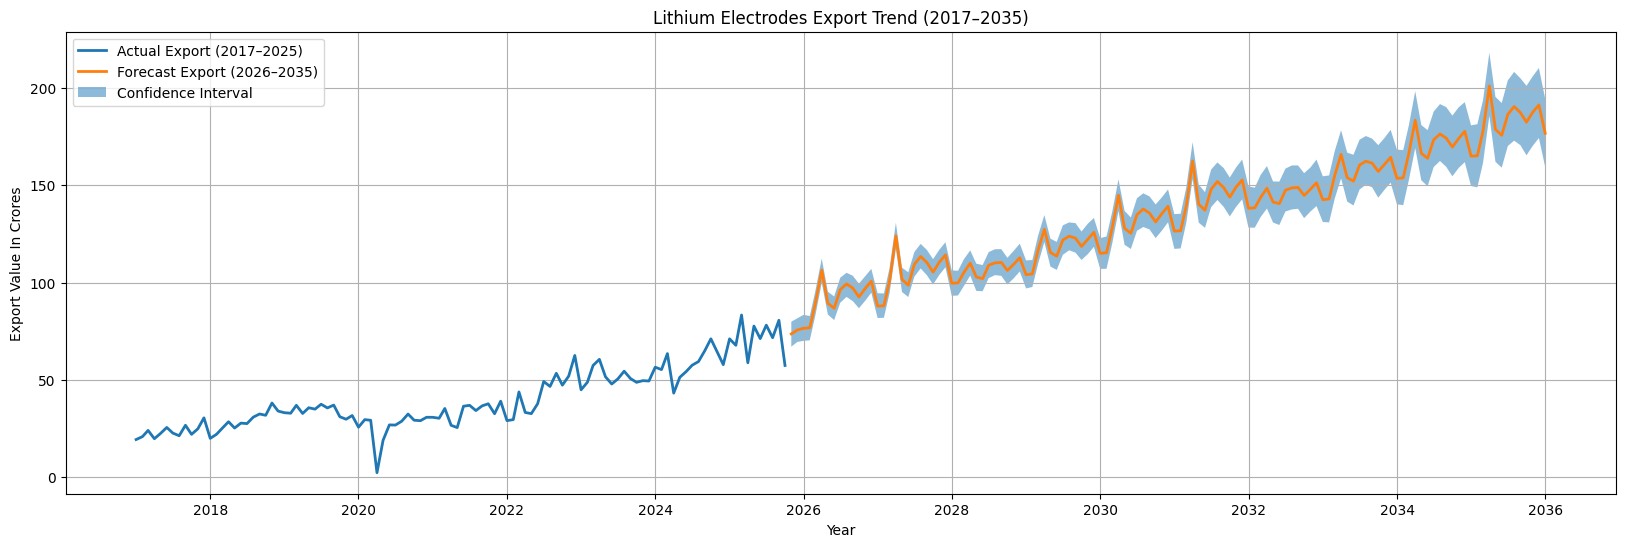

In [92]:
# Trend Graph for Data from 2017 - 2031

plt.figure(figsize=(20, 6))

#historical graph
plt.plot(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)",
    linewidth=2,
)

plt.fill_between(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat_lower"],
    export_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Lithium Electrodes Export Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

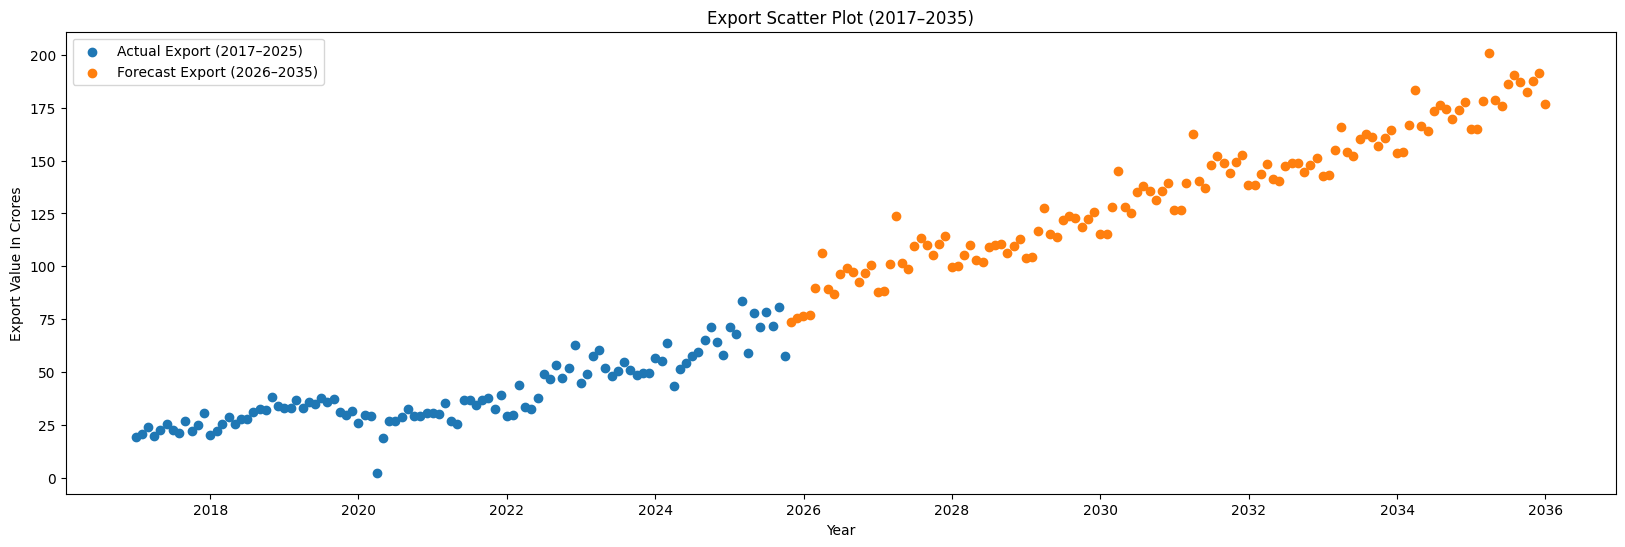

In [93]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    export_df["ds"],
    export_df["y"],
    label="Actual Export (2017–2025)"
)

#future prediction graph
plt.scatter(
    export_forecast_2026_2035["ds"],
    export_forecast_2026_2035["yhat"],
    label="Forecast Export (2026–2035)"
)


# Meta Data
plt.title("Export Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Export Value In Crores")
plt.legend()

plt.show()

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset
df = pd.read_csv("LITHIUM-ELECTRODES-EXPORT-IMPORT-DATA.csv")

df.columns = ["ds", "export", "import"] # seperatting columns

# Converting year-month to datetime
df["ds"] = pd.to_datetime(df["ds"])

# Preparing import data
import_df = df[["ds", "import"]].rename(columns={"import": "y"})
print(import_df)

            ds       y
0   2017-01-01   39.82
1   2017-02-01   50.57
2   2017-03-01   50.28
3   2017-04-01   55.71
4   2017-05-01   63.20
..         ...     ...
103 2025-08-01  168.97
104 2025-09-01  137.37
105 2025-10-01  131.32
106 2025-11-01     NaN
107 2025-12-01     NaN

[108 rows x 2 columns]


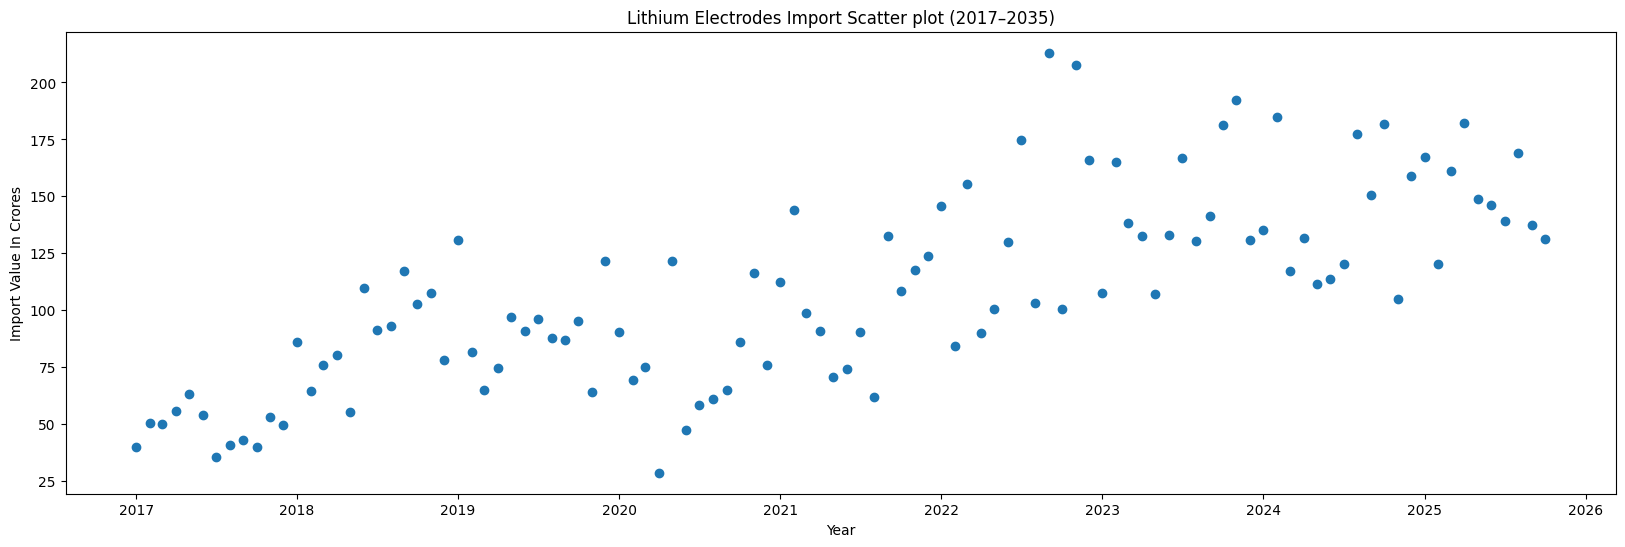

In [95]:
# Graph on import Data (2017 - 2025)
plt.figure(figsize=(20, 6))
plt.scatter(import_df["ds"],import_df["y"])
plt.title("Lithium Electrodes Import Scatter plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.show()

In [96]:
# Prophet model
from prophet import Prophet

import_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=30
)

import_model.add_seasonality(
    name="monthly",
    period=365.25/12,
    fourier_order=3
)
#adding curves in future data

import_model.fit(import_df) # Fit model

future_import = import_model.make_future_dataframe(periods=122, freq="M") #dataframe from jan 2026 - dec 2031

import_forecast = import_model.predict(future_import) # Predicting future exports

# Filter forecast: Jan 2026 to Dec 2031
import_forecast_2026_2035 = import_forecast[
    (export_forecast["ds"] >= "2025-11-01") &
    (export_forecast["ds"] <= "2035-12-31")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Display result
for import_data in import_forecast_2026_2035.to_dict("records"):
    print(import_data)

print(import_forecast_2026_2035.describe)

{'ds': Timestamp('2025-11-01 00:00:00'), 'yhat': 172.58311728379664, 'yhat_lower': 141.3583573130352, 'yhat_upper': 204.6980770273292}
{'ds': Timestamp('2025-12-01 00:00:00'), 'yhat': 165.29461887320815, 'yhat_lower': 134.5215554540354, 'yhat_upper': 196.9334368165647}
{'ds': Timestamp('2025-12-31 00:00:00'), 'yhat': 210.52376612548977, 'yhat_lower': 181.73982941960824, 'yhat_upper': 243.43279251860844}
{'ds': Timestamp('2026-01-31 00:00:00'), 'yhat': 201.2040692000853, 'yhat_lower': 171.17434606483653, 'yhat_upper': 233.1649853303388}
{'ds': Timestamp('2026-02-28 00:00:00'), 'yhat': 195.96814601921344, 'yhat_lower': 167.11707670891485, 'yhat_upper': 227.3169879976013}
{'ds': Timestamp('2026-03-31 00:00:00'), 'yhat': 197.4520713113458, 'yhat_lower': 169.53673729148983, 'yhat_upper': 230.09522664105342}
{'ds': Timestamp('2026-04-30 00:00:00'), 'yhat': 189.86327993061803, 'yhat_lower': 157.53429999142733, 'yhat_upper': 220.4646211886276}
{'ds': Timestamp('2026-05-31 00:00:00'), 'yhat': 2

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


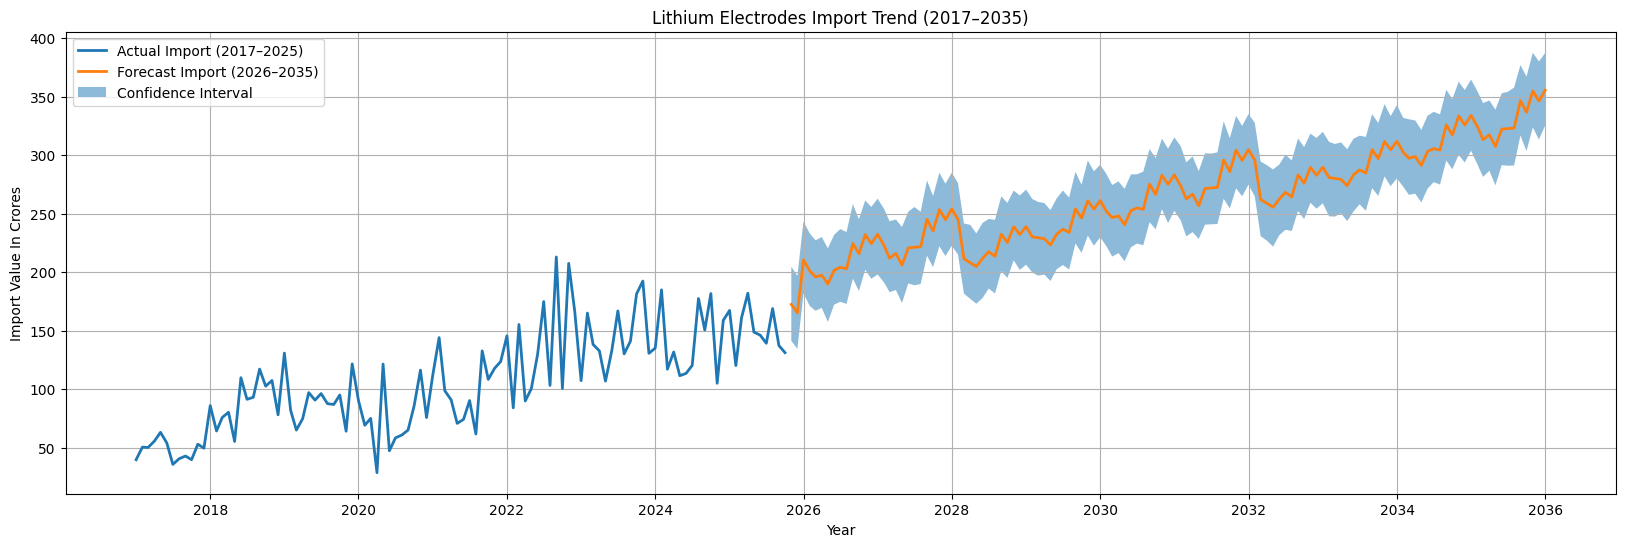

In [97]:
# Trend Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.plot(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)",
    linewidth=2
)

#future prediction graph
plt.plot(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    # linestyle="--",
    label="Forecast Import (2026–2035)",
    linewidth=2,
)
plt.fill_between(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat_lower"],
    import_forecast_2026_2035["yhat_upper"],
    alpha=0.5,
    label="Confidence Interval"
)


# Meta Data
plt.title("Lithium Electrodes Import Trend (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()
plt.grid(True)

plt.show()

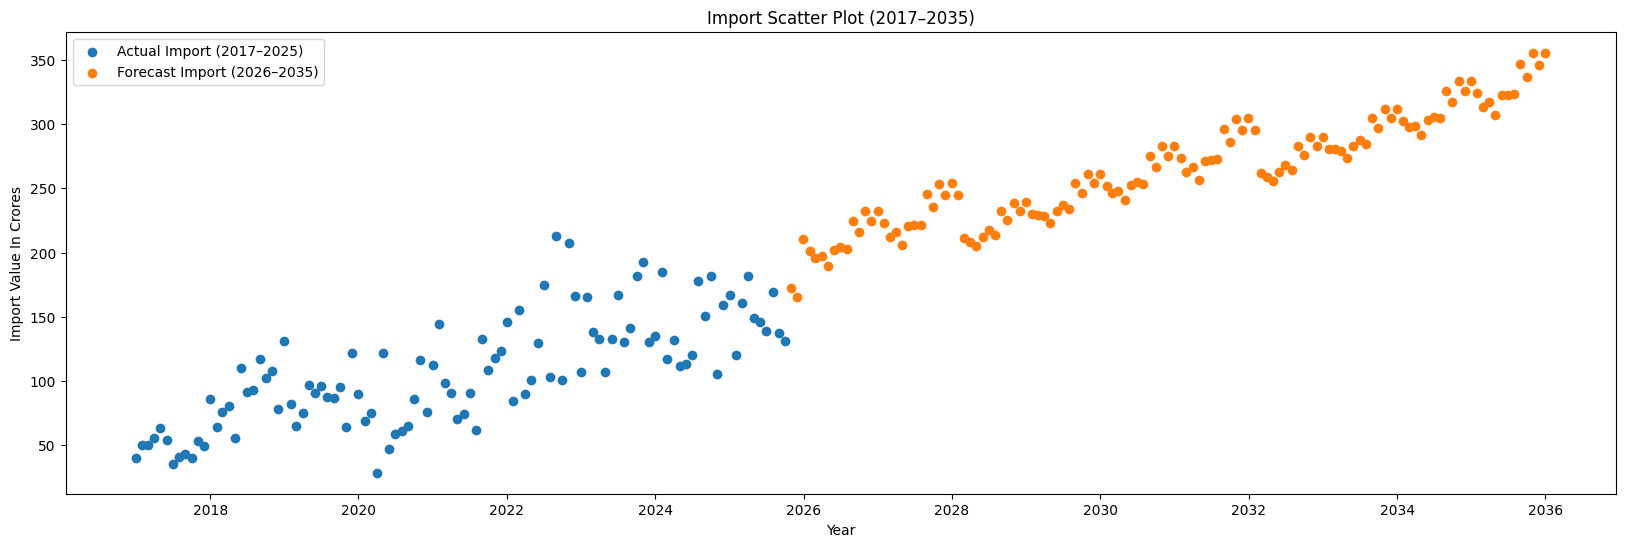

In [98]:
#Scatter Graph for Data from 2017 - 2035

plt.figure(figsize=(20, 6))
#historical graph
plt.scatter(
    import_df["ds"],
    import_df["y"],
    label="Actual Import (2017–2025)"
)

#future prediction graph
plt.scatter(
    import_forecast_2026_2035["ds"],
    import_forecast_2026_2035["yhat"],
    label="Forecast Import (2026–2035)"
)

# Meta Data
plt.title("Import Scatter Plot (2017–2035)")
plt.xlabel("Year")
plt.ylabel("Import Value In Crores")
plt.legend()

plt.show()

In [99]:
#Calculating And Plotting Trade Balance Graph On Export-import Data From 2017 - 2035
trade_balance_forecast = []

for i in range(len(export_forecast)):
    date = export_forecast.loc[i, 'ds']
    export_val = export_forecast.loc[i, 'yhat']
    import_val = import_forecast.loc[i, 'yhat']

    trade_balance_forecast.append(
        [date, export_val - import_val]
    )

trade_balance_forecast_df = pd.DataFrame(
    trade_balance_forecast,
    columns=['ds', 'trade_balance']
)

print(trade_balance_forecast_df)

            ds  trade_balance
0   2017-01-01     -28.282204
1   2017-02-01     -23.917479
2   2017-03-01     -22.277274
3   2017-04-01     -27.092569
4   2017-05-01     -23.014289
..         ...            ...
225 2035-09-30    -154.224763
226 2035-10-31    -167.376036
227 2035-11-30    -154.997705
228 2035-12-31    -178.828489
229 2036-01-31    -169.569953

[230 rows x 2 columns]


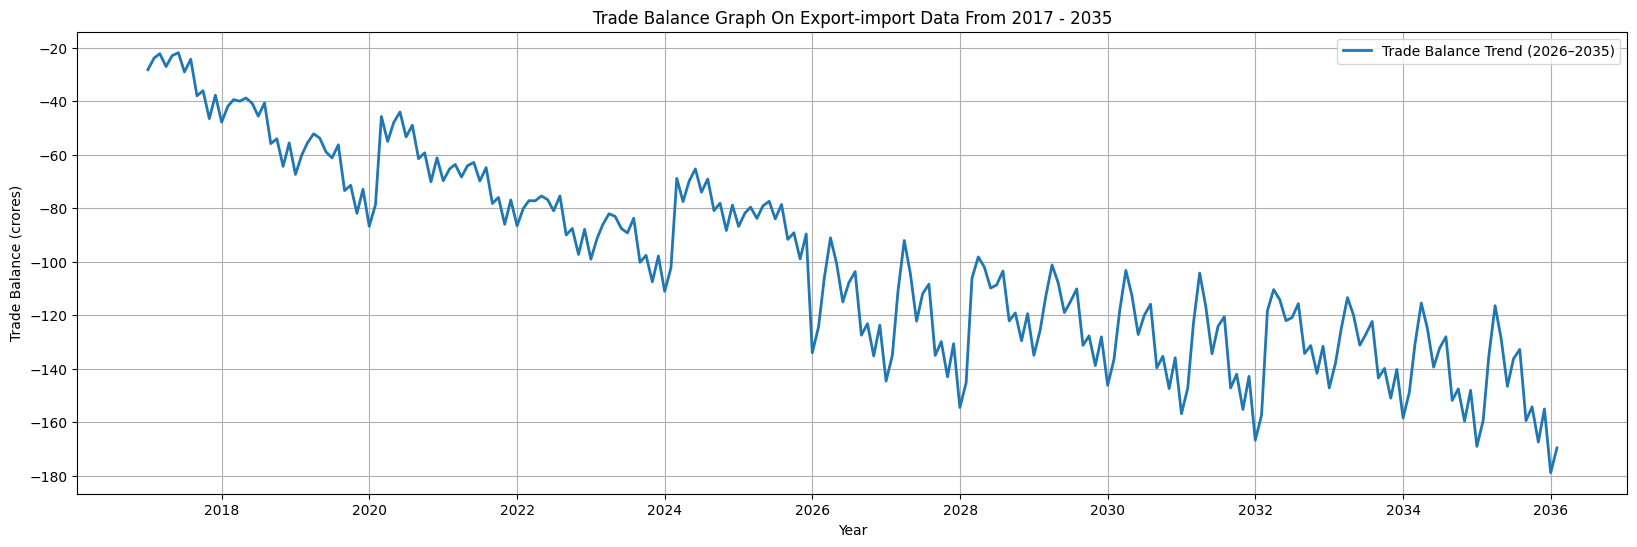

In [100]:
plt.figure(figsize=(20, 6))

plt.plot(trade_balance_forecast_df["ds"],trade_balance_forecast_df["trade_balance"] ,label="Trade Balance Trend (2026–2035)",
        linewidth=2)
plt.title("Trade Balance Graph On Export-import Data From 2017 - 2035")
plt.xlabel("Year")
plt.ylabel("Trade Balance (crores)")
plt.legend()
plt.grid(True)
plt.show()

### Lithium Electrode Insights

- Imports account for over **70%** of total lithium electrode trade.
- Imports have increased sharply post-2021, aligned with EV and battery manufacturing growth.
- Exports remain limited and volatile.

Lithium represents the highest strategic risk due to complete upstream dependency.


## FORECASTING RESULTS

### Forecasting Summary

Time-series forecasting indicates continued growth in demand for copper, graphite, and lithium-related products.

Key implications:
- Import dependency is expected to persist without intervention.
- Demand growth may outpace domestic production capacity.
- Strategic planning is required to mitigate future supply risks.

Forecasts are indicative and intended to support policy-level decision-making.

## CONSOLIDATED INSIGHTS
## Key Insights

- India faces structural import dependency in critical minerals.
- Copper dependency is driven by processing limitations.
- Graphite shows export potential but lacks advanced value addition.
- Lithium remains the most vulnerable mineral in India’s supply chain.
- Forecasts indicate rising demand across all three minerals.

The mineral challenge is not uniform scarcity, but mineral-specific value chain gaps.


## CONCLUSION
## Conclusion

This analysis highlights India’s growing dependence on critical minerals essential for industrial growth and clean energy transition. While graphite presents an opportunity for near-term self-reliance, lithium and copper require focused policy and infrastructure intervention.

Data-driven forecasting and trade analysis can support strategic planning, investment prioritization, and long-term mineral security.
